In [1]:
import pandas as pd
import numpy as np
import os
import math, numbers
from pathlib import Path
import seaborn as sns
from matplotlib import pyplot as plt, colors
from matplotlib.artist import Artist
from scipy import stats
from scipy.stats import norm
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks
from scipy.stats import shapiro
from outliers import smirnov_grubbs as grubbs
from scipy.stats import wilcoxon
import statistics
import random
from simple_colors import *
from itertools import zip_longest
from simple_venn import venn2, venn3, venn4

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [4]:
df = pd.read_csv("./SGRPmTOR_finalreckoning.csv")

In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [6]:
df.head()

experiment          Line-Treatment  DT inflection  \
0  _lowTORIN_KGPUMBL_052817.xls         WT-1 uM Torin 1      88.642690   
1  _lowTORIN_KGPUMBL_052817.xls            WT-2.5% DMSO      84.383101   
2  _lowTORIN_KGPUMBL_052817.xls  NCYC 3264-1 uM Torin 1      75.622916   
3  _lowTORIN_KGPUMBL_052817.xls     NCYC 3264-2.5% DMSO      75.872172   
4  _lowTORIN_KGPUMBL_052817.xls  NCYC 3265-1 uM Torin 1      83.891908   

   StDev_inf  DT interval  StDev_int Lab strain      Strain     Treatment  \
0   1.594672    92.622463   1.216821     BY4743      BY4743  1 uM Torin 1   
1   4.532748    90.556861   2.269390     BY4743      BY4743     2.5% DMSO   
2   2.134292    79.950705   1.244014  NCYC 3264  DBVPG 6765  1 uM Torin 1   
3   2.820883    78.778806   3.535895  NCYC 3264  DBVPG 6765     2.5% DMSO   
4   3.952745   106.127244  26.093053  NCYC 3265         SK1  1 uM Torin 1   

          Strain*Treatment  Time_0  Time_0.5    Time_1  Time_1.5    Time_2  \
0      BY4743*1 uM Torin 1       0  0.082333  0.101667  0.116000  0.138333   
1         BY4743*2.5% DMSO       0  0.076000  0.088667  0.100000  0.118000   
2  DBVPG 6765*1 uM Torin 1       0  0.109667  0.145667  0.179667  0.229667   
3     DBVPG 6765*2.5% DMSO       0  0.101333  0.135000  0.160667  0.205333   
4         SK1*1 uM Torin 1       0  0.048333  0.063667  0.076667  0.093667   

   Time_2.5    Time_3  Time_3.5    Time_4  Time_4.5    Time_5  Time_5.5  \
0  0.172333  0.216000  0.273000  0.341000  0.421000  0.515667  0.618333   
1  0.143000  0.181000  0.227667  0.286000  0.363000  0.447000  0.551000   
2  0.302333  0.394333  0.508667  0.630000  0.766333  0.905333  1.035333   
3  0.267000  0.350333  0.455000  0.577667  0.714667  0.857333  0.994000   
4  0.119000  0.150667  0.192000  0.237000  0.298000  0.371333  0.439667   

     Time_6  Time_6.5    Time_7  Time_7.5    Time_8  Time_8.5    Time_9  \
0  0.735333  0.843000  0.941667  1.022667  1.066333  1.073333  1.077000   
1  0.667333  0.780000  0.888333  0.986000  1.052333  1.083333  1.094000   
2  1.137333  1.167000  1.194667  1.216333  1.247000  1.270000  1.295667   
3  1.113000  1.167333  1.194667  1.225333  1.246667  1.271333  1.301000   
4  0.504333  0.558333  0.593333  0.618667  0.638333  0.654000  0.669000   

   Time_9.5   Time_10  Time_10.5   Time_11  Time_11.5   Time_12  Time_12.5  \
0  1.087000  1.096333   1.103333  1.111333   1.116333  1.134000   1.140667   
1  1.098333  1.112667   1.117667  1.128333   1.134333  1.144000   1.152667   
2  1.322333  1.353000   1.381667  1.409667   1.431667  1.461667   1.479667   
3  1.325667  1.354333   1.385333  1.415000   1.435333  1.463333   1.483333   
4  0.687000  0.708333   0.729000  0.748667   0.764000  0.785000   0.801667   

    Time_13  Time_13.5   Time_14  Time_14.5   Time_15  Time_15.5   Time_16  \
0  1.146000   1.164667  1.159333   1.183667  1.188000   1.200333  1.209000   
1  1.164333   1.173333  1.175667   1.196333  1.204667   1.217333  1.224000   
2  1.496000   1.520667  1.521333   1.550000  1.566333   1.579667  1.597000   
3  1.502667   1.520667  1.525000   1.554000  1.576333   1.585667  1.602667   
4  0.815333   0.840000  0.847667   0.871000  0.884333   0.900667  0.915333   

   Time_16.5   Time_17  Time_17.5   Time_18  Time_18.5   Time_19  Time_19.5  \
0   1.217667  1.227000   1.234667  1.247667   1.249000  1.258667   1.277667   
1   1.233667  1.240667   1.255333  1.266667   1.271000  1.280333   1.289333   
2   1.607000  1.620667   1.630333  1.644333   1.644667  1.653667   1.673000   
3   1.617667  1.629333   1.640000  1.655000   1.658667  1.666667   1.679333   
4   0.930333  0.948333   0.960000  0.977000   0.980667  0.993333   1.015667   

    Time_20  
0  1.280000  
1  1.298333  
2  1.672333  
3  1.685000  
4  1.020000

In [7]:
df.shape

(2840, 51)

In [8]:
df.columns

Index(['experiment', 'Line-Treatment', 'DT inflection', 'StDev_inf',
       'DT interval', 'StDev_int', 'Lab strain', 'Strain', 'Treatment',
       'Strain*Treatment', 'Time_0', 'Time_0.5', 'Time_1', 'Time_1.5',
       'Time_2', 'Time_2.5', 'Time_3', 'Time_3.5', 'Time_4', 'Time_4.5',
       'Time_5', 'Time_5.5', 'Time_6', 'Time_6.5', 'Time_7', 'Time_7.5',
       'Time_8', 'Time_8.5', 'Time_9', 'Time_9.5', 'Time_10', 'Time_10.5',
       'Time_11', 'Time_11.5', 'Time_12', 'Time_12.5', 'Time_13', 'Time_13.5',
       'Time_14', 'Time_14.5', 'Time_15', 'Time_15.5', 'Time_16', 'Time_16.5',
       'Time_17', 'Time_17.5', 'Time_18', 'Time_18.5', 'Time_19', 'Time_19.5',
       'Time_20'],
      dtype='object')

In [9]:
df_new = df.dropna()

In [10]:
df_new.head()

experiment          Line-Treatment  DT inflection  \
0  _lowTORIN_KGPUMBL_052817.xls         WT-1 uM Torin 1      88.642690   
1  _lowTORIN_KGPUMBL_052817.xls            WT-2.5% DMSO      84.383101   
2  _lowTORIN_KGPUMBL_052817.xls  NCYC 3264-1 uM Torin 1      75.622916   
3  _lowTORIN_KGPUMBL_052817.xls     NCYC 3264-2.5% DMSO      75.872172   
4  _lowTORIN_KGPUMBL_052817.xls  NCYC 3265-1 uM Torin 1      83.891908   

   StDev_inf  DT interval  StDev_int Lab strain      Strain     Treatment  \
0   1.594672    92.622463   1.216821     BY4743      BY4743  1 uM Torin 1   
1   4.532748    90.556861   2.269390     BY4743      BY4743     2.5% DMSO   
2   2.134292    79.950705   1.244014  NCYC 3264  DBVPG 6765  1 uM Torin 1   
3   2.820883    78.778806   3.535895  NCYC 3264  DBVPG 6765     2.5% DMSO   
4   3.952745   106.127244  26.093053  NCYC 3265         SK1  1 uM Torin 1   

          Strain*Treatment  Time_0  Time_0.5    Time_1  Time_1.5    Time_2  \
0      BY4743*1 uM Torin 1       0  0.082333  0.101667  0.116000  0.138333   
1         BY4743*2.5% DMSO       0  0.076000  0.088667  0.100000  0.118000   
2  DBVPG 6765*1 uM Torin 1       0  0.109667  0.145667  0.179667  0.229667   
3     DBVPG 6765*2.5% DMSO       0  0.101333  0.135000  0.160667  0.205333   
4         SK1*1 uM Torin 1       0  0.048333  0.063667  0.076667  0.093667   

   Time_2.5    Time_3  Time_3.5    Time_4  Time_4.5    Time_5  Time_5.5  \
0  0.172333  0.216000  0.273000  0.341000  0.421000  0.515667  0.618333   
1  0.143000  0.181000  0.227667  0.286000  0.363000  0.447000  0.551000   
2  0.302333  0.394333  0.508667  0.630000  0.766333  0.905333  1.035333   
3  0.267000  0.350333  0.455000  0.577667  0.714667  0.857333  0.994000   
4  0.119000  0.150667  0.192000  0.237000  0.298000  0.371333  0.439667   

     Time_6  Time_6.5    Time_7  Time_7.5    Time_8  Time_8.5    Time_9  \
0  0.735333  0.843000  0.941667  1.022667  1.066333  1.073333  1.077000   
1  0.667333  0.780000  0.888333  0.986000  1.052333  1.083333  1.094000   
2  1.137333  1.167000  1.194667  1.216333  1.247000  1.270000  1.295667   
3  1.113000  1.167333  1.194667  1.225333  1.246667  1.271333  1.301000   
4  0.504333  0.558333  0.593333  0.618667  0.638333  0.654000  0.669000   

   Time_9.5   Time_10  Time_10.5   Time_11  Time_11.5   Time_12  Time_12.5  \
0  1.087000  1.096333   1.103333  1.111333   1.116333  1.134000   1.140667   
1  1.098333  1.112667   1.117667  1.128333   1.134333  1.144000   1.152667   
2  1.322333  1.353000   1.381667  1.409667   1.431667  1.461667   1.479667   
3  1.325667  1.354333   1.385333  1.415000   1.435333  1.463333   1.483333   
4  0.687000  0.708333   0.729000  0.748667   0.764000  0.785000   0.801667   

    Time_13  Time_13.5   Time_14  Time_14.5   Time_15  Time_15.5   Time_16  \
0  1.146000   1.164667  1.159333   1.183667  1.188000   1.200333  1.209000   
1  1.164333   1.173333  1.175667   1.196333  1.204667   1.217333  1.224000   
2  1.496000   1.520667  1.521333   1.550000  1.566333   1.579667  1.597000   
3  1.502667   1.520667  1.525000   1.554000  1.576333   1.585667  1.602667   
4  0.815333   0.840000  0.847667   0.871000  0.884333   0.900667  0.915333   

   Time_16.5   Time_17  Time_17.5   Time_18  Time_18.5   Time_19  Time_19.5  \
0   1.217667  1.227000   1.234667  1.247667   1.249000  1.258667   1.277667   
1   1.233667  1.240667   1.255333  1.266667   1.271000  1.280333   1.289333   
2   1.607000  1.620667   1.630333  1.644333   1.644667  1.653667   1.673000   
3   1.617667  1.629333   1.640000  1.655000   1.658667  1.666667   1.679333   
4   0.930333  0.948333   0.960000  0.977000   0.980667  0.993333   1.015667   

    Time_20  
0  1.280000  
1  1.298333  
2  1.672333  
3  1.685000  
4  1.020000

In [11]:
df_new.shape

(2526, 51)

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2526 entries, 0 to 2799
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   experiment        2526 non-null   object 
 1   Line-Treatment    2526 non-null   object 
 2   DT inflection     2526 non-null   float64
 3   StDev_inf         2526 non-null   float64
 4   DT interval       2526 non-null   float64
 5   StDev_int         2526 non-null   float64
 6   Lab strain        2526 non-null   object 
 7   Strain            2526 non-null   object 
 8   Treatment         2526 non-null   object 
 9   Strain*Treatment  2526 non-null   object 
 10  Time_0            2526 non-null   int64  
 11  Time_0.5          2526 non-null   float64
 12  Time_1            2526 non-null   float64
 13  Time_1.5          2526 non-null   float64
 14  Time_2            2526 non-null   float64
 15  Time_2.5          2526 non-null   float64
 16  Time_3            2526 non-null   float64


### Identifying **Experiments**, **Treatments** and **Lab Strains**

In [13]:
experiments = list(df_new.experiment.unique())
line_treatments = list(df_new['Line-Treatment'].unique())
treatments = list(df_new.Treatment.unique())
strains = list(df_new['Strain'].unique())

In [14]:
print("Number of Experiments: ", len(experiments))

Number of Experiments:  57


In [15]:
for i in range(1, 58):
    print(f"Experiment_{i}: ", experiments[i-1])

Experiment_1:  _lowTORIN_KGPUMBL_052817.xls
Experiment_2:  original data.xls SET 4 HIGH RAPA
Experiment_3:  RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls
Experiment_4:  SCREEN_SET2_HIGHTORIN#3_MGK_09302017_F.xls
Experiment_5:  SET1GDC_ARMBL_080217.xls
Experiment_6:  SET2_caffeine_KGPU_080517.xls
Experiment_7:  SET2AZDredo+highTORINMBL_07302017.xls
Experiment_8:  SET3_Low Rapa_REDO_MGK_081117.xls
Experiment_9:  SET4_highTORIN_REDO_NBMBL_080717.xls
Experiment_10:  SGRP_mTOR_inhibitsSCREEN_SET1_GDC_redo_JE_092617.xls
Experiment_11:  SGRP_mTOR_inhibitsSCREEN_SET1_highgdc-0941_AR_053117.xls
Experiment_12:  SGRP_mTOR_inhibitsSCREEN_SET1_highTORIN_KGPUMBL_052817.xls
Experiment_13:  SGRP_mTOR_inhibitsSCREEN_SET1_lowRAPA_redo2_KG_092317.xls
Experiment_14:  SGRP_mTOR_inhibitsSCREEN_SET2_HIGH_TORIN_AR_10092017_F.xls
Experiment_15:  SGRP_mTOR_inhibitsSCREEN_SET2_HighRAPA+LowTorin_Repeat_JEMBL_073
Experiment_16:  SGRP_mTOR_inhibitsSCREEN_SET2_highTORIN_JEMBL_081717.xls
Experiment_17:  SGRP_mTOR_inhibit

In [16]:
print("Types of Line-Treatments: ", len(line_treatments))

Types of Line-Treatments:  1050


In [17]:
for i in range(1, 1051):
    print(f"Line_Treatment_{i}: ", line_treatments[i-1])

Line_Treatment_1:  WT-1 uM Torin 1
Line_Treatment_2:  WT-2.5% DMSO
Line_Treatment_3:  NCYC 3264-1 uM Torin 1
Line_Treatment_4:  NCYC 3264-2.5% DMSO
Line_Treatment_5:  NCYC 3265-1 uM Torin 1
Line_Treatment_6:  NCYC 3265-2.5% DMSO
Line_Treatment_7:  NCYC 3266-1 uM Torin 1
Line_Treatment_8:  NCYC 3266-2.5% DMSO
Line_Treatment_9:  NCYC 3284-1 uM Torin 1
Line_Treatment_10:  NCYC 3284-2.5% DMSO
Line_Treatment_11:  NCYC 3290-1 uM Torin 1
Line_Treatment_12:  NCYC 3290-2.5% DMSO
Line_Treatment_13:  NCYC 3311-1 uM Torin 1
Line_Treatment_14:  NCYC 3311-2.5% DMSO
Line_Treatment_15:  NCYC 3312-1 uM Torin 1
Line_Treatment_16:  NCYC 3312-2.5% DMSO
Line_Treatment_17:  NCYC 3313-1 uM Torin 1
Line_Treatment_18:  NCYC 3313-2.5% DMSO
Line_Treatment_19:  NCYC 3319-1 uM Torin 1
Line_Treatment_20:  NCYC 3319-2.5% DMSO
Line_Treatment_21:  NCYC 3445-1 uM Torin 1
Line_Treatment_22:  NCYC 3445-2.5% DMSO
Line_Treatment_23:  NCYC 3447-1 uM Torin 1
Line_Treatment_24:  NCYC 3447-2.5% DMSO
Line_Treatment_25:  NCYC 34

In [18]:
print("Types of Treatments: ", len(treatments))

Types of Treatments:  10


In [19]:
for i in range(1, 11):
    print(f"Treatmemt_{i}: ", treatments[i-1])

Treatmemt_1:  1 uM Torin 1
Treatmemt_2:  2.5% DMSO
Treatmemt_3:  1% DMSO
Treatmemt_4:  20 ng/mL RAPA
Treatmemt_5:  2.5 ng/mL RAPA
Treatmemt_6:  6.67% H2O
Treatmemt_7:  25 uM Torin 1
Treatmemt_8:  100 uM GDC0941
Treatmemt_9:  1 mg/mL Caffeine
Treatmemt_10:  100 uM AZD8055


In [20]:
print("Number of Strains: ", len(strains))

Number of Strains:  88


In [21]:
for i in range(1, 89):
    print(f"Strain_{i}: ", strains[i-1])

Strain_1:  BY4743
Strain_2:  DBVPG 6765
Strain_3:  SK1
Strain_4:  Y55
Strain_5:  YPS128
Strain_6:  DBVPG 6044
Strain_7:  DBVPG 1788
Strain_8:  DBVPG 1373
Strain_9:  DBVPG 1853
Strain_10:  L-1528
Strain_11:  Y12
Strain_12:  DBVPG 1106
Strain_13:  K11
Strain_14:  YS4
Strain_15:  YS9
Strain_16:  322134 S 
Strain_17:  378604 X
Strain_18:  273614 N
Strain_19:  Y6.5
Strain_20:  Q62.5
Strain_21:  Q89.8
Strain_22:  KPN3828
Strain_23:  Y9.6
Strain_24:  Q74.4
Strain_25:  Q69.8
Strain_26:  W7
Strain_27:  Q31.4
Strain_28:  Y8.5
Strain_29:  Z1
Strain_30:  CBS432
Strain_31:  Y8.1
Strain_32:  KPN3829
Strain_33:  UFRJ50791
Strain_34:  IFO1804
Strain_35:  UWOPS91-917.1
Strain_36:  CLIB324
Strain_37:  PW5
Strain_38:  UWOPS83-787.3
Strain_39:  NCYC361
Strain_40:  W303
Strain_41:  Y10
Strain_42:  T21.4
Strain_43:  Q95.3
Strain_44:  A4
Strain_45:  YJM978
Strain_46:  Y9
Strain_47:  UWOPS03-461.4 
Strain_48:  UWOPS05-217.3 
Strain_49:  S288c 
Strain_50:  UWOPS05-227.2 
Strain_51:  DBVPG 6040 
Strain_52:  YII

> ## **Structuring the Dataset**

In [22]:
def struct_data(df, kind, subKind):
    return (df[df[kind] == subKind]).reset_index(drop=True)

def save_file(file, file_name, by_kind):
            return file.to_csv(str(Path().absolute())+f"/Data/{by_kind}/"+ file_name + ".csv", index=False)

def file_check(path):
    if os.path.isfile(path):
        return False
    else:
        return True

In [23]:
kind = ['experiment', 'Line-Treatment', 'Strain', 'Treatment']
by_kind = ['By Experiment', 'By Line-Treatment', 'By Strain', 'By Treatment']
path0 = str(Path().absolute())+f"/Data/{by_kind[0]}/Experiment_1.csv"
path1 = str(Path().absolute())+f"/Data/{by_kind[1]}/Line_Treatment_1.csv"
path2 = str(Path().absolute())+f"/Data/{by_kind[2]}/Strain_1.csv"
path3 = str(Path().absolute())+f"/Data/{by_kind[3]}/Treatment_1.csv"

### By Experiment

In [24]:
if file_check(path0):
    for i in range (1, 58):
        file = struct_data(df_new, kind[0], experiments[i-1])
        file_name = f"Experiment_{i}"
        save_file(file, file_name, by_kind[0])

### By Line-Treatment

In [25]:
if file_check(path1):
    for i in range (1, 1051):
        file = struct_data(df_new, kind[1], line_treatments[i-1])
        file_name = f"Line_Treatment_{i}"
        save_file(file, file_name, by_kind[1])

### By Strain

In [26]:
if file_check(path2):
    for i in range (1, 89):
        file = struct_data(df_new, kind[2], strains[i-1])
        file_name = f"Strain_{i}"
        save_file(file, file_name, by_kind[2])

### By Treatment

In [27]:
if file_check(path3):
    for i in range (1, 11):
        file = struct_data(df_new, kind[3], treatments[i-1])
        file_name = f"Treatment_{i}"
        save_file(file, file_name, by_kind[3])

> ### Functions For Data Extraction

In [28]:
t_path = "./Data/By Treatment/Treatment_"

In [29]:
def st_data(treat_num, path=t_path, strain="BY4743", feature_drop=True):
    """
    > Treatment number, indicated by the parameter 'treat_num', can be identified by the following pattern:
        <> 1 uM Torin 1     _______    1
        <> 2.5% DMSO        _______    2
        <> 1% DMSO          _______    3
        <> 20 ng/mL RAPA    _______    4
        <> 2.5 ng/mL RAPA   _______    5
        <> 6.67% H2O        _______    6
        <> 25 uM Torin 1    _______    7
        <> 100 uM GDC0941   _______    8
        <> 1 mg/mL Caffeine _______    9
        <> 100 uM AZD8055   _______    10
    
    > The 'path' parameter is by default set equal to t_path.
    
    > The 'strain' parameter is set equal to "BY4743" by default.
    
    > The 'feature_drop' parameters gives a boolean option to clean the desired data of the extraneous features. It is set to True by default.
    
    > Returns a DataFrame for the specified treatment and strain group.
    """
    
    drop_features = ['experiment', 'Line-Treatment', 'Lab strain', 'Strain', 'Treatment', 'Strain*Treatment'] 
    
    treatment = pd.read_csv(path + str(treat_num)+".csv")
    treatment_strain = treatment[treatment['Strain'] == strain].reset_index(drop=True)
    
    if feature_drop == True:
        treatment_strain = treatment_strain.drop(drop_features, axis=1)
    
    return treatment_strain

In [30]:
def st_avg_data(path=t_path, strain="BY4743", feature_drop=True):#, treat="", d_type="DT inflection", p_outliers=[]):
    
    data1, data2 = list(), list()
    index1, index2 = list(), list()
    bio_rep1, bio_rep2 = list(), list()
    # counter = 0
    
    for i in range(1,11):
        d = st_data(treat_num=i, path=path, strain=strain, feature_drop=feature_drop)
        
#         if len(p_outliers) > 0:
#             d1 = d.copy()
#             if treatments[i-1] == treat:   
#                 for i in p_outliers:
#                     if i in list(d1[d_type]):
#                         d1[d_type].remove(i)
            
#             ts2 = d1.mean()
#             bio_rep2.append(len(d1))
#             data2.append(ts2)
#             index2.append(treatments[i-1])
        
        ts1 = d.mean()
        bio_rep1.append(len(d))
        data1.append(ts1)
        index1.append(treatments[i-1])
        
    avg_data1 = pd.DataFrame(data1, index=index1)
    avg_data1.insert(0, column='Biological Replicates', value=bio_rep1)
    
    # avg_data2 = pd.DataFrame(data2, index=index2)
    # avg_data2.insert(0, column='Biological Replicates', value=bio_rep2)
    
    return avg_data1#, avg_data2

In [31]:
# Get both a list of DT values and average DT values for each treatment's interval and inflection data points
def DT_vals_avg(dt_type, treatment, strain=strains[0]):
    dt = list(df_new[(df_new["Strain"] == strain) & (df_new["Treatment"] == treatment)][dt_type])
    dt_avg = np.mean(dt)
    return dt, dt_avg

In [32]:
def locate_exp(value, treatment, strain=strains[0]):
    
    idx = treatments.index(treatment) + 1  
    exp = st_data(treat_num=idx, path=t_path, strain=strain, feature_drop=False)
    
    exper = list()
    if isinstance(value, numbers.Number):
        return list(exp[exp['DT inflection'] == value].experiment)[0]
    else:
        for i in value:
            exper.append(list(exp[exp['DT inflection'] == i].experiment)[0])
        return exper

In [33]:
treatments

['1 uM Torin 1',
 '2.5% DMSO',
 '1% DMSO',
 '20 ng/mL RAPA',
 '2.5 ng/mL RAPA',
 '6.67% H2O',
 '25 uM Torin 1',
 '100 uM GDC0941',
 '1 mg/mL Caffeine',
 '100 uM AZD8055']

### Treatment Analysis on the Control Strain : **BY4743**

In [34]:
df_c = pd.read_csv('./Data/By Strain/Strain_1.csv')

In [35]:
df_c.head()

experiment       Line-Treatment  \
0               _lowTORIN_KGPUMBL_052817.xls      WT-1 uM Torin 1   
1               _lowTORIN_KGPUMBL_052817.xls         WT-2.5% DMSO   
2          original data.xls SET 4 HIGH RAPA           WT-vehicle   
3          original data.xls SET 4 HIGH RAPA     WT-20 ng/ml RAPA   
4  RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls  yML742-1 uM Torin 1   

   DT inflection  StDev_inf  DT interval  StDev_int Lab strain  Strain  \
0      88.642690   1.594672    92.622463   1.216821     BY4743  BY4743   
1      84.383101   4.532748    90.556861   2.269390     BY4743  BY4743   
2      71.956550   1.083065    74.768422   2.232198     BY4743  BY4743   
3     260.047128  11.569153   470.258578  21.283503     BY4743  BY4743   
4      72.520115   5.558710    87.728696   1.069446     BY4743  BY4743   

       Treatment      Strain*Treatment  Time_0  Time_0.5    Time_1  Time_1.5  \
0   1 uM Torin 1   BY4743*1 uM Torin 1       0  0.082333  0.101667  0.116000   
1      2.5% DMSO      BY4743*2.5% DMSO       0  0.076000  0.088667  0.100000   
2        1% DMSO        BY4743*1% DMSO       0  0.038000  0.040333  0.045667   
3  20 ng/mL RAPA  BY4743*20 ng/mL RAPA       0  0.038333  0.042000  0.048667   
4   1 uM Torin 1   BY4743*1 uM Torin 1       0  0.031000  0.033000  0.036667   

     Time_2  Time_2.5    Time_3  Time_3.5    Time_4  Time_4.5    Time_5  \
0  0.138333  0.172333  0.216000  0.273000  0.341000  0.421000  0.515667   
1  0.118000  0.143000  0.181000  0.227667  0.286000  0.363000  0.447000   
2  0.054000  0.067667  0.087333  0.115667  0.150000  0.201000  0.264000   
3  0.054000  0.059000  0.064000  0.068667  0.074000  0.081000  0.086667   
4  0.044333  0.043667  0.073333  0.096333  0.129333  0.178667  0.222000   

   Time_5.5    Time_6  Time_6.5    Time_7  Time_7.5    Time_8  Time_8.5  \
0  0.618333  0.735333  0.843000  0.941667  1.022667  1.066333  1.073333   
1  0.551000  0.667333  0.780000  0.888333  0.986000  1.052333  1.083333   
2  0.348333  0.451000  0.564000  0.689000  0.814333  0.919000  0.998667   
3  0.093000  0.100667  0.108667  0.116000  0.123667  0.131000  0.140000   
4  0.290667  0.366000  0.458000  0.557333  0.654000  0.754000  0.845333   

     Time_9  Time_9.5   Time_10  Time_10.5   Time_11  Time_11.5   Time_12  \
0  1.077000  1.087000  1.096333   1.103333  1.111333   1.116333  1.134000   
1  1.094000  1.098333  1.112667   1.117667  1.128333   1.134333  1.144000   
2  1.051000  1.069000  1.074667   1.079333  1.089667   1.099000  1.108333   
3  0.150000  0.158000  0.168000   0.178000  0.188000   0.198667  0.211333   
4  0.919667  0.955333  0.963000   0.965000  0.972333   0.976000  0.982667   

   Time_12.5   Time_13  Time_13.5   Time_14  Time_14.5   Time_15  Time_15.5  \
0   1.140667  1.146000   1.164667  1.159333   1.183667  1.188000   1.200333   
1   1.152667  1.164333   1.173333  1.175667   1.196333  1.204667   1.217333   
2   1.118000  1.128000   1.139000  1.151000   1.162000  1.175000   1.186667   
3   0.221333  0.231667   0.244667  0.256333   0.269333  0.281333   0.293667   
4   0.989667  0.997667   1.006667  1.016333   1.023667  1.033333   1.043667   

    Time_16  Time_16.5   Time_17  Time_17.5   Time_18  Time_18.5   Time_19  \
0  1.209000   1.217667  1.227000   1.234667  1.247667   1.249000  1.258667   
1  1.224000   1.233667  1.240667   1.255333  1.266667   1.271000  1.280333   
2  1.200667   1.212667  1.225000   1.239000  1.253000   1.264333  1.276333   
3  0.308333   0.320333  0.333000   0.346000  0.362000   0.376333  0.389000   
4  1.054333   1.065000  1.076000   1.088667  1.096333   1.106333  1.117667   

   Time_19.5   Time_20  
0   1.277667  1.280000  
1   1.289333  1.298333  
2   1.290333  1.302667  
3   0.405667  0.421000  
4   1.127667  1.136000

In [36]:
help(st_data)

Help on function st_data in module __main__:

st_data(treat_num, path='./Data/By Treatment/Treatment_', strain='BY4743', feature_drop=True)
    > Treatment number, indicated by the parameter 'treat_num', can be identified by the following pattern:
        <> 1 uM Torin 1     _______    1
        <> 2.5% DMSO        _______    2
        <> 1% DMSO          _______    3
        <> 20 ng/mL RAPA    _______    4
        <> 2.5 ng/mL RAPA   _______    5
        <> 6.67% H2O        _______    6
        <> 25 uM Torin 1    _______    7
        <> 100 uM GDC0941   _______    8
        <> 1 mg/mL Caffeine _______    9
        <> 100 uM AZD8055   _______    10
    
    > The 'path' parameter is by default set equal to t_path.
    
    > The 'strain' parameter is set equal to "BY4743" by default.
    
    > The 'feature_drop' parameters gives a boolean option to clean the desired data of the extraneous features. It is set to True by default.
    
    > Returns a DataFrame for the specified treatm

In [37]:
print("Out of the total ", df_c.shape[0] ," observations, number of those with : ")
print(treatments[2], " as the treatment : ", df_c[df_c.Treatment == "1% DMSO"].shape[0], " -> ", round((df_c[df_c.Treatment == "1% DMSO"].shape[0]/141), 2) * 100,"%")
print(treatments[1], " as the treatment : ", df_c[df_c.Treatment == "2.5% DMSO"].shape[0], " -> ", round((df_c[df_c.Treatment == "2.5% DMSO"].shape[0]/141), 2) * 100,"%")
print(treatments[3], " as the treatment : ", df_c[df_c.Treatment == "20 ng/mL RAPA"].shape[0], " -> ", round((df_c[df_c.Treatment == "20 ng/mL RAPA"].shape[0]/141), 2) * 100,"%")
print(treatments[4], " as the treatment : ", df_c[df_c.Treatment == "2.5 ng/mL RAPA"].shape[0], " -> ", round((df_c[df_c.Treatment == "2.5 ng/mL RAPA"].shape[0]/141), 2) * 100,"%")

Out of the total  136  observations, number of those with : 
1% DMSO  as the treatment :  19  ->  13.0 %
2.5% DMSO  as the treatment :  36  ->  26.0 %
20 ng/mL RAPA  as the treatment :  7  ->  5.0 %
2.5 ng/mL RAPA  as the treatment :  12  ->  9.0 %


## **Identifying Anomaly**

The process of identifying outlier and/or novelty is dependent on the nature of the sample data distribution. First, different characteristics can be derived for each sample population by assessing the modality of their distribution. Although it does not make sense to think of the sample populations under consideration to have distributions different from unimodal (because they lack subpopulations coming from different streams), it's possible that we can learn something interesting from the modality test. This could be how particular treatments affect different strains and/or to identify the kind of outlier tests that are suitable for each sample population.

The anomaly tests to be employed should be tailored to meet the following criteria when the sample population under consideration is:
* Unimodal and has a normal distribution, 
* Unimodal but not normally distributed, and 
* Bimodally distributed.

> `Z-Score` derived from mean and standard deviation and `Grubbs' Test` are used to test for outliers when the sample population has a Gaussian Normal Distribution, and `Median Absolute Deviation` derived `Z-Score` and `Interquartile Range (IQR)` methods when the data is unimodal but not normally distributed, and bimodally distributed.

**Note:** The possible outliers are to be considered as data points of interest for further investigation, and will not be removed from their respective sample populations at the first instance of their identification. This is because the reason for their outlier nature could be an error in the data, or a polymorphism of the strain reacting to a particular treatment.

### Assessing The Modality Of Data Distributions

Learning more about the nature of the data will enable us to better assess the statistical tools we will choose to perfom outlier tests.

In [38]:
def plot_distribution(data):
    # plot histogram and KDE plot
    sns.histplot(data, kde=True, stat="density", color='blue')
    plt.title("Distribution of Data")
    plt.xlabel("Value")
    plt.ylabel("Density")
    # plt.figure(figsize=(15,10))  
    
    return plt.show()

In [39]:
def mode_hunting_test(data, n_permutations=1000, alpha=0.005):
    # Estimate the probability density funciton (PDF) using a kernel density estimator (KDE)
    kde = gaussian_kde(data)
    x_grid = np.linspace(min(data), max(data), n_permutations)
    pdf = kde(x_grid)
    
    # Find local maxima of the PDF using the find_peak() function
    peaks, _ = find_peaks(pdf)
    num_peaks = len(peaks)
    
    # Perform permutation test to determine if the number of peaks is significant
    num_significance = 0
    for i in range(n_permutations):
        shuffled_data = np.random.permutation(data)
        shuffled_pdf = gaussian_kde(shuffled_data)(x_grid)
        shuffled_peaks, _ = find_peaks(shuffled_pdf)
        if len(shuffled_peaks) >= num_peaks:
            num_significance += 1
    
    p_value = (num_significance + 1) / (n_permutations + 1)
    is_significant = (p_value >= alpha)
    
    return num_peaks, p_value, is_significant, plot_distribution(data)

In [40]:
# Collecting Doubling Time Data for BY4743 Target Treatments

DT_DMSO1_1, DT_DMSO1_1_avg = DT_vals_avg(dt_type='DT inflection', treatment=treatments[2], strain=strains[0])
DT_DMSO1_2, DT_DMSO1_2_avg = DT_vals_avg(dt_type='DT interval', treatment=treatments[2], strain=strains[0])

DT_DMSO2_1, DT_DMSO2_1_avg = DT_vals_avg(dt_type='DT inflection', treatment=treatments[1], strain=strains[0])
DT_DMSO2_2, DT_DMSO2_2_avg = DT_vals_avg(dt_type='DT interval', treatment=treatments[1], strain=strains[0])

DT_RAPA1_1, DT_RAPA1_1_avg = DT_vals_avg(dt_type='DT inflection', treatment=treatments[4], strain=strains[0])
DT_RAPA1_2, DT_RAPA1_2_avg = DT_vals_avg(dt_type='DT interval', treatment=treatments[4], strain=strains[0])

DT_RAPA2_1, DT_RAPA2_1_avg = DT_vals_avg(dt_type='DT inflection', treatment=treatments[3], strain=strains[0])
DT_RAPA2_2, DT_RAPA2_2_avg = DT_vals_avg(dt_type='DT interval', treatment=treatments[3], strain=strains[0])

DT_TORIN1_1, DT_TORIN1_1_avg = DT_vals_avg(dt_type='DT inflection', treatment=treatments[0], strain=strains[0])
DT_TORIN1_2, DT_TORIN1_2_avg = DT_vals_avg(dt_type='DT interval', treatment=treatments[0], strain=strains[0])

DT_TORIN2_1, DT_TORIN2_1_avg = DT_vals_avg(dt_type='DT inflection', treatment=treatments[6], strain=strains[0])
DT_TORIN2_2, DT_TORIN2_2_avg = DT_vals_avg(dt_type='DT interval', treatment=treatments[6], strain=strains[0])

#### **1% DMSO**

> #### Doubling Time Inflection

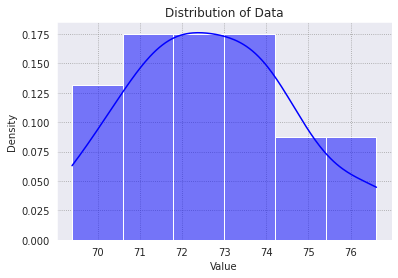

Number of peaks: 1
P-value: 1.0
Is significant: True


In [41]:
num_peaks, p_value, is_significant, _ = mode_hunting_test(DT_DMSO1_1)

print(f"Number of peaks: {num_peaks}")
print(f"P-value: {p_value}")
print(f"Is significant: {is_significant}")

* The doubling time inflection data distribution due to the application of `1% DMSO` on `BY4743` strain is **Unimodal**.

> #### Doubling Time Interval

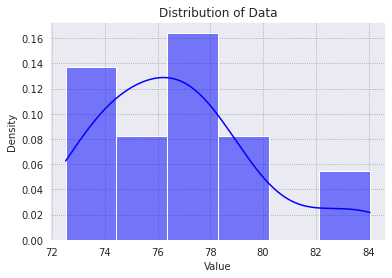

Number of peaks: 1
P-value: 1.0
Is significant: True


In [42]:
num_peaks, p_value, is_significant, _ = mode_hunting_test(DT_DMSO1_2)

print(f"Number of peaks: {num_peaks}")
print(f"P-value: {p_value}")
print(f"Is significant: {is_significant}")

* The doubling time interval data distribution due to the application of `1% DMSO` on `BY4743` strain is **Unimodal**.

#### **2.5% DMSO**

> #### Doubling Time Inflection

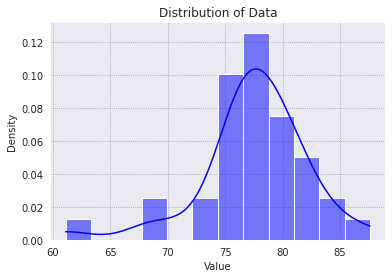

Number of peaks: 2
P-value: 1.0
Is significant: True


In [43]:
num_peaks, p_value, is_significant, _ = mode_hunting_test(DT_DMSO2_1)

print(f"Number of peaks: {num_peaks}")
print(f"P-value: {p_value}")
print(f"Is significant: {is_significant}")

* The doubling time inflection data distribution due to the application of `2.5% DMSO` on `BY4743` strain is **Bimodal**.

> #### Doubling Time Interval

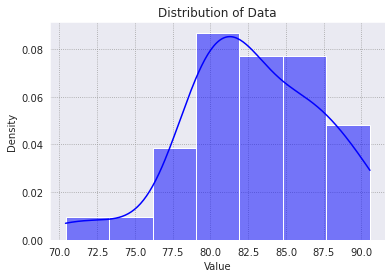

Number of peaks: 1
P-value: 1.0
Is significant: True


In [44]:
num_peaks, p_value, is_significant, _ = mode_hunting_test(DT_DMSO2_2)

print(f"Number of peaks: {num_peaks}")
print(f"P-value: {p_value}")
print(f"Is significant: {is_significant}")

* The doubling time interval data distribution due to the `2.5% DMSO` on `BY4743` strain is **Unimodal**.

#### **2.5 ng/mL Rapamycin**

> #### Doubling Time Inflection

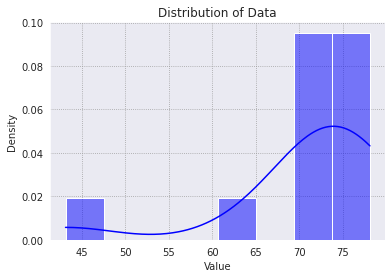

Number of peaks: 2
P-value: 1.0
Is significant: True


In [45]:
num_peaks, p_value, is_significant, _ = mode_hunting_test(DT_RAPA1_1)

print(f"Number of peaks: {num_peaks}")
print(f"P-value: {p_value}")
print(f"Is significant: {is_significant}")

* The doubling time inflection data distribution due to the application of `2.5 ng/mL Rapamycin` on `BY4743` strain is **Bimodal**.

> #### Doubling Time Interval

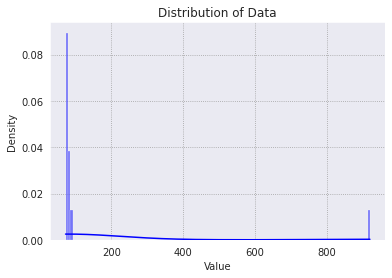

Number of peaks: 1
P-value: 1.0
Is significant: True


In [46]:
num_peaks, p_value, is_significant, _ = mode_hunting_test(DT_RAPA1_2)

print(f"Number of peaks: {num_peaks}")
print(f"P-value: {p_value}")
print(f"Is significant: {is_significant}")

* The doubling time interval data distribution due to the application of `2.5 ng/mL Rapamycin` on `BY4743` strain is **Unimodal**.

#### **20 ng/mL Rapamycin**

> #### Doubling Time Inflection

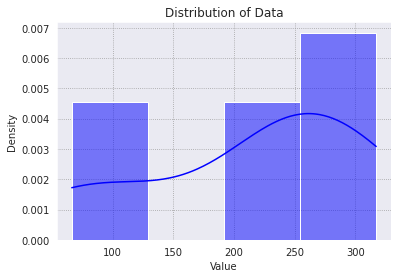

Number of peaks: 1
P-value: 1.0
Is significant: True


In [47]:
num_peaks, p_value, is_significant, _ = mode_hunting_test(DT_RAPA2_1)

print(f"Number of peaks: {num_peaks}")
print(f"P-value: {p_value}")
print(f"Is significant: {is_significant}")

* The doubling time inflection data distribution due to the application of `20 ng/mL Rapamycin` on `BY4743` strain is **Unimodal**.

> #### Doubling Time Interval

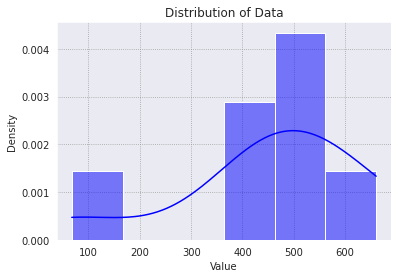

Number of peaks: 2
P-value: 1.0
Is significant: True


In [48]:
num_peaks, p_value, is_significant, _ = mode_hunting_test(DT_RAPA2_2)

print(f"Number of peaks: {num_peaks}")
print(f"P-value: {p_value}")
print(f"Is significant: {is_significant}")

* The doubling time interval data distribution due to the application of `20 ng/mL Rapamycin` on `BY4743` strain is **Bimodal**.

#### **1 uM Torin 1**

> #### Doubling Time Inflection

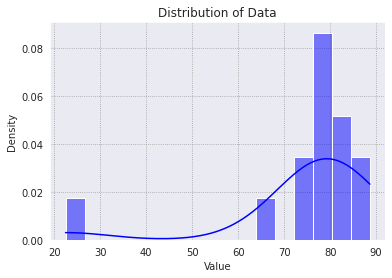

Number of peaks: 1
P-value: 1.0
Is significant: True


In [49]:
num_peaks, p_value, is_significant, _ = mode_hunting_test(DT_TORIN1_1)

print(f"Number of peaks: {num_peaks}")
print(f"P-value: {p_value}")
print(f"Is significant: {is_significant}")

* The doubling time inflection data distribution due to the application of `1 uM Torin 1` on `BY4743` strain is **Unimodal**.

> #### Doubling Time Interval

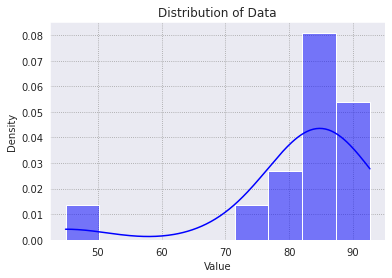

Number of peaks: 1
P-value: 1.0
Is significant: True


In [50]:
num_peaks, p_value, is_significant, _ = mode_hunting_test(DT_TORIN1_2)

print(f"Number of peaks: {num_peaks}")
print(f"P-value: {p_value}")
print(f"Is significant: {is_significant}")

* The doubling time interval data distribution due to the application of `1 uM Torin 1` on `BY4743` strain is **Unimodal**.

#### **25 uM Torin 1**

> #### Doubling Time Inflection

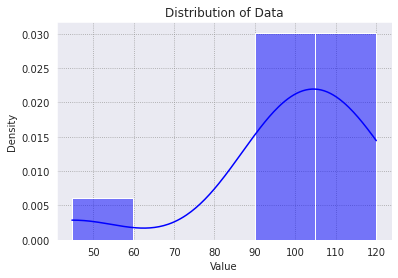

Number of peaks: 2
P-value: 1.0
Is significant: True


In [51]:
num_peaks, p_value, is_significant, _ = mode_hunting_test(DT_TORIN2_1)

print(f"Number of peaks: {num_peaks}")
print(f"P-value: {p_value}")
print(f"Is significant: {is_significant}")

* The doubling time inflection data distribution due to the application of `25 uM Torin 1` on `BY4743` strain is **Bimodal**.

> #### Doubling Time Interval

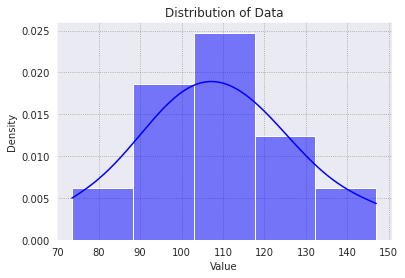

Number of peaks: 1
P-value: 1.0
Is significant: True


In [52]:
num_peaks, p_value, is_significant, _ = mode_hunting_test(DT_TORIN2_2)

print(f"Number of peaks: {num_peaks}")
print(f"P-value: {p_value}")
print(f"Is significant: {is_significant}")

* The doubling time interval data distribution due to the application of `25 uM Torin 1` on `BY4743` strain is **Unimodal**.

In [53]:
modality = {"Unimodal" : ["1% DMSO DT_Inflection", "1% DMSO DT_Interval", "2.5% DMSO DT_Interval", "2.5 ng/mL RAPA DT_Interval", "20 ng/mL RAPA DT_Inflection", "1 uM Torin 1 DT_Inflection", "1 uM Torin 1 DT_Interval", "25 uM Torin 1 DT_Interval"],
            "Bimodal" : ["2.5% DMSO DT_Inflection", "2.5 ng/mL RAPA DT_Inflection", "20 ng/mL RAPA DT_Interval", "25 uM Torin 1 DT_Inflection"]}

In [54]:
modality

{'Unimodal': ['1% DMSO DT_Inflection',
  '1% DMSO DT_Interval',
  '2.5% DMSO DT_Interval',
  '2.5 ng/mL RAPA DT_Interval',
  '20 ng/mL RAPA DT_Inflection',
  '1 uM Torin 1 DT_Inflection',
  '1 uM Torin 1 DT_Interval',
  '25 uM Torin 1 DT_Interval'],
 'Bimodal': ['2.5% DMSO DT_Inflection',
  '2.5 ng/mL RAPA DT_Inflection',
  '20 ng/mL RAPA DT_Interval',
  '25 uM Torin 1 DT_Inflection']}

In [55]:
UniM = {"1% DMSO (inflection)" : DT_DMSO1_1_avg,
        "1% DMSO (interval)" : DT_DMSO1_2_avg,
        "2.5% DMSO (interval)" : DT_DMSO2_2_avg,
        "2.5 ng/mL RAPA (interval)" : DT_RAPA1_2_avg,
        "20 ng/mL RAPA (inflection)" : DT_RAPA2_1_avg,
        "1 uM Torin 1 (inflection)" : DT_TORIN1_1_avg,
        "1 uM Torin 1 (interval)" : DT_TORIN1_2_avg,
        "25 uM Torin 1 (interval)" : DT_TORIN2_2_avg}

BiM = {"2.5% DMSO (inflection)" : DT_DMSO2_1_avg,
       "2.5 ng/mL RAPA (inflection)" : DT_RAPA1_1_avg,
       "20 ng/mL RAPA (interval)" : DT_RAPA2_2_avg,
       "25 uM Torin 1 (inflection)" : DT_TORIN2_1_avg}

In [56]:
def modality_normality_plot(data1, data2, plot_type="M"):
        
    fig,ax = plt.subplots(figsize=(20,15))

    d1_k = list(data1.keys())
    d1_v = list(data1.values())

    d2_k = list(data2.keys())
    d2_v = list(data2.values())

    data_k = d1_k + d2_k
    data_v = d1_v + d2_v
    
    x_axis1 = np.arange(len(d1_v))
    x_axis2 = np.arange(len(d2_v))
    
    if plot_type == "M":
        x_vals = ["Unimodal Distribution", "Bimodal Distribution"]        
        ax1 = -1.0
        ax2 = 9        
        ax.set_title("\nPlotting The Modality Distribution of Treatments in the BY4743 Strain\n", fontsize=16)
        
    else:
        x_vals = ["Normal Distribution", "~Normal Distribution"]        
        ax1 = 0.0
        ax2 = 8.0
        ax.set_title("\nPlotting The Normality Spectrum of Treatments in the BY4743 Strain\n", fontsize=16)
    
    ax.bar((x_axis1 + ax1), d1_v, width=0.54, align='center', color='#3d76da')
    ax.bar((x_axis2 + ax2), d2_v, width=0.54, align='center', color='#ff2020')
        
    ax.set_xticks([2.5,10.5], x_vals, fontsize=14, fontweight='bold')
    ax.set_ylabel("\nDoubling Time\n", fontsize=14, fontweight='bold')
    
    for k, i in enumerate(ax.patches):
            key = data_k[k]
            val = data_v[k]

            ax.text((i.get_xy()[0] + .2), (val/5),
            key, fontsize=14, fontweight='bold',
            color ='black', rotation=90)
    
    return ax

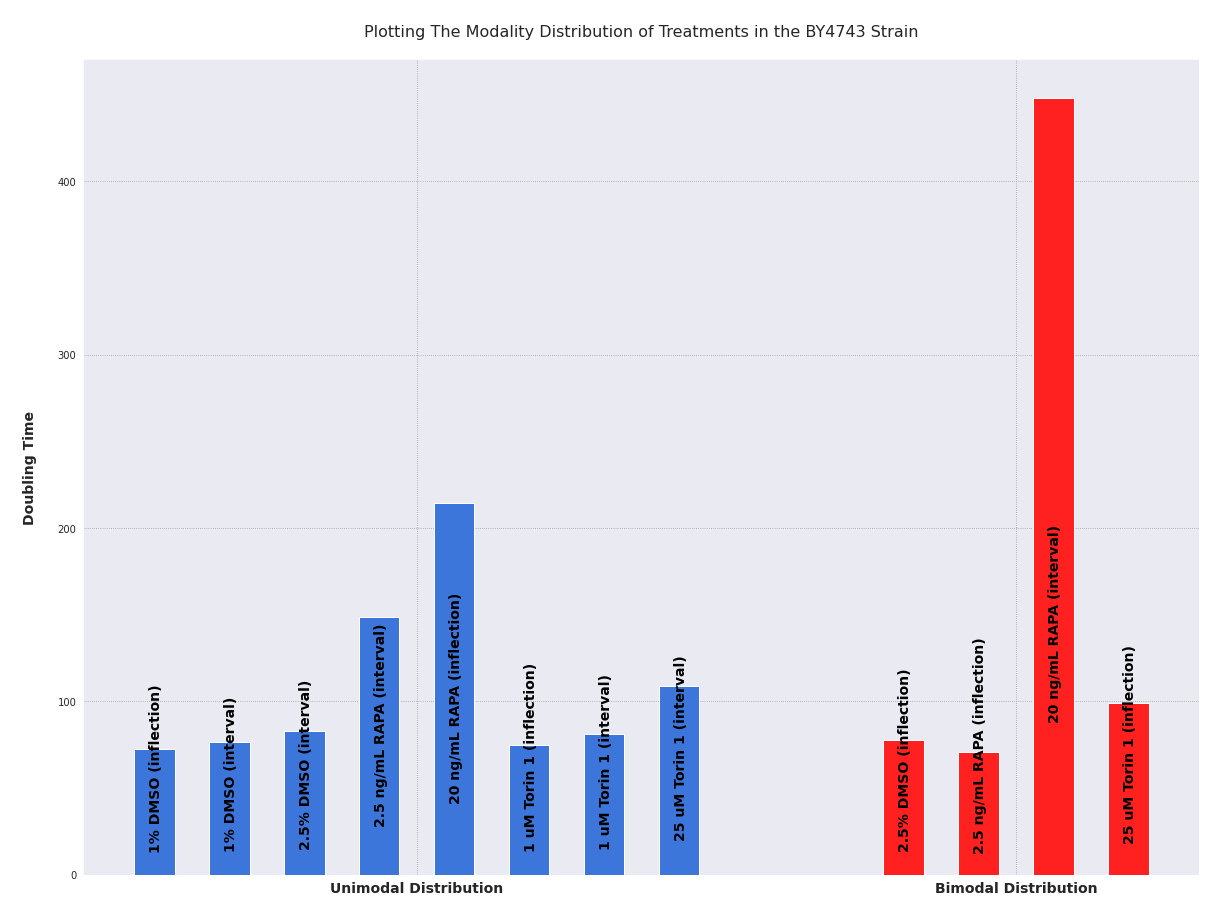

In [57]:
modality_normality_plot(UniM, BiM)
plt.show()

### Histogram-PDF Plot For Sample Populations, And Checking If They Have Normal Distributions.

In [58]:
def hist_pdf_plot(dt_type, treatment, strain=strains[0], dt=None):
    """
    Input Parameters:
        > dt_type = (DT interval) or (DT inflection) doubling time values
        > treatment = the target treatment
        > strain = strain of interest
        > dt = input data; by default set to None
    Returns:
        > axis for the plot
    """
    
    if dt is None:
        DT_treatment, _ = DT_vals_avg(dt_type, treatment, strain) #list((df_c[df_c.Treatment == treatment][dt_type]).reset_index(drop=True))
    else:
        DT_treatment = dt
    
    mean = np.mean(DT_treatment)
    standard_dev = statistics.stdev(DT_treatment)
    median = np.median(DT_treatment)

    plt.style.use('ggplot')

    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,6)) #creating plot axes
    (values, bins, _) = ax.hist(DT_treatment, bins=25, density=True, color='grey', alpha=.7, label="Histogram")

    bin_centers = 0.5*(bins[1:] + bins[:-1])

    pdf = stats.norm.pdf(x = bin_centers, loc=mean, scale=standard_dev) #Compute probability density function
    ax.plot(bin_centers, pdf, label="PDF",color='darkblue') #Plot PDF
    ax.axvline(mean, color='darkgreen', linestyle='dashed', linewidth=2, label='mean')
    ax.axvline(median, color='orange', linestyle='dashed', linewidth=2, label='median')

    ax.legend()#Legend entries
    ax.set_title(f'\nNormal Distribution (PDF) and Histogram representation of {dt_type} for {treatment}\n', fontsize=16)

    plt.tight_layout()
    
    return ax

In [59]:
# Performing Shapiro-Wilk normality test

def SW_test(dt_type, treatment, strain=strains[0],dt=None):
    if dt is None:
        data, _ = DT_vals_avg(dt_type, treatment, strain) #list((df_c[df_c.Treatment == treatment][dt_type]).reset_index(drop=True))
    else:
        data=dt
    if shapiro(data).pvalue < 0.05:
        return "Not A Normal Distribution"
    else:
        return "Is A Normal Distribution"

#### **1% DMSO**

> #### Doubling Time Inflection

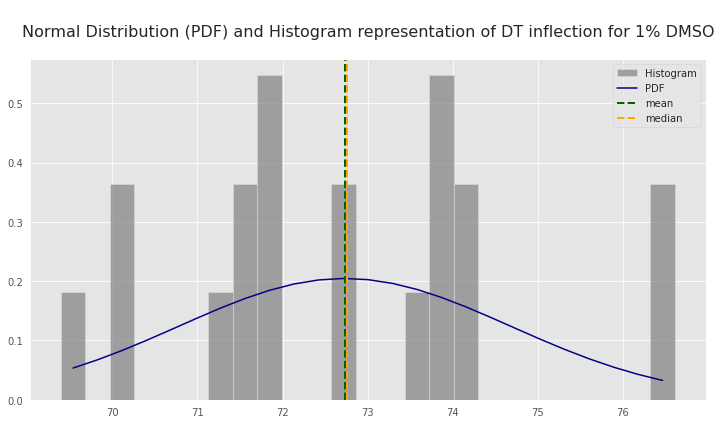

In [60]:
hist_pdf_plot('DT inflection', '1% DMSO', dt=DT_DMSO1_1)
plt.show()

In [61]:
sw1_1 = SW_test('DT inflection', '1% DMSO', dt=DT_DMSO1_1)
print(blue(sw1_1, 'bold'))

Is A Normal Distribution


> #### Doubling Time Interval

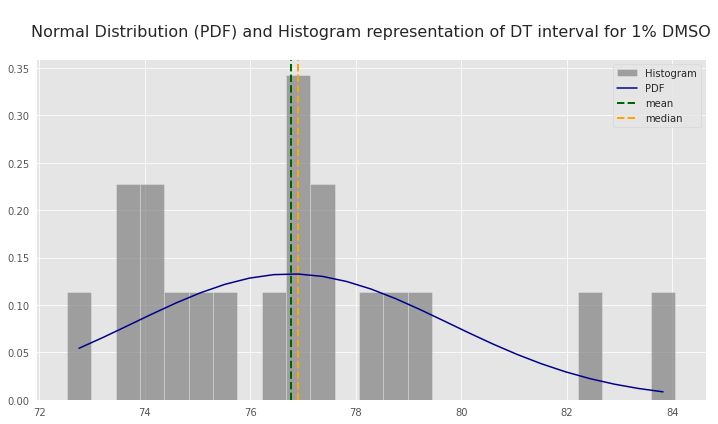

In [62]:
hist_pdf_plot("DT interval", '1% DMSO', dt=DT_DMSO1_2)
plt.show()

In [63]:
sw1_2 = SW_test("DT interval", '1% DMSO', dt=DT_DMSO1_2)
print(blue(sw1_2, 'bold'))

Is A Normal Distribution


#### **2.5% DMSO**

> #### Doubling Time Inflection

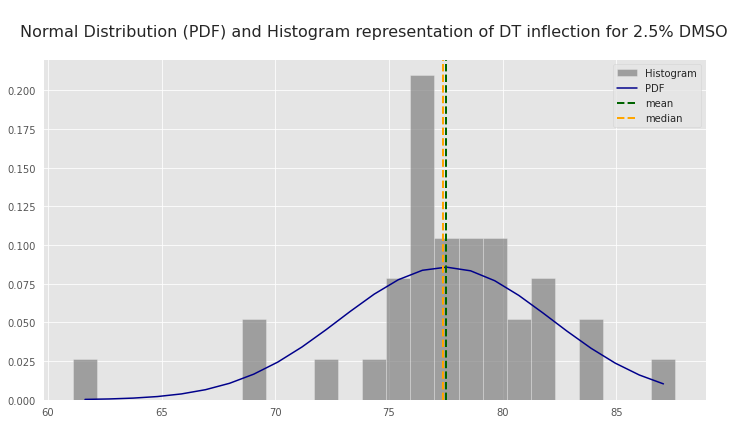

In [64]:
hist_pdf_plot('DT inflection', '2.5% DMSO', dt=DT_DMSO2_1)
plt.show()

In [65]:
sw2_1 = SW_test('DT inflection', '2.5% DMSO', dt=DT_DMSO2_1)
print(red(sw2_1, 'bold'))

Not A Normal Distribution


> #### Doubling Time Interval

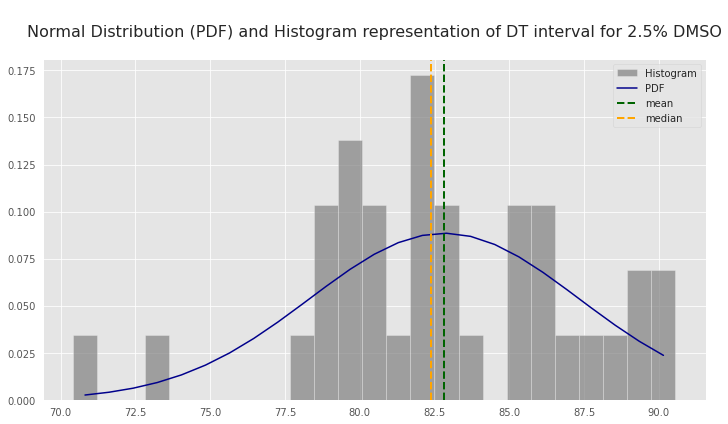

In [66]:
hist_pdf_plot('DT interval', '2.5% DMSO', dt=DT_DMSO2_2)
plt.show()

In [67]:
sw2_2 = SW_test('DT interval', '2.5% DMSO', dt=DT_DMSO2_2)
print(blue(sw2_2, 'bold'))

Is A Normal Distribution


#### **2.5 ng/mL Rapamycin**

> #### Doubling Time Inflection

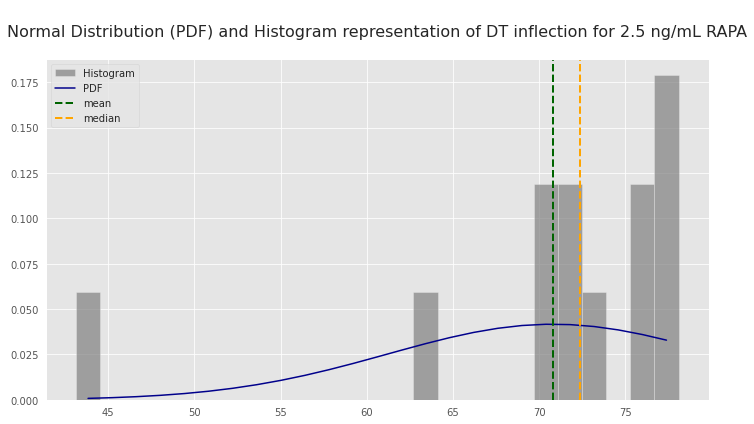

In [68]:
hist_pdf_plot("DT inflection", '2.5 ng/mL RAPA', dt=DT_RAPA1_1)
plt.show()

In [69]:
sw3_1 = SW_test("DT inflection", '2.5 ng/mL RAPA', dt=DT_RAPA1_1)
print(red(sw3_1, 'bold'))

Not A Normal Distribution


> #### Doubling Time Interval

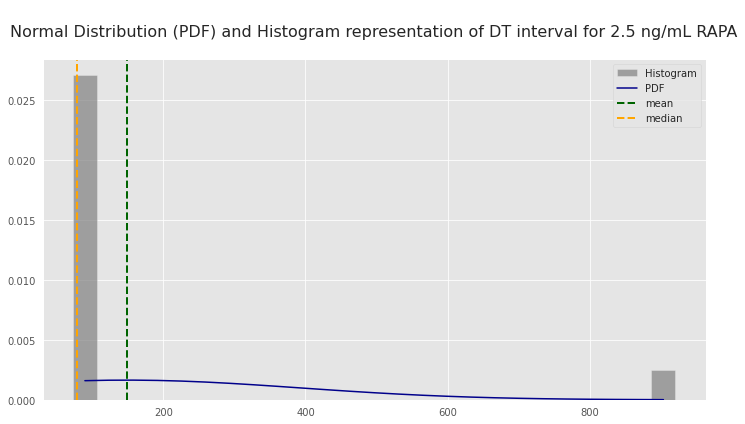

In [70]:
hist_pdf_plot("DT interval", '2.5 ng/mL RAPA', dt=DT_RAPA1_2)
plt.show()

In [71]:
sw3_2 = SW_test("DT interval", '2.5 ng/mL RAPA', dt=DT_RAPA1_2)
print(red(sw3_2, 'bold'))

Not A Normal Distribution


#### **20 ng/mL Rapamycin**

> #### Doubling Time Inflection

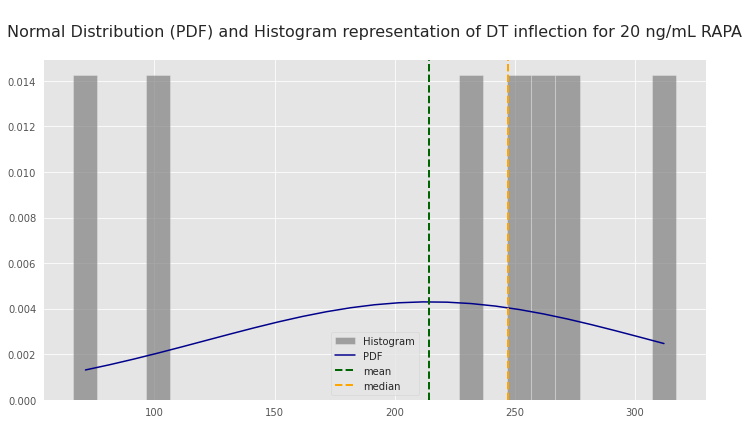

In [72]:
hist_pdf_plot("DT inflection", '20 ng/mL RAPA', dt=DT_RAPA2_1)
plt.show()

In [73]:
sw4_1 = SW_test("DT inflection", '20 ng/mL RAPA', dt=DT_RAPA2_1)
print(blue(sw4_1, 'bold'))

Is A Normal Distribution


> #### Doubling Time Interval

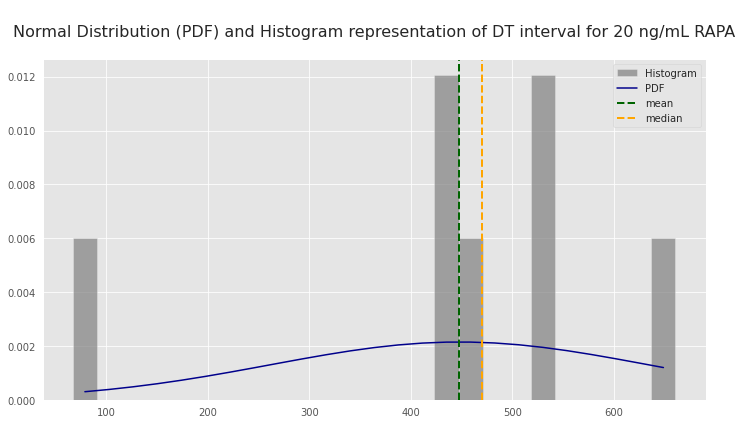

In [74]:
hist_pdf_plot("DT interval", '20 ng/mL RAPA', dt=DT_RAPA2_2)
plt.show()

In [75]:
sw4_2 = SW_test("DT interval", '20 ng/mL RAPA', dt=DT_RAPA2_2)
print(blue(sw4_2, 'bold'))

Is A Normal Distribution


#### **1 uM Torin 1**

> #### Doubling Time Inflection

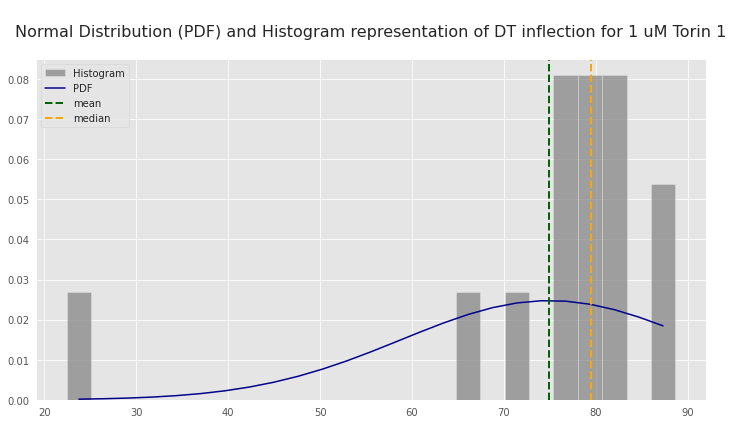

In [76]:
hist_pdf_plot("DT inflection", '1 uM Torin 1', dt=DT_TORIN1_1)
plt.show()

In [77]:
sw5_1 = SW_test("DT inflection", '1 uM Torin 1', dt=DT_TORIN1_1)
print(red(sw5_1, 'bold'))

Not A Normal Distribution


> #### Doubling Time Interval

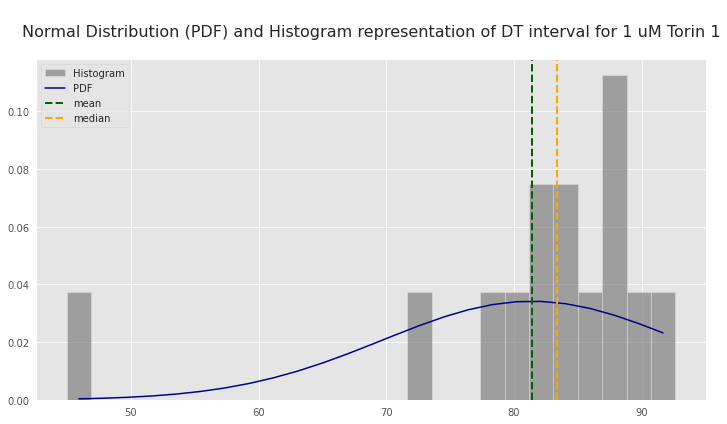

In [78]:
hist_pdf_plot("DT interval", '1 uM Torin 1', dt=DT_TORIN1_2)
plt.show()

In [79]:
sw5_2 = SW_test("DT interval", '1 uM Torin 1', dt=DT_TORIN1_2)
print(red(sw5_2, 'bold'))

Not A Normal Distribution


#### **25 uM Torin 1**

> #### Doubling Time Inflection

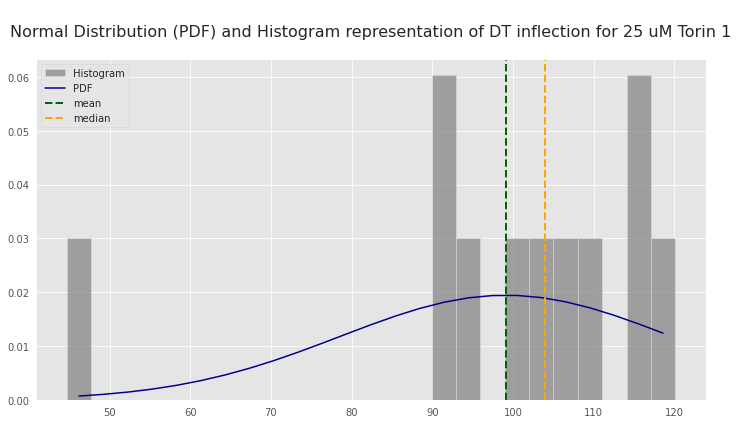

In [80]:
hist_pdf_plot("DT inflection", '25 uM Torin 1', dt=DT_TORIN2_1)
plt.show()

In [81]:
sw6_1 = SW_test("DT inflection", '25 uM Torin 1', dt=DT_TORIN2_1)
print(red(sw6_1, 'bold'))

Not A Normal Distribution


> #### Doubling Time Interval

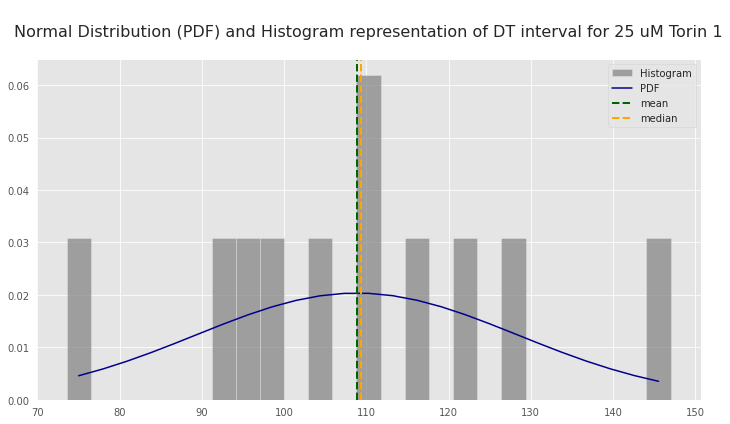

In [82]:
hist_pdf_plot("DT interval", '25 uM Torin 1', dt=DT_TORIN2_2)
plt.show()

In [83]:
sw6_2 = SW_test("DT interval", '25 uM Torin 1', dt=DT_TORIN2_2)
print(blue(sw6_2, 'bold'))

Is A Normal Distribution


#### **Plotting Normality Graph**

In [84]:
ND = {"1% DMSO (Inflection)" :  DT_DMSO1_1_avg,
      "1% DMSO (Interval)" :  DT_DMSO1_2_avg,
      "2.5% DMSO (Interval)" :  DT_DMSO2_2_avg,
      "20 ng/mL RAPA (Inflection)" : DT_RAPA2_1_avg,
      "20 ng/mL RAPA (Interval)" : DT_RAPA2_2_avg,
      "25 uM Torin 1 (Interval)" : DT_TORIN2_2_avg}

NND = {"2.5% DMSO (Inflection)" : DT_DMSO2_1_avg,
       "2.5 ng/mL RAPA (Inflection)" : DT_RAPA1_1_avg,
       "2.5 ng/mL RAPA (Interval)" : DT_RAPA1_2_avg,
       "1 uM Torin 1 (Inflection)" : DT_TORIN1_1_avg,
       "1 uM Torin 1 (Interval)" : DT_TORIN1_2_avg,
       "25 uM Torin 1 (Inflection)" : DT_TORIN2_1_avg}

In [85]:
modality_normality_plot(ND, NND, plot_type="N")
plt.show()

#### **Outlier Tests**

In [86]:
from sklearn.mixture import GaussianMixture

def GMM(data):
    k= 2
    data = [[i] for i in data]
    
    gmm = GaussianMixture(n_components=k)
    gmm.fit(data)

    probs = gmm.predict_proba(data)

    outlier_threshold = 0.05
    outliers = np.where(np.all(probs < outlier_threshold, axis=1))[0]
    ak = [data[i][0] for i in outliers]

    return ak#outliers#, probs

In [87]:
def Z_score(data, d_type="normal", threshold=2.5):
    
    n = len(data)
    
    # When the sample population is normally distributed
    if d_type == "normal":
        mean, std = np.mean(data), np.std(data)
        z_score = np.abs((data - mean) / std)
    
    # When the sample population is NOT Normally Distributed
    else:
        scaling_factor = 1 / norm.ppf(3/4) * np.sqrt((n * np.pi) / 2)
        median_val = np.median(data)
        mad = np.median([abs(d - median_val) for d in data])
        z_score = np.abs((data - median_val) / (scaling_factor * mad))
        
    good = z_score < threshold
    
    possible_outliers = list()
    for i in range(n):
        if not good[i]:
            possible_outliers.append(data[i])
    
    return z_score, possible_outliers

In [88]:
def grubbs_test(data, alpha=0.05):
    outlier_removed = grubbs.test(data, alpha=alpha)
    outliers = data.copy()
    for i in outlier_removed:
        if i in outliers:
            outliers.remove(i)
    return outliers

In [89]:
def IQR_MAD(data):
    """
    This outlier identification method is the integration of Interquartile Range and Median Absolute Deviation methods.
    -> Accepts: a list of doubling time inflection/interval values
    -> Returns: a list of outliers
    """
    
    n = len(data)
    k = 1.5
    
    median_val = np.median(data)
    mad = np.median([abs(d - median_val) for d in data])
    scaling_factor = 1 / norm.ppf(3/4) * np.sqrt((n * np.pi) / 2)
    mad_thresh = median_val + k * scaling_factor * mad
    
    data = pd.DataFrame(np.sort(data))
    
    q1 = data[0].quantile(0.25)
    q3 = data[0].quantile(0.75)
    iqr = q3-q1
    
    l_bound = q1 - 1.5*iqr
    h_bound = q3 + 1.5 *iqr
     
    outliers = list()
    for i in range(n):
        if ((data[0][i] < l_bound) or (data[0][i] > h_bound)) and (data[0][i] <= mad_thresh):
            outliers.append(data[0][i])
    return outliers

In [90]:
def common_outliers(data, d_type='normal', threshold=3):
    
    _, outlier1 = Z_score(data, d_type=d_type, threshold=threshold)
    
    if d_type == "normal":
        outlier2 = grubbs_test(data)
    else:
        outlier2 = IQR_MAD(data)
    
    return list(set(outlier1) & set(outlier2))

In [91]:
def wilcoxon_test(data1, data2=None):
    
    alpha = 0.05
    same = 0
    diff = 0
    iteration = (len(data1) - 1) if (len(data1) % 2 == 0) else len(data1)
     
    for i in range(iteration):
        new_data = data1.copy()
        
        if data2 is None:
            po_len = (len(new_data) // 2)
            po = random.sample(new_data, po_len)
        else:
            po_len = (len(new_data) - len(data2)) // 2
            po = random.sample(new_data, po_len)
            po.extend(data2)

        for i in po:
            if i in new_data:
                new_data.remove(i)
        
        if len(new_data) > len(po):
            new_data.pop(random.randrange(len(new_data)))

        stat, p = wilcoxon(po, new_data)

        if p > alpha:
            same += 1
        else:
            diff += 1
    
    if same > diff:
        return "Same distribution (fail to reject H0)"
    else:
        return "Different distribution (reject H0)"

#### **1% DMSO**

> #### Doubling Time Inflection

**Z-Score**

In [92]:
z_score1_1, possible_outliers1_1 = Z_score(data=DT_DMSO1_1, threshold=1)                                       #("DT inflection", '1% DMSO', threshold=3)
print(red("Doubling Time of possible outliers : ", 'bold'), possible_outliers1_1)

Doubling Time of possible outliers :  [69.39323588, 76.61181509, 70.1853122, 76.35258739, 70.25372001]


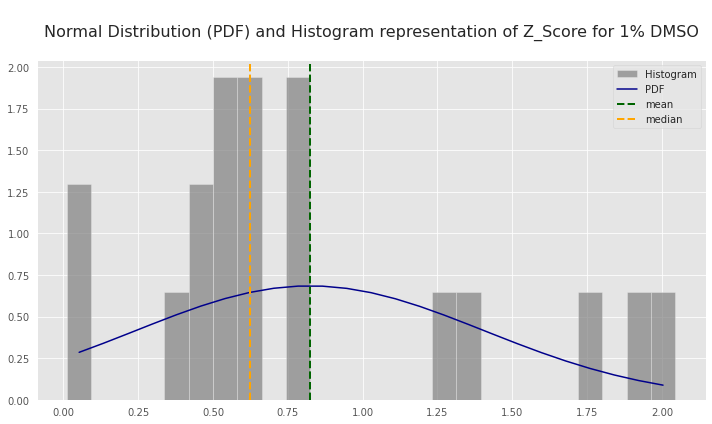

In [93]:
hist_pdf_plot('Z_Score', '1% DMSO', dt=z_score1_1)
plt.show()

**Grubbs' Test**

In [94]:
grubbs_test(data=DT_DMSO1_1)

[]

**Outliers Common to `Z-Score` and `Grubbs' Test`**

In [95]:
common_outliers(data=DT_DMSO1_1)

[]

In [96]:
possible_outliers1_1 = common_outliers(data=DT_DMSO1_1)
possible_outliers1_1

[]

> #### Doubling Time Interval

**Z-Score**

In [97]:
z_score1_2, possible_outliers1_2 = Z_score(data=DT_DMSO1_1)#("DT interval", '1% DMSO')
print(red("Doubling Time of possible outliers : ", 'bold'), possible_outliers1_2)

Doubling Time of possible outliers :  []


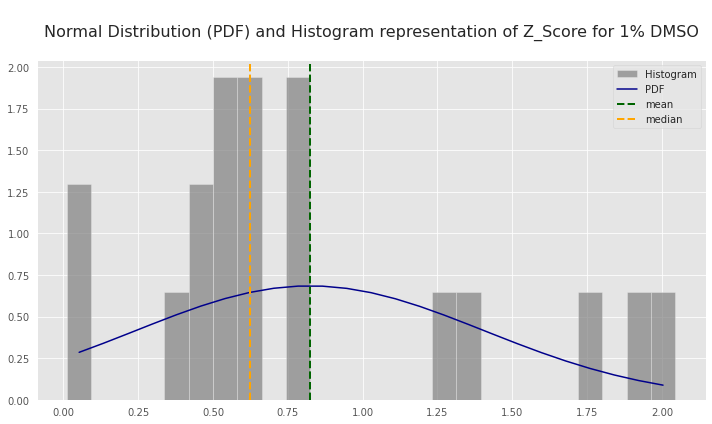

In [98]:
hist_pdf_plot('Z_Score', '1% DMSO', dt=z_score1_2)
plt.show()

**Grubbs' Test**

In [99]:
grubbs_test(data=DT_DMSO1_2)

[]

**Outliers Common to `Z-Score` and `Grubbs' Test`**

In [100]:
common_outliers(data=DT_DMSO1_2)

[]

In [101]:
possible_outliers1_2 = common_outliers(data=DT_DMSO1_2)
possible_outliers1_2

[]

#### **2.5% DMSO**

> #### Doubling Time Inflection

**Z-Score**

In [102]:
z_score2_1, possible_outliers2_1 = Z_score(data=DT_DMSO2_1, d_type="nn")
print(red("Doubling Time of possible outliers : ", 'bold'), possible_outliers2_1)

Doubling Time of possible outliers :  []


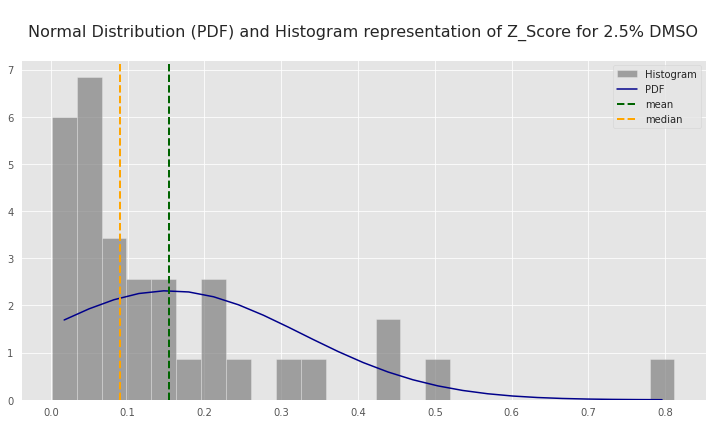

In [103]:
hist_pdf_plot('Z_Score', '2.5% DMSO', dt=z_score2_1)
plt.show()

**IQR_MAD**

In [104]:
IQR_MAD(data=DT_DMSO2_1)

[61.10590795, 68.57076026, 68.88651677, 87.60139813]

**Outliers Common to `Z-Score` and `IQR_MAD`**

In [105]:
common_outliers(data=DT_DMSO2_1, d_type="NN")

[]

In [106]:
possible_outliers2_1 = common_outliers(data=DT_DMSO2_1, d_type="NN")
possible_outliers2_1

[]

> #### Doubling Time Interval

**Z-Score**

In [107]:
z_score2_2, possible_outliers2_2 = Z_score(data=DT_DMSO2_2)#("DT interval", "2.5% DMSO")
print(red("Doubling Time of possible outliers : ", 'bold'), possible_outliers2_2)

Doubling Time of possible outliers :  [70.40931701]


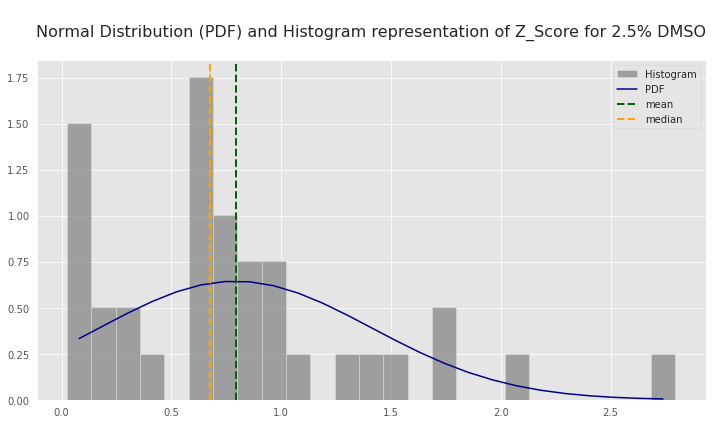

In [108]:
hist_pdf_plot('Z_Score', '2.5% DMSO', dt=z_score2_2)
plt.show()

**Grubbs' Test**

In [109]:
grubbs_test(data=DT_DMSO2_2)

[]

**Outliers Common to `Z-Score` and `Grubbs' Test`**

In [110]:
common_outliers(data=DT_DMSO2_2)

[]

In [111]:
possible_outliers2_2 = common_outliers(data=DT_DMSO2_2)
possible_outliers2_2

[]

#### **2.5 ng/mL Rapamycin**

> #### Doubling Time Inflection

**Z-Score**

In [112]:
z_score3_1, possible_outliers3_1 = Z_score(data=DT_RAPA1_2, d_type="nn")
print(red("Doubling Time of possible outliers : ", 'bold'), possible_outliers3_1)

Doubling Time of possible outliers :  [920.4317867]


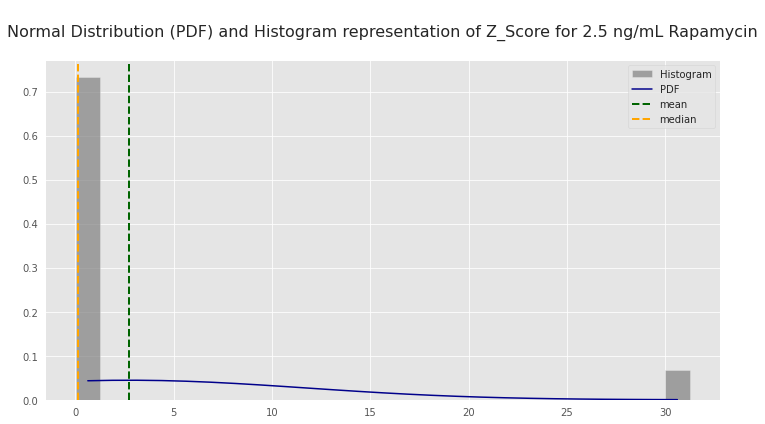

In [113]:
hist_pdf_plot('Z_Score', '2.5 ng/mL Rapamycin', dt=z_score3_1)
plt.show()

**IQR_MAD**

In [114]:
IQR_MAD(data=DT_RAPA1_2)

[]

**Outliers Common to `Z-Score` and `IQR_MAD`**

In [115]:
common_outliers(data=DT_RAPA1_2, d_type="NN")

[]

In [116]:
possible_outliers3_1 = common_outliers(data=DT_RAPA1_2, d_type="NN")
possible_outliers3_1

[]

> #### Doubling Time Interval

**Z-Score**

In [117]:
z_score3_2, possible_outliers3_2 = Z_score(data=DT_RAPA1_2, d_type="NN")
print(red("Doubling Time of possible outliers : ", 'bold'), possible_outliers3_2)

Doubling Time of possible outliers :  [920.4317867]


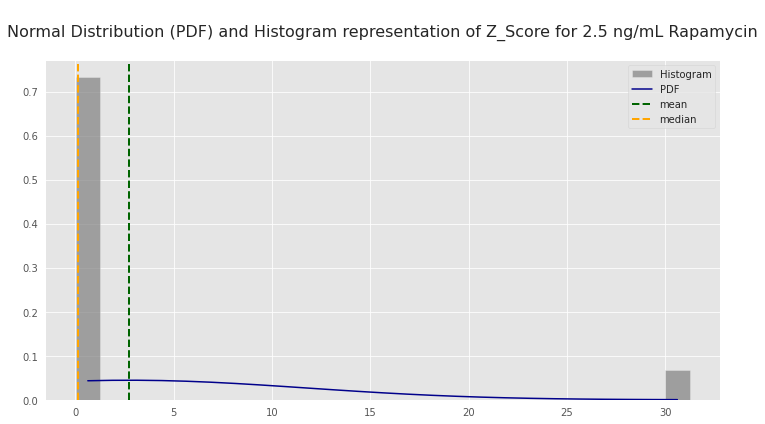

In [118]:
hist_pdf_plot('Z_Score', '2.5 ng/mL Rapamycin', dt=z_score3_2)
plt.show()

**IQR_MAD**

In [119]:
IQR_MAD(data=DT_RAPA1_2)

[]

**Outliers Common to `Z-Score` and `IQR_MAD`**

In [120]:
common_outliers(data=DT_RAPA1_2, d_type="NN")

[]

In [121]:
possible_outliers3_2 = common_outliers(data=DT_RAPA1_2, d_type="NN")
possible_outliers3_2

[]

#### **20 ng/mL Rapamycin**

> #### Doubling Time Inflection

**Z-Score**

In [122]:
z_score4_1, possible_outliers4_1 = Z_score(data=DT_RAPA2_1)#("DT inflection", "20 ng/mL RAPA")
print(red("Doubling Time of possible outliers : ", 'bold'), possible_outliers4_1)

Doubling Time of possible outliers :  []


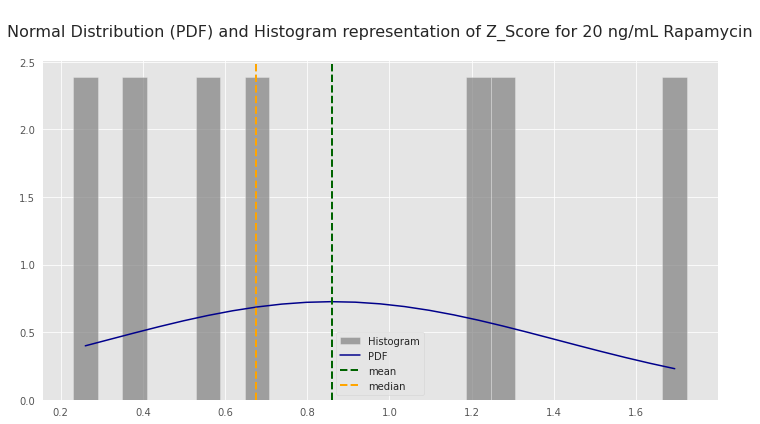

In [123]:
hist_pdf_plot('Z_Score', '20 ng/mL Rapamycin', dt=z_score4_1)
plt.show()

**Grubbs' Test**

In [124]:
grubbs_test(data=DT_RAPA2_1)

[]

**Outliers Common to `Z-Score` and `Grubbs' Test`**

In [125]:
common_outliers(data=DT_RAPA2_1)

[]

In [126]:
possible_outliers4_1 = common_outliers(data=DT_RAPA2_1)
possible_outliers4_1

[]

> #### Doubling Time Interval

**Z-Score**

In [127]:
z_score4_2, possible_outliers4_2 = Z_score(data=DT_RAPA2_2, d_type="NN")
print(red("Doubling Time of possible outliers : ", 'bold'), possible_outliers4_2)

Doubling Time of possible outliers :  []


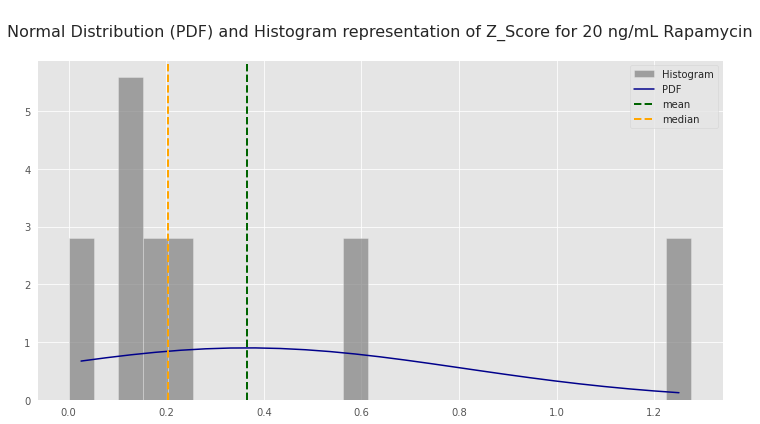

In [128]:
hist_pdf_plot('Z_Score', '20 ng/mL Rapamycin', dt=z_score4_2)
plt.show()

**IQR_MAD**

In [129]:
IQR_MAD(data=DT_RAPA2_2)

[67.47476893]

**Outliers Common to `Z-Score` and `IQR_MAD`**

In [130]:
common_outliers(data=DT_RAPA2_2, d_type="NN")

[]

In [131]:
possible_outliers4_2 = common_outliers(data=DT_RAPA2_2, d_type="NN")
possible_outliers4_2

[]

#### **1 uM Torin 1**

> #### Doubling Time Inflection

**Z-Score**

In [132]:
z_score5_1, possible_outliers5_1 = Z_score(data=DT_TORIN1_1, d_type="NN")
print(red("Doubling Time of possible outliers : ", 'bold'), possible_outliers5_1)

Doubling Time of possible outliers :  [22.44303054]


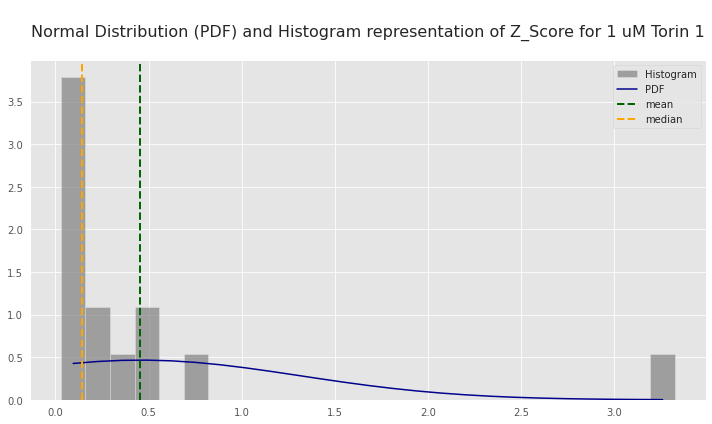

In [133]:
hist_pdf_plot('Z_Score', '1 uM Torin 1', dt=z_score5_1)
plt.show()

**IQR_MAD**

In [134]:
IQR_MAD(data=DT_TORIN1_1)

[22.44303054, 66.32216909, 88.64268986]

**Outliers Common to `Z-Score` and `IQR_MAD`**

In [135]:
common_outliers(data=DT_TORIN1_1, d_type='nn')

[22.44303054]

In [136]:
possible_outliers5_1 = common_outliers(data=DT_TORIN1_1, d_type='nn')
possible_outliers5_1

[22.44303054]

> #### Doubling Time Interval

**Z-Score**

In [137]:
z_score5_2, possible_outliers5_2  = Z_score(data=DT_TORIN1_2, d_type="NN")
print(red("Doubling Time of possible outliers : ", 'bold'), possible_outliers5_2)

Doubling Time of possible outliers :  []


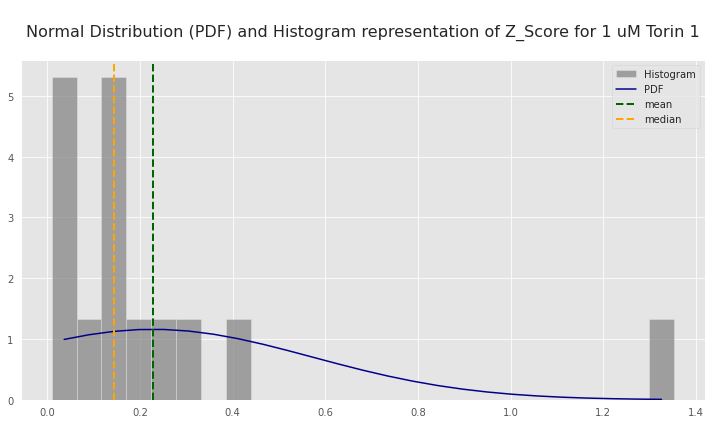

In [138]:
hist_pdf_plot('Z_Score', '1 uM Torin 1', dt=z_score5_2)
plt.show()

**IQR_MAD**

In [139]:
IQR_MAD(data=DT_TORIN1_2)

[44.97937761]

**Outliers Common to `Z-Score` and `IQR_MAD`**

In [140]:
common_outliers(data=DT_TORIN1_2, d_type="nn")

[]

In [141]:
possible_outliers5_2 = IQR_MAD(data=DT_TORIN1_2)
possible_outliers5_2

[44.97937761]

#### **25 uM Torin 1**

> #### Doubling Time Inflection

**Z-Score**

In [142]:
z_score6_1, possible_outliers6_1 = Z_score(data=DT_TORIN2_1, d_type="NN")
print(red("Doubling Time of possible outliers : ", 'bold'), possible_outliers6_1)

Doubling Time of possible outliers :  []


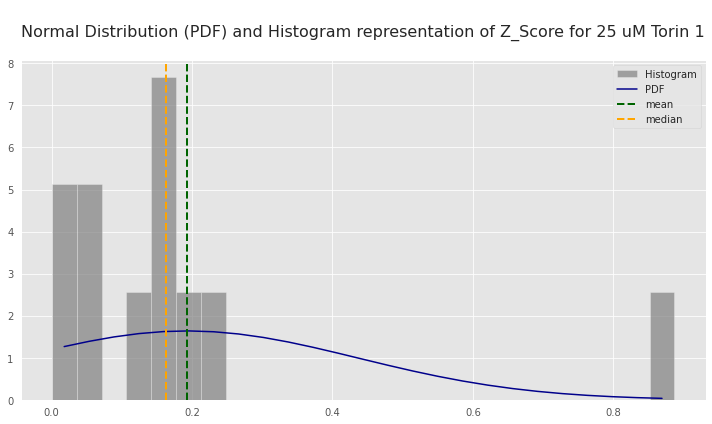

In [143]:
hist_pdf_plot('Z_Score', '25 uM Torin 1', dt=z_score6_1)
plt.show()

**IQR_MAD**

In [144]:
IQR_MAD(DT_TORIN2_1)

[44.68640796]

**Outliers Common to `Z-Score` and `IQR_MAD`**

In [145]:
common_outliers(DT_TORIN2_1,d_type="nn")

[]

In [146]:
possible_outliers6_1 = IQR_MAD(DT_TORIN2_1)
possible_outliers6_1

[44.68640796]

> #### Doubling Time Interval

**Z-Score**

In [147]:
z_score6_2, possible_outliers6_2 = Z_score(data=DT_TORIN2_2)#("DT interval", "25 uM Torin 1")
print(red("Doubling Time of possible outliers : ", 'bold'), possible_outliers6_2)

Doubling Time of possible outliers :  []


In [148]:
hist_pdf_plot('Z_Score', '25 uM Torin 1', dt=z_score6_2)
plt.show()

**Grubbs' Test**

In [149]:
grubbs_test(data=DT_TORIN2_2)

[]

**Outliers Common To `Z-Score` and `Grubbs' Test`**

In [150]:
common_outliers(data=DT_TORIN2_2)

[]

In [151]:
possible_outliers6_2 = common_outliers(data=DT_TORIN2_2)
possible_outliers6_2

[]

> #### **Assessing The Spread Of The Data**

How far spread the sample population is provides us with insight into the variability of the experiments conducted due to different factors. These factors include `error in measurement` and `unique treatment-strain property`. Each sample population will be checked if its respective `inflection` and `interval` **Standard deviation** values are greater than **10**. Data points that check the box will be subject to further investigation.

In [152]:
def std_hunt(treatment, strain=strains[0], thresh=10):

    idx = treatments.index(treatment) + 1
    data = st_data(treat_num=idx, strain=strain)
    std_data = data[(data.loc[:, 'StDev_int'] > thresh) | (data.loc[:, 'StDev_inf'] > thresh)]
    
    std_inf = list(std_data.loc[:,'StDev_inf'])
    std_int = list(std_data.loc[:,'StDev_int'])
    std_diff = np.abs(np.subtract(std_inf, std_int))
    
    dt_inf = list(std_data.loc[:,"DT inflection"])
    dt_int = list(std_data.loc[:,"DT interval"])    
    dt_diff = np.abs(np.subtract(dt_inf, dt_int))
    
    std_exp = list()
    for i in range(len(std_data)):
        std_exp.append(locate_exp(value=list(std_data["DT inflection"])[i], treatment=treatment, strain=strain))
    
    
    std_data['DT Difference'] = dt_diff
    std_data['StDev Difference'] = std_diff
    std_data["Experiment"] = std_exp
    
    return (std_data[["Experiment", "DT inflection", "DT interval", "DT Difference", "StDev_inf", "StDev_int", "StDev Difference"]]).reset_index(drop=True)

In [153]:
def bayes_oneSampleT_test(data1, data2):
    pass

**1% DMSO**

In [154]:
std_DMSO1 = std_hunt(treatment=treatments[2])
std_DMSO1

Experiment  DT inflection  \
0  SGRP_mTORinhibitsSCREEN_SET3_LOWRAPA_JEMBL_120...      74.239625   

   DT interval  DT Difference  StDev_inf  StDev_int  StDev Difference  
0    84.053244       9.813619   5.892001  11.998505          6.106504

> #### **Summary Analysis**

* With a value of **11.998505**, the standard deviation for `interval points` exceeds that for `inflection points` by **6.106504**.

**2.5% DMSO**

In [155]:
std_DMSO2 = std_hunt(treatment=treatments[1])
std_DMSO2

Experiment  DT inflection  DT interval  \
0  SGRP_mTORinhibitsSCREEN_SET2_GDC_AR_062617.xls      72.602163    87.137457   

   DT Difference  StDev_inf  StDev_int  StDev Difference  
0      14.535293   4.162105  10.778692          6.616587

**2.5 ng/mL Rapamycin**

In [156]:
std_RAPA1 = std_hunt(treatment=treatments[4])
std_RAPA1

Experiment  DT inflection  \
0  SGRP_mTORinhibsSCREEN_SET1_lowRAPA_KGPUMBL_050...      43.125895   

   DT interval  DT Difference  StDev_inf   StDev_int  StDev Difference  
0   920.431787     877.305892   3.842986  747.412577        743.569592

In [157]:
std_RAPA1_1 = std_RAPA1[std_RAPA1.StDev_inf > 10]
std_RAPA1_2 = std_RAPA1[std_RAPA1.StDev_int > 10]

In [158]:
std_RAPA1_1

Empty DataFrame
Columns: [Experiment, DT inflection, DT interval, DT Difference, StDev_inf, StDev_int, StDev Difference]
Index: []

In [159]:
std_RAPA1_2

Experiment  DT inflection  \
0  SGRP_mTORinhibsSCREEN_SET1_lowRAPA_KGPUMBL_050...      43.125895   

   DT interval  DT Difference  StDev_inf   StDev_int  StDev Difference  
0   920.431787     877.305892   3.842986  747.412577        743.569592

**20 ng/mL Rapamycin**

In [160]:
std_RAPA2 = std_hunt(treatment=treatments[3])
std_RAPA2

Experiment  DT inflection  \
0                  original data.xls SET 4 HIGH RAPA     260.047128   
1  SGRP_mTOR_inhibitsSCREEN_SET2_HighRAPA+LowTori...     317.061221   
2  SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low R...     246.949126   
3  SGRP_mTORinhibitsSCREEN_SET1HIGHrapaANDhighTOR...     103.605872   
4  SGRP_mTORinhibitsSCREEN_Set2_highRAPA_KGPU_112...     234.107209   
5  SGRP_mTORinhibitsSCREEN_SET3_round3_highRAPA_K...     272.346412   

   DT interval  DT Difference  StDev_inf   StDev_int  StDev Difference  
0   470.258578     210.211450  11.569153   21.283503          9.714351  
1   540.860914     223.799693  11.396644   32.967754         21.571109  
2   425.958663     179.009537  23.923174   61.086824         37.163650  
3   660.406587     556.800716   7.568691  126.750274        119.181583  
4   435.355752     201.248543  13.572955   37.430549         23.857594  
5   534.470140     262.123728  22.955615    2.515240         20.440374

In [161]:
std_RAPA2_1 = std_RAPA2[std_RAPA2.StDev_inf > 10]
std_RAPA2_2 = std_RAPA2[std_RAPA2.StDev_int > 10]

In [162]:
std_RAPA2_1

Experiment  DT inflection  \
0                  original data.xls SET 4 HIGH RAPA     260.047128   
1  SGRP_mTOR_inhibitsSCREEN_SET2_HighRAPA+LowTori...     317.061221   
2  SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low R...     246.949126   
4  SGRP_mTORinhibitsSCREEN_Set2_highRAPA_KGPU_112...     234.107209   
5  SGRP_mTORinhibitsSCREEN_SET3_round3_highRAPA_K...     272.346412   

   DT interval  DT Difference  StDev_inf  StDev_int  StDev Difference  
0   470.258578     210.211450  11.569153  21.283503          9.714351  
1   540.860914     223.799693  11.396644  32.967754         21.571109  
2   425.958663     179.009537  23.923174  61.086824         37.163650  
4   435.355752     201.248543  13.572955  37.430549         23.857594  
5   534.470140     262.123728  22.955615   2.515240         20.440374

In [163]:
std_RAPA2_2

Experiment  DT inflection  \
0                  original data.xls SET 4 HIGH RAPA     260.047128   
1  SGRP_mTOR_inhibitsSCREEN_SET2_HighRAPA+LowTori...     317.061221   
2  SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low R...     246.949126   
3  SGRP_mTORinhibitsSCREEN_SET1HIGHrapaANDhighTOR...     103.605872   
4  SGRP_mTORinhibitsSCREEN_Set2_highRAPA_KGPU_112...     234.107209   

   DT interval  DT Difference  StDev_inf   StDev_int  StDev Difference  
0   470.258578     210.211450  11.569153   21.283503          9.714351  
1   540.860914     223.799693  11.396644   32.967754         21.571109  
2   425.958663     179.009537  23.923174   61.086824         37.163650  
3   660.406587     556.800716   7.568691  126.750274        119.181583  
4   435.355752     201.248543  13.572955   37.430549         23.857594

**1 uM Torin 1**

In [164]:
std_TORIN1 = std_hunt(treatment=treatments[0])
std_TORIN1

Experiment  DT inflection  \
0  SGRP_mTORinhibitsSCREEN_SET3_LOWTORIN_MGK_0911...      22.443031   

   DT interval  DT Difference  StDev_inf  StDev_int  StDev Difference  
0    44.979378      22.536347   9.343027    43.7394         34.396373

**25 uM Torin 1**

In [165]:
std_TORIN2 = std_hunt(treatment=treatments[6])
std_TORIN2

Experiment  DT inflection  \
0  SGRP_mTORinhibitsSCREEN_SET2_LOWRAPA_highTORIN...     120.091412   

   DT interval  DT Difference  StDev_inf  StDev_int  StDev Difference  
0   147.009538      26.918126  29.261403  55.044363          25.78296

In [166]:
help(st_data)

Help on function st_data in module __main__:

st_data(treat_num, path='./Data/By Treatment/Treatment_', strain='BY4743', feature_drop=True)
    > Treatment number, indicated by the parameter 'treat_num', can be identified by the following pattern:
        <> 1 uM Torin 1     _______    1
        <> 2.5% DMSO        _______    2
        <> 1% DMSO          _______    3
        <> 20 ng/mL RAPA    _______    4
        <> 2.5 ng/mL RAPA   _______    5
        <> 6.67% H2O        _______    6
        <> 25 uM Torin 1    _______    7
        <> 100 uM GDC0941   _______    8
        <> 1 mg/mL Caffeine _______    9
        <> 100 uM AZD8055   _______    10
    
    > The 'path' parameter is by default set equal to t_path.
    
    > The 'strain' parameter is set equal to "BY4743" by default.
    
    > The 'feature_drop' parameters gives a boolean option to clean the desired data of the extraneous features. It is set to True by default.
    
    > Returns a DataFrame for the specified treatm

In [167]:
# wilcoxon_test(new_DT6_1, possible_outliers6_1)

In [168]:
# def t_test(data1, po=None, confidence_level=0.95):
    
#     mean = np.mean(data1)
#     std = np.std(data1)
    
#     t_stat, p_value = stats.ttest_1samp(a = po,                 # Sample data
#                       popmean = mean1)                          # Pop mean
    
#     low_quartile = stats.t.ppf(q=0.025,                         # Quantile to check
#                                df=(len(po)-1))                  # Degrees of freedom
    
#     high_quartile = stats.t.ppf(q = 0.975,                      # Quantile to check
#                                 df = (len(po)-1))               # Degrees of freedom
    
#     sigma = np.std(po)/len(po)                                  # Sample stdev / sample size

#     low_interval, high_interval = stats.t.interval(alpha=confidence_level,  # Confidence level
#                      df = (len(data1)-1),                       # Degrees of freedom
#                      loc = np.mean(po),                         # Sample mean
#                      scale = sigma)
    
#     if (low_quartile < t_stat < high_quartile) and (low_interval < mean < high_interval) and (p_value > 0.05):
          # return "Do Not Reject Null-Hypothesis"
#         result_1 = f"The t-statistics is within the range of the upper and lower quantiles, and the probability of encountering a data distribution of like our sample data is {round(p_value * 100, 2)}%."
#         result_2 = f"Calculating for the confidence interval by taking a 95% confidence level reveals to include the mean of the population sample (DT_DMSO_1), meaning we can accept the null hypothesis of considering the sample data distributions not being outliers."

### **The T-tests perfomed below are inadmissible for the anomaly detection section**

Performing **T-test** to ascertain the validity of:
   1. **Null Hypothesis** :- The sample data distribution is not an outlier
   2. **Hypothesis** :- The sample data distribution is an outlier

#### **1% DMSO**

* Variables to test: **1% DMSO possible outliers in BY4743 strain** and (**1% DMSO for both BY4743 strain and the total strain population**)
* Values : **Doubling Time**

In [169]:
# mean1 = np.mean(DT_DMSO1_1)
# std1 = np.std(DT_DMSO1_1)
# print(blue("Mean of DT_DMSO_1 : ", 'bold'), mean1, green("\nStandard Deviation of DT_DMSO_1 : ", 'bold'), std1)

In [170]:
# stats.ttest_1samp(a = possible_outliers1_1, # Sample data
#                   popmean = mean1)        # Pop mean

In [171]:
# possible_outliers1_1

In [172]:
# stats.t.ppf(q=0.025,                        # Quantile to check
#             df=(len(possible_outliers1_1)-1)) # Degrees of freedom

In [173]:
# stats.t.ppf(q = 0.975,                        # Quantile to check
#             df = (len(possible_outliers1_1)-1)) # Degrees of freedom

The t-statistics is **within the range** of the upper and lower quantiles, and the probability of encountering a data distribution of like our sample data is **92.02%**.

In [174]:
# sigma = np.std(possible_outliers1_1)/len(possible_outliers1_1) # Sample stdev / sample size

# stats.t.interval(alpha=0.95,                               # Confidence level
#                  df = (len(DT_DMSO1_1)-1),                  # Degrees of freedom
#                  loc = np.mean(possible_outliers1_1),        # Sample mean
#                  scale = sigma)

Calculating for the **confidence interval** by taking a `95% confidence level` reveals to include the mean of the population sample (DT_DMSO_1), meaning we can **accept the null hypothesis** of considering the sample data distributions not being outliers.

> #### By accepting the null hypothesis, it can be concluded that there are no out of the ordinary doubling time measurements corresponding to 1% DMSO treatments on the BY4743 strain that would lead as to believe there is something unusual about the corresponding experiments.

#### **2.5% DMSO**

* Variables to test: **2.5% DMSO possible outliers in BY4743 strain** and (**2.5% DMSO for both BY4743 strain and the total strain population**)
* Values : **Doubling Time**

In [175]:
# mean2 = np.mean(DT_DMSO1_2)
# std2 = np.std(DT_DMSO1_2)
# print(blue("Mean of DT_DMSO_2 : ", 'bold'), mean2, green("\nStandard Deviation of DT_DMSO_2 : ", 'bold'), std2)

In [176]:
# stats.ttest_1samp(a = possible_outliers2_1, # Sample data
#                   popmean = mean2)        # Pop mean

In [177]:
# stats.t.ppf(q=0.025,                        # Quantile to check
#             df=(len(possible_outliers2_1)-1)) # Degrees of freedom

In [178]:
# stats.t.ppf(q = 0.975,                        # Quantile to check
#             df = (len(possible_outliers2_1)-1)) # Degrees of freedom

The t-statistics is **within the range** of the upper and lower quantiles, and the probability of encountering a data distribution like our sample data within the whole population distribution is **57.74%**.

In [179]:
# sigma = np.std(possible_outliers2_1)/len(possible_outliers2_1) # Sample stdev / sample size

# stats.t.interval(alpha=0.95,                               # Confidence level
#                  df = (len(DT_DMSO1_2)-1),                  # Degrees of freedom
#                  loc = np.mean(possible_outliers2_1),        # Sample mean
#                  scale = sigma)

Working out for the **confidence interval** by taking a `95% confidence level`, it shows that the mean of the population sample (DT_DMSO_2) is within range, meaning we can **accept the null hypothesis** of considering the sample data distributions not being outliers.

> #### By accepting the null hypothesis, it can be surmised that there are no out of the ordinary doubling time measurements corresponding to 2.5% DMSO treatments on the BY4743 strain that would lead as to believe there is something unusual about the corresponding experiments.

#### **2.5 ng/mL Rapamycin**

* Variables to test: **2.5 ng/mL Rapamycin possible outliers in BY4743 strain** and (**2.5 ng/mL Rapamycin for both BY4743 strain and the total strain population**)
* Values : **Doubling Time**

In [180]:
# mean3 = np.mean(DT_RAPA1_1)
# std3 = np.std(DT_RAPA1_1)
# print(blue("Mean of DT_RAPA_1 : ", 'bold'), mean3, green("\nStandard Deviation of DT_RAPA_1 : ", 'bold'), std3)

In [181]:
# stats.ttest_1samp(a = possible_outliers3_1, # Sample data
#                   popmean = mean3)        # Pop mean

We have a `t-statistics` and `pvalue` of `nan` because the sample data distribution presented is just a single value.

> #### Since the second layer of outlier verification is not suitable for application, relying on the first level detection is a logical way to go forward. The possible outlier data point detected is, therefore, treated as an outlier. Accepting the alternative hypothesis leads us to believe that something unusual must have happened in the experiment corresponding to the outlier data point, and opens the possibility for further investigation.

#### **20 ng/mL Rapamycin**

* Variables to test: **20 ng/mL Rapamycin possible outliers in BY4743 strain** and (**20 ng/mL Rapamycin for both BY4743 strain and the total strain population**)
* Values : **Doubling Time**

In [182]:
# mean4 = np.mean(DT_RAPA_2)
# std4 = np.std(DT_RAPA_2)
# print(blue("Mean of DT_RAPA_2 : ", 'bold'), mean4, green("\nStandard Deviation of DT_RAPA_2 : ", 'bold'), std4)

In [183]:
# stats.ttest_1samp(a = possible_outliers4_1, # Sample data
#                   popmean = mean4)        # Pop mean

In [184]:
# stats.t.ppf(q=0.025,                        # Quantile to check
#             df=(len(possible_outliers4_1)-1)) # Degrees of freedom

In [185]:
# stats.t.ppf(q=0.975,                        # Quantile to check
#             df=(len(possible_outliers4_1)-1)) # Degrees of freedom

The t-statistics is **within the range** of the upper and lower quantiles, and the probability of encountering a data distribution like our sample data within the whole population distribution is **57.39%**.

In [186]:
# sigma = np.std(possible_outliers4_1)/len(possible_outliers4_1) # Sample stdev / sample size

# stats.t.interval(alpha=0.95,                               # Confidence level
#                  df = (len(DT_RAPA_2)-1),                  # Degrees of freedom
#                  loc = np.mean(possible_outliers4_1),        # Sample mean
#                  scale = sigma)

Working out for the **confidence interval** by taking a `95% confidence level`, it shows that the mean of the population sample (DT_RAPA_2) is within range, meaning we can **accept the null hypothesis** of considering the sample data distributions not being outliers.

> #### By accepting the null hypothesis, it can be surmised that there are no out of the ordinary doubling time measurements corresponding to 20 ng/mL Rapamycin treatments on the BY4743 strain that would lead as to believe there is something unusual about the corresponding experiments.

#### **NB :** It should be noted that by varying the value for the confidence level, a statistical significance could arise indicating the possible outliers are indeed one. This results in the acceptance of the alternative hypothesis, and inturn lead us to believe there is something interesting happening with the corresponding experiments performed. It should also be noted that the minimal data points presented for the total population and sample data distribution for the BY4743 strain is a hinderance for outlier identification.

### **Comparing and plotting the growth rate over time for BY4743 strain**

In [187]:
help(st_data)

Help on function st_data in module __main__:

st_data(treat_num, path='./Data/By Treatment/Treatment_', strain='BY4743', feature_drop=True)
    > Treatment number, indicated by the parameter 'treat_num', can be identified by the following pattern:
        <> 1 uM Torin 1     _______    1
        <> 2.5% DMSO        _______    2
        <> 1% DMSO          _______    3
        <> 20 ng/mL RAPA    _______    4
        <> 2.5 ng/mL RAPA   _______    5
        <> 6.67% H2O        _______    6
        <> 25 uM Torin 1    _______    7
        <> 100 uM GDC0941   _______    8
        <> 1 mg/mL Caffeine _______    9
        <> 100 uM AZD8055   _______    10
    
    > The 'path' parameter is by default set equal to t_path.
    
    > The 'strain' parameter is set equal to "BY4743" by default.
    
    > The 'feature_drop' parameters gives a boolean option to clean the desired data of the extraneous features. It is set to True by default.
    
    > Returns a DataFrame for the specified treatm

In [188]:
treatments

['1 uM Torin 1',
 '2.5% DMSO',
 '1% DMSO',
 '20 ng/mL RAPA',
 '2.5 ng/mL RAPA',
 '6.67% H2O',
 '25 uM Torin 1',
 '100 uM GDC0941',
 '1 mg/mL Caffeine',
 '100 uM AZD8055']

In [189]:
RAPA1_control = st_data(treat_num=5, path=t_path, strain="BY4743")
RAPA2_control = st_data(treat_num=4, path=t_path, strain="BY4743")

In [190]:
DMSO1_control = st_data(treat_num=3, path=t_path, strain="BY4743")
DMSO2_control = st_data(treat_num=2, path=t_path, strain="BY4743")

In [191]:
Torin1_control = st_data(treat_num=1, path=t_path, strain="BY4743")
Torin2_control = st_data(treat_num=7, path=t_path, strain="BY4743")

In [192]:
GDC0941_control = st_data(treat_num=8, path=t_path, strain="BY4743")
Caffeine_control = st_data(treat_num=9, path=t_path, strain="BY4743")
AZD8055_control = st_data(treat_num=10, path=t_path, strain="BY4743")
H2O_control = st_data(treat_num=6, path=t_path, strain="BY4743")

In [193]:
RAPA1_control

DT inflection  StDev_inf  DT interval   StDev_int  Time_0  Time_0.5  \
0       64.013175   2.594965    83.988136    3.220114       0  0.036667   
1       78.088369   0.383663    80.376903    2.150477       0  0.036667   
2       77.561893   3.355332    89.770834    3.545155       0  0.043333   
3       77.097257   0.437107    81.161361    0.575085       0  0.054667   
4       71.941502   1.365780    72.825664    1.189565       0  0.035667   
5       71.631594   1.187630    73.752719    0.695045       0  0.038667   
6       76.290039   3.106836    77.893450    2.691584       0  0.047667   
7       70.463244   1.109997    73.498258    0.888125       0  0.033000   
8       71.088198   1.631667    74.545128    0.424365       0  0.029333   
9       72.812718   2.389806    75.261727    1.535911       0  0.046667   
10      75.457139   2.587309    78.780015    2.000014       0  0.037333   
11      43.125895   3.842986   920.431787  747.412577       0  0.030667   

      Time_1  Time_1.5    Time_2  Time_2.5    Time_3  Time_3.5    Time_4  \
0   0.039667  0.042667  0.049667  0.056667  0.089000  0.118000  0.158000   
1   0.040667  0.043333  0.051000  0.065000  0.083000  0.106000  0.139000   
2   0.046000  0.049333  0.057000  0.069000  0.085667  0.111333  0.139333   
3   0.058000  0.063667  0.073667  0.088667  0.107667  0.134667  0.173333   
4   0.039667  0.045000  0.054000  0.070000  0.091667  0.120333  0.160667   
5   0.043667  0.051000  0.061000  0.076667  0.097000  0.125333  0.164000   
6   0.054667  0.063667  0.080667  0.100667  0.131000  0.169333  0.222000   
7   0.037000  0.041000  0.049333  0.063333  0.084000  0.110667  0.150000   
8   0.033000  0.038667  0.049000  0.064000  0.084333  0.111667  0.149000   
9   0.053667  0.066333  0.083000  0.107000  0.143667  0.190333  0.250667   
10  0.040667  0.048667  0.060667  0.079333  0.101667  0.133333  0.174667   
11  0.034000  0.038667 -0.025667  0.055333  0.069333  0.089667  0.117000   

    Time_4.5    Time_5  Time_5.5    Time_6  Time_6.5    Time_7  Time_7.5  \
0   0.218667  0.269333  0.349667  0.438333  0.541667  0.644333  0.753333   
1   0.182000  0.234333  0.303667  0.393333  0.494333  0.615000  0.733000   
2   0.181333  0.234000  0.293667  0.368000  0.449000  0.536667  0.631667   
3   0.220667  0.289000  0.375000  0.483000  0.611333  0.753000  0.891333   
4   0.214667  0.285667  0.375667  0.484333  0.608667  0.736667  0.864333   
5   0.216667  0.289667  0.380000  0.489333  0.617000  0.759000  0.901333   
6   0.289000  0.376000  0.482333  0.605333  0.744667  0.881667  1.006000   
7   0.201000  0.267667  0.351333  0.454333  0.575333  0.705000  0.829667   
8   0.200000  0.263333  0.346333  0.447667  0.568000  0.694000  0.819000   
9   0.329333  0.429667  0.545333  0.670000  0.796667  0.917000  1.011333   
10  0.229333  0.297333  0.383000  0.486000  0.601333  0.722333  0.841667   
11  0.152000  0.201667  0.260000  0.266667  0.431333  0.535333  0.588000   

      Time_8  Time_8.5    Time_9  Time_9.5   Time_10  Time_10.5   Time_11  \
0   0.857667  0.942000  1.001000  1.011667  1.024667   1.032333  1.046333   
1   0.853000  0.968333  1.058333  1.107667  1.108667   1.114000  1.123333   
2   0.731333  0.829667  0.921667  1.005333  1.067000   1.118000  1.143667   
3   1.014333  1.114333  1.184667  1.215667  1.227000   1.233333  1.238333   
4   0.982667  1.068333  1.115333  1.124333  1.130667   1.140333  1.150000   
5   1.024000  1.125000  1.181333  1.194333  1.205000   1.215333  1.225000   
6   1.107333  1.180333  1.225667  1.243667  1.251667   1.261333  1.269667   
7   0.950333  1.047667  1.100333  1.106000  1.111667   1.121333  1.129000   
8   0.936667  1.036000  1.092333  1.104333  1.108667   1.115667  1.124000   
9   1.068333  1.089333  1.093667  1.100333  1.110333   1.119667  1.128333   
10  0.947667  1.029667  1.074333  1.085000  1.085333   1.089667  1.096667   
11  0.777333  0.898000  1.005333  1.082000  1.113333   1.114333  1.118000   

    Time_11.5   Time_12  Time_12.5   Time_13  Ti

In [194]:
RAPA2_control

DT inflection  StDev_inf  DT interval   StDev_int  Time_0  Time_0.5  \
0     260.047128  11.569153   470.258578   21.283503       0  0.038333   
1     317.061221  11.396644   540.860914   32.967754       0  0.034000   
2     246.949126  23.923174   425.958663   61.086824       0  0.038667   
3      66.280048   1.170398    67.474769    1.769920       0  0.038333   
4     103.605872   7.568691   660.406587  126.750274       0  0.028333   
5     234.107209  13.572955   435.355752   37.430549       0  0.032333   
6     272.346412  22.955615   534.470140    2.515240       0  0.040333   

     Time_1  Time_1.5    Time_2  Time_2.5    Time_3  Time_3.5    Time_4  \
0  0.042000  0.048667  0.054000  0.059000  0.064000  0.068667  0.074000   
1  0.038000  0.042000  0.044000  0.046333  0.048667  0.052667  0.056667   
2  0.044000  0.052000  0.060000  0.065333  0.074000  0.082000  0.091000   
3  0.040000  0.043000  0.045000  0.048333  0.052333  0.056000  0.061333   
4  0.033667  0.041667  0.049333  0.056333  0.066667  0.072667  0.076667   
5  0.037000  0.042667  0.048667  0.053667  0.059333  0.065333  0.072333   
6  0.045333  0.050000  0.054000  0.058000  0.062667  0.067000  0.071000   

   Time_4.5    Time_5  Time_5.5    Time_6  Time_6.5    Time_7  Time_7.5  \
0  0.081000  0.086667  0.093000  0.100667  0.108667  0.116000  0.123667   
1  0.060000  0.063667  0.067667  0.071333  0.076333  0.080667  0.084333   
2  0.099333  0.108667  0.118333  0.128000  0.141000  0.151667  0.163667   
3  0.067667  0.077000  0.089000  0.108333  0.136000  0.179333  0.243000   
4  0.083667  0.091333  0.142333  0.107667  0.117667  0.127000  0.141667   
5  0.079000  0.086667  0.093667  0.101333  0.110000  0.117000  0.127667   
6  0.076333  0.081667  0.086333  0.092667  0.098000  0.104000  0.111000   

     Time_8  Time_8.5    Time_9  Time_9.5   Time_10  Time_10.5   Time_11  \
0  0.131000  0.140000  0.150000  0.158000  0.168000   0.178000  0.188000   
1  0.090000  0.095333  0.100000  0.106333  0.111333   0.117333  0.124000   
2  0.174667  0.188333  0.201333  0.216000  0.229333   0.245333  0.258667   
3  0.332333  0.453667  0.598000  0.747000  0.872667   0.979333  1.062333   
4  0.148333  0.155667  0.176333  0.179000  0.192000   0.206667  0.213333   
5  0.136667  0.146667  0.157000  0.168000  0.180667   0.193000  0.206333   
6  0.116667  0.125000  0.130667  0.139000  0.146667   0.150667  0.162667   

   Time_11.5   Time_12  Time_12.5   Time_13  Time_13.5   Time_14  Time_14.5  \
0   0.198667  0.211333   0.221333  0.231667   0.244667  0.256333   0.269333   
1   0.130667  0.137667   0.144333  0.152333   0.160000  0.167667   0.175000   
2   0.274333  0.290667   0.307333  0.324000   0.339333  0.355333   0.371333   
3   1.125333  1.170333   1.204667  1.232333   1.253333  1.270667   1.285000   
4   0.227333  0.237667   0.249333  0.304333   0.279667  0.285333   0.298333   
5   0.219000  0.234000   0.247000  0.261000   0.276333  0.292333   0.308000   
6   0.171000  0.179333   0.188333  0.197000   0.207000  0.216333   0.224000   

    Time_15  Time_15.5   Time_16  Time_16.5   Time_17  Time_17.5   Time_18  \
0  0.281333   0.293667  0.308333   0.320333  0.333000   0.346000  0.362000   
1  0.184667   0.191333  0.200000   0.210000  0.217000   0.226000  0.235000   
2  0.389667   0.406000  0.423000   0.440333  0.458000   0.475667  0.493667   
3  1.295000   1.302333  1.307333   1.309667  1.310000   1.308667  1.310667   
4  0.311667   0.321000  0.334667   0.345333  0.358667   0.366333  0.383333   
5  0.323333   0.339333  0.355667   0.371000  0.386667   0.404333  0.421667   
6  0.237000   0.245000  0.254000   0.264667  0.275667   0.289333  0.300667   

   Time_18.5   Time_19  Time_19.5   Time_20  
0   0.376333  0.389000   0.405667  0.421000  
1   0.246667  0.256000   0.265667  0.275667  
2   0.508667  0.526333   0.544000  0.563333  
3   1.304000  1.301000   1.292000  1.284000  
4   0.393333  0.405333   0.416333  0.430667  
5   0.438667  0.454667   0.471667  0.490333  
6   0.312000  0.323

In [195]:
DMSO1_control

DT inflection  StDev_inf  DT interval  StDev_int  Time_0  Time_0.5  \
0       71.956550   1.083065    74.768422   2.232198       0  0.038000   
1       69.393236   2.539779    77.138745   3.599276       0  0.049000   
2       71.800686   3.114633    82.620660   2.702329       0  0.038000   
3       72.753359   4.556768    76.990288   0.606452       0  0.047667   
4       71.224028   2.020860    73.509534   0.462129       0  0.039000   
5       76.611815   1.777645    78.834509   2.397538       0  0.055333   
6       71.550134   0.362163    73.668221   1.045512       0  0.038667   
7       70.185312   2.801380    72.519742   1.574369       0  0.036333   
8       73.599267   1.765772    75.464563   0.458218       0  0.038667   
9       72.785581   1.143716    75.262061   1.427027       0  0.038667   
10      71.639802   0.833666    74.225334   2.371646       0  0.049000   
11      76.352587   1.386250    79.329966   0.988488       0  0.035000   
12      73.856279   1.849028    76.939506   1.061505       0  0.037667   
13      70.253720   2.287748    73.945085   1.976558       0  0.033333   
14      74.289802   1.679540    77.301874   1.598080       0  0.036333   
15      74.239625   5.892001    84.053244  11.998505       0  0.049667   
16      73.927839   2.145407    76.583240   1.022338       0  0.035667   
17      73.744071   3.080107    78.489213   2.831722       0  0.036333   
18      71.723104   0.689342    76.902261   1.300472       0  0.035667   

      Time_1  Time_1.5    Time_2  Time_2.5    Time_3  Time_3.5    Time_4  \
0   0.040333  0.045667  0.054000  0.067667  0.087333  0.115667  0.150000   
1   0.053667  0.059000  0.069667  0.075667  0.114000  0.148333  0.199333   
2   0.044333  0.046667  0.056000  0.073000  0.093333  0.117333  0.158000   
3   0.050000  0.054000  0.063667  0.077000  0.098333  0.126000  0.163667   
4   0.045000  0.055333  0.068667  0.090000  0.117000  0.155333  0.207333   
5   0.060000  0.068000  0.080667  0.096667  0.120667  0.153000  0.197333   
6   0.043000  0.050000  0.060667  0.078000  0.101667  0.135667  0.181000   
7   0.040667  0.047000  0.056000  0.070333  0.092667  0.122333  0.162333   
8   0.042667  0.050000  0.060667  0.077000  0.098667  0.129667  0.170667   
9   0.044000  0.051000  0.061333  0.077000  0.099000  0.130000  0.168333   
10  0.057667  0.067667  0.086000  0.107333  0.141333  0.183667  0.244667   
11  0.039667  0.047000  0.060000  0.077333  0.104667  0.134333  0.170667   
12  0.043000  0.051333  0.064667  0.083000  0.108333  0.143333  0.188667   
13  0.036333  0.041000  0.049667  0.062000  0.081333  0.107667  0.142333   
14  0.043000  0.052000  0.066667  0.086667  0.114000  0.152333  0.198000   
15  0.063000  0.077000  0.095333  0.119000  0.155000  0.194667  0.241333   
16  0.038667  0.042333  0.050333  0.058667  0.075333  0.097000  0.128000   
17  0.038667  0.048667  0.060333  0.081333  0.104667  0.137333  0.180000   
18  0.039000  0.044333  0.051333  0.067000  0.082333  0.108000  0.142667   

    Time_4.5    Time_5  Time_5.5    Time_6  Time_6.5    Time_7  Time_7.5  \
0   0.201000  0.264000  0.348333  0.451000  0.564000  0.689000  0.814333   
1   0.266667  0.337000  0.433667  0.538333  0.648667  0.754667  0.849333   
2   0.207333  0.261333  0.342667  0.441667  0.553000  0.676667  0.795333   
3   0.217000  0.286000  0.369000  0.471333  0.585333  0.711000  0.834667   
4   0.274333  0.363333  0.467333  0.589667  0.710000  0.834667  0.948333   
5   0.255667  0.335333  0.436667  0.557000  0.695333  0.837333  0.962333   
6   0.240667  0.317333  0.413000  0.525000  0.644333  0.764000  0.889667   
7   0.216667  0.287667  0.378000  0.484667  0.607667  0.733667  0.857000   
8   0.225667  0.297333  0.389000  0.499000  0.626667  0.765000  0.899667   
9   0.224000  0.294667  0.384000  0.494667  0.624000  0.766000  0.904667   
10  0.323000  0.421333  0.541333  0.677667  0.816667  0.950667  1.056667   
11  0.222000  0.290333  0.373000  0.475667  0.591000  0.712000  0.836000   
12  0.250000  

In [196]:
DMSO2_control

DT inflection  StDev_inf  DT interval  StDev_int  Time_0  Time_0.5  \
0       84.383101   4.532748    90.556861   2.269390       0  0.076000   
1       75.808804   2.918282    85.705342   2.026005       0  0.035667   
2       75.544007   3.017342    80.790763   1.830439       0  0.036000   
3       68.886517   0.623195    70.409317   0.866966       0  0.039333   
4       77.379780   1.141481    85.542929   1.364424       0  0.029667   
5       76.338552   0.756310    79.320736   0.984777       0  0.035000   
6       79.944993   2.104810    81.864947   1.803296       0  0.042333   
7       81.468433   2.867466    86.325412   3.016394       0  0.032333   
8       78.649743   0.913624    82.336697   1.073074       0  0.033333   
9       81.306495   1.230996    88.386124   0.500539       0  0.028667   
10      79.705709   0.589265    84.005369   1.297235       0  0.028000   
11      77.203476   2.489349    80.039158   3.305702       0  0.033333   
12      76.874733   2.248813    82.717514   0.948778       0  0.027667   
13      80.340605   3.461658    82.376572   2.023620       0  0.038333   
14      76.489636   1.537927    80.114837   0.331664       0  0.029667   
15      76.227875   4.706248    80.143121   0.358586       0  0.058333   
16      76.303920   1.121075    78.473358   0.261924       0  0.047000   
17      76.979787   3.105036    79.725543   1.676759       0  0.035333   
18      87.601398   4.185547    90.392609   3.580349       0  0.069667   
19      81.508951   1.036867    89.659360   0.600669       0  0.052667   
20      81.050032   2.704434    86.189519   3.727714       0  0.038000   
21      79.121140   2.169245    81.386458   0.711897       0  0.053000   
22      61.105908   1.602439    78.807525   0.787564       0  0.046000   
23      78.247455   1.898810    82.515080   0.752951       0  0.026333   
24      72.602163   4.162105    87.137457  10.778692       0  0.082667   
25      77.335262   3.504088    81.938136   3.754513       0  0.028000   
26      83.714439   2.301171    86.504494   2.290629       0  0.035333   
27      74.272691   1.050101    78.332839   0.525390       0  0.032667   
28      77.811670   0.783196    82.375829   1.001183       0  0.034667   
29      76.876614   2.182391    85.501761   1.238664       0  0.033333   
30      76.474556   1.935557    78.887318   1.531787       0  0.044000   
31      75.580753   2.776204    79.932567   1.051482       0  0.035333   
32      78.214553   2.164831    83.097939   0.750446       0  0.035667   
33      79.583700   1.656918    87.433262   1.800404       0  0.036333   
34      80.180532   1.641800    89.322569   2.905474       0  0.037333   
35      68.570760   1.246731    73.504891   0.792026       0  0.010667   

      Time_1  Time_1.5    Time_2  Time_2.5    Time_3  Time_3.5    Time_4  \
0   0.088667  0.100000  0.118000  0.143000  0.181000  0.227667  0.286000   
1   0.038333  0.043667  0.050333  0.046667  0.074333  0.097000  0.126000   
2   0.041333  0.049667  0.059333  0.075333  0.097333  0.126667  0.163667   
3   0.046000  0.057000  0.070000  0.095333  0.133667  0.183000  0.244667   
4   0.034667  0.040333  0.046000  0.058333  0.078667  0.096333  0.127667   
5   0.038000  0.044000  0.053333  0.068000  0.087667  0.114000  0.149000   
6   0.050000  0.062000  0.078333  0.100667  0.131667  0.169333  0.219667   
7   0.034333  0.037333  0.042333  0.056333  0.069667  0.085333  0.107667   
8   0.038333  0.045000  0.053333  0.067000  0.086333  0.110667  0.148333   
9   0.032000  0.035333  0.041000  0.050333  0.063333  0.079333  0.101667   
10  0.031000  0.035667  0.045000  0.055667  0.070333  0.090000  0.117333   
11  0.037000  0.040667  0.048667  0.059333  0.077333  0.099000  0.128000   
12  0.039667  0.043000  0.048667  0.057000  0.071667  0.092000  0.119333   
13  0.042333  0.049333  0.061000  0.075000  0.095333  0.123333  0.160333   
14  0.033000  0.037000  0.044667  0.058000  0.074000  0.097000  0.127333   
15  0.057000  0.062000  0.069667  0.082667  0.101

#### Averaged out data for BY4743 strain

In [197]:
avg_control = st_avg_data(path=t_path, strain="BY4743", feature_drop=True)
avg_control

Biological Replicates  DT inflection  StDev_inf  \
1 uM Torin 1                         14      74.964907   2.562885   
2.5% DMSO                            36      77.491354   2.176891   
1% DMSO                              19      72.730884   2.158362   
20 ng/mL RAPA                         7     214.342431  13.165233   
2.5 ng/mL RAPA                       12      70.797585   1.999423   
6.67% H2O                            14      74.711882   1.752628   
25 uM Torin 1                        11      99.108238   5.951806   
100 uM GDC0941                        8      80.136357   3.392595   
1 mg/mL Caffeine                     13      99.813142   3.543731   
100 uM AZD8055                        2      79.755739   0.962467   

                  DT interval  StDev_int  Time_0  Time_0.5    Time_1  \
1 uM Torin 1        81.395119   4.154267     0.0  0.038381  0.043333   
2.5% DMSO           82.826506   1.792261     0.0  0.039380  0.044917   
1% DMSO             76.765604   2.192335     0.0  0.040421  0.045404   
20 ng/mL RAPA      447.826486  40.543438     0.0  0.035762  0.040000   
2.5 ng/mL RAPA     148.523832  63.860668     0.0  0.039194  0.043389   
6.67% H2O           79.077668   1.926197     0.0  0.050643  0.055095   
25 uM Torin 1      108.846073   9.358162     0.0  0.034697  0.036697   
100 uM GDC0941      84.269401   0.783792     0.0  0.047250  0.056708   
1 mg/mL Caffeine   109.112716   3.654306     0.0  0.044026  0.046436   
100 uM AZD8055      83.462798   1.401724     0.0  0.044167  0.046667   

                  Time_1.5    Time_2  Time_2.5    Time_3  Time_3.5    Time_4  \
1 uM Torin 1      0.048500  0.056929  0.068310  0.086310  0.112643  0.146405   
2.5% DMSO         0.052759  0.063444  0.078620  0.101343  0.130157  0.168343   
1% DMSO           0.052526  0.063982  0.080246  0.104719  0.136404  0.178649   
20 ng/mL RAPA     0.045714  0.050714  0.055286  0.061095  0.066333  0.071857   
2.5 ng/mL RAPA    0.049333  0.053611  0.074639  0.097333  0.126722  0.166472   
6.67% H2O         0.065381  0.079476  0.099476  0.127762  0.165190  0.215452   
25 uM Torin 1     0.038091  0.039212  0.040818  0.043606  0.046061  0.048636   
100 uM GDC0941    0.063583  0.071875  0.086458  0.107083  0.135708  0.169083   
1 mg/mL Caffeine  0.048667  0.051308  0.058359  0.065462  0.073897  0.088590   
100 uM AZD8055    0.051000  0.057333  0.069000  0.085833  0.105667  0.135500   

                  Time_4.5    Time_5  Time_5.5    Time_6  Time_6.5    Time_7  \
1 uM Torin 1      0.192500  0.239071  0.315024  0.387571  0.483929  0.583119   
2.5% DMSO         0.218444  0.279806  0.357204  0.444889  0.545926  0.655111   
1% DMSO           0.234211  0.304228  0.392123  0.495491  0.610404  0.730053   
20 ng/mL RAPA     0.078143  0.085095  0.098619  0.101429  0.112524  0.125095   
2.5 ng/mL RAPA    0.219556  0.286472  0.370500  0.465528  0.586611  0.708333   
6.67% H2O         0.280476  0.359143  0.455167  0.563810  0.679095  0.794548   
25 uM Torin 1     0.052212  0.056303  0.066212  0.068455  0.076606  0.086515   
100 uM GDC0941    0.216375  0.278417  0.354458  0.445708  0.552000  0.670958   
1 mg/mL Caffeine  0.106231  0.127718  0.154103  0.187205  0.226077  0.274487   
100 uM AZD8055    0.174500  0.222833  0.287333  0.366000  0.459667  0.569333   

                  Time_7.5    Time_8  Time_8.5    Time_9  Time_9.5   Time_10  \
1 uM Torin 1      0.683238  0.781310  0.869071  0.941619  0.991000  1.019714   
2.5% DMSO         0.763648  0.863426  0.949815  1.016139  1.056352  1.074593   
1% DMSO           0.846649  0.948035  1.021491  1.062930  1.077228  1.085772   
20 ng/mL RAPA     0.142143  0.161381  0.186381  0.216190  0.244762  0.271524   
2.5 ng/mL RAPA    0.822556  0.937556  1.027389  1.087833  1.115028  1.128667   
6.67% H2O         0.899000  0.979214  1.029262  1.051643  1.063238  1.072619   
25 uM Torin 1     0.098879  0.112970  0.128273  0.146848  0.166909  0.189515   
100 uM GDC0941    0.784625  0.881458  0.970625  1.045250  1.100

#### The outlier identified from the previous tests in 2.5 ng/mL Rapamycin is present in `df_RAPA1_control`, so we remove that observation before proceeding to averaging out the values.

In [198]:
# possible_outliers3_1

In [199]:
# RAPA1_control_nOutlier = RAPA1_control[RAPA1_control['DT inflection'] != possible_outliers3_1[0]]

In [200]:
# RAPA1_control_nOutlier

### Time Graph Analysis

In [201]:
avg_control_time = avg_control.drop(['Biological Replicates', 'DT inflection', 'StDev_inf', 'DT interval', 'StDev_int'], axis=1)

In [202]:
avg_control_time

Time_0  Time_0.5    Time_1  Time_1.5    Time_2  Time_2.5  \
1 uM Torin 1         0.0  0.038381  0.043333  0.048500  0.056929  0.068310   
2.5% DMSO            0.0  0.039380  0.044917  0.052759  0.063444  0.078620   
1% DMSO              0.0  0.040421  0.045404  0.052526  0.063982  0.080246   
20 ng/mL RAPA        0.0  0.035762  0.040000  0.045714  0.050714  0.055286   
2.5 ng/mL RAPA       0.0  0.039194  0.043389  0.049333  0.053611  0.074639   
6.67% H2O            0.0  0.050643  0.055095  0.065381  0.079476  0.099476   
25 uM Torin 1        0.0  0.034697  0.036697  0.038091  0.039212  0.040818   
100 uM GDC0941       0.0  0.047250  0.056708  0.063583  0.071875  0.086458   
1 mg/mL Caffeine     0.0  0.044026  0.046436  0.048667  0.051308  0.058359   
100 uM AZD8055       0.0  0.044167  0.046667  0.051000  0.057333  0.069000   

                    Time_3  Time_3.5    Time_4  Time_4.5    Time_5  Time_5.5  \
1 uM Torin 1      0.086310  0.112643  0.146405  0.192500  0.239071  0.315024   
2.5% DMSO         0.101343  0.130157  0.168343  0.218444  0.279806  0.357204   
1% DMSO           0.104719  0.136404  0.178649  0.234211  0.304228  0.392123   
20 ng/mL RAPA     0.061095  0.066333  0.071857  0.078143  0.085095  0.098619   
2.5 ng/mL RAPA    0.097333  0.126722  0.166472  0.219556  0.286472  0.370500   
6.67% H2O         0.127762  0.165190  0.215452  0.280476  0.359143  0.455167   
25 uM Torin 1     0.043606  0.046061  0.048636  0.052212  0.056303  0.066212   
100 uM GDC0941    0.107083  0.135708  0.169083  0.216375  0.278417  0.354458   
1 mg/mL Caffeine  0.065462  0.073897  0.088590  0.106231  0.127718  0.154103   
100 uM AZD8055    0.085833  0.105667  0.135500  0.174500  0.222833  0.287333   

                    Time_6  Time_6.5    Time_7  Time_7.5    Time_8  Time_8.5  \
1 uM Torin 1      0.387571  0.483929  0.583119  0.683238  0.781310  0.869071   
2.5% DMSO         0.444889  0.545926  0.655111  0.763648  0.863426  0.949815   
1% DMSO           0.495491  0.610404  0.730053  0.846649  0.948035  1.021491   
20 ng/mL RAPA     0.101429  0.112524  0.125095  0.142143  0.161381  0.186381   
2.5 ng/mL RAPA    0.465528  0.586611  0.708333  0.822556  0.937556  1.027389   
6.67% H2O         0.563810  0.679095  0.794548  0.899000  0.979214  1.029262   
25 uM Torin 1     0.068455  0.076606  0.086515  0.098879  0.112970  0.128273   
100 uM GDC0941    0.445708  0.552000  0.670958  0.784625  0.881458  0.970625   
1 mg/mL Caffeine  0.187205  0.226077  0.274487  0.333564  0.401923  0.479667   
100 uM AZD8055    0.366000  0.459667  0.569333  0.690167  0.806500  0.920333   

                    Time_9  Time_9.5   Time_10  Time_10.5   Time_11  \
1 uM Torin 1      0.941619  0.991000  1.019714   1.036690  1.047881   
2.5% DMSO         1.016139  1.056352  1.074593   1.084722  1.095204   
1% DMSO           1.062930  1.077228  1.085772   1.094982  1.105035   
20 ng/mL RAPA     0.216190  0.244762  0.271524   0.295762  0.316476   
2.5 ng/mL RAPA    1.087833  1.115028  1.128667   1.139611  1.149361   
6.67% H2O         1.051643  1.063238  1.072619   1.080929  1.090333   
25 uM Torin 1     0.146848  0.166909  0.189515   0.213545  0.236667   
100 uM GDC0941    1.045250  1.100417  1.134583   1.148250  1.157375   
1 mg/mL Caffeine  0.566615  0.656821  0.743410   0.825615  0.902744   
100 uM AZD8055    1.017000  1.080833  1.101167   1.103500  1.110667   

                  Time_11.5   Time_12  Time_12.5   Time_13  Time_13.5  \
1 uM Torin 1       1.058786  1.072571   1.087595  1.103405   1.121429   
2.5% DMSO          1.106491  1.117287   1.129028  1.142611   1.153565   
1% DMSO            1.114877  1.123807   1.134561  1.145368   1.158298   
20 ng/mL RAPA      0.335190  0.351571   0.366048  0.386095   0.394333   
2.5 ng/mL RAPA     1.158889  1.168472   1.178917  1.189861   1.202833   
6.67% H2O          1.100571  1.110119   1.121833  1.134119   1.146524   
25 uM Torin 1      0.262091  0.291333   0.327333  0.371909   0.411545   
100 uM GDC0941     1.167667  1.

In [203]:
def time_graph_DMSO(strain=strains[0]):
    
    fig, ax = plt.subplots(figsize=(15,7))
    
    data = (st_avg_data(path=t_path, strain=strain, feature_drop=True)).drop(['Biological Replicates', 'DT inflection', 'StDev_inf', 'DT interval', 'StDev_int'], axis=1) 
    
    x_val = np.arange(0, len(data.columns.values.tolist())/2, 0.5)
        
    y_val_DMSO1 = data.iloc[2].values.tolist()
    y_val_DMSO2 = data.iloc[1].values.tolist()
    
    ax.set_title("\nTime-Growth Graph\n[1% DMSO] vs. [2.5% DMSO]\n", fontsize=16)
    ax.plot(x_val, y_val_DMSO1, label="1% DMSO")
    ax.plot(x_val, y_val_DMSO2, label="2.5% DMSO")
        
    ax.set_xlabel("\nTime")
    ax.set_ylabel("Population Density")
    ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)

    ax.legend()
    
    plt.yticks((np.arange(0, max(max(y_val_DMSO1), max(y_val_DMSO2)) + 0.1, 0.1)))
    plt.xticks(x_val, rotation=40)
    
    plt.tight_layout()
    
    return ax

In [204]:
def TimeGraph_treatment_vehicle(row, strain="BY4743"): #, treat="", d_type="DT inflection", p_outliers=[]):
    
    fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,5), sharey=True)
    fig2, ax3 = plt.subplots(figsize=(15,8))
    
    data = (st_avg_data(path=t_path, strain=strain, feature_drop=True)).drop(['Biological Replicates', 'DT inflection', 'StDev_inf', 'DT interval', 'StDev_int'], axis=1)
    
  
    treatment = data.index[row]

    y_val_treatment = data.iloc[row].values.tolist()
    x_val = np.arange(0, len(data.columns.values.tolist())/2, 0.5)

    ax1.plot(x_val, y_val_treatment)

    if row == 3 or row == 4: #vehicle == treatments[2]:
        y_val_DMSO1 = data.iloc[2].values.tolist()

        ax2.set_title("\nTime-Growth Graph\n[1% DMSO]\n", fontsize=16)
        ax2.set_xlabel("\nTime")
        ax2.plot(x_val, y_val_DMSO1)

        ax3.set_title("\nTime-Growth Graph\n[" + treatment + "] vs. [1% DMSO]\n", fontsize=16)
        ax3.plot(x_val, y_val_DMSO1, label="1% DMSO")

        plt.yticks((np.arange(0, max(max(y_val_DMSO1), max(y_val_treatment)) + 0.1, 0.1)))

    elif row > 9: #vehicle == treatments[1]:
        return "Invalid Treatment!"

    elif row == 9: #vehicle == treatments[5]:
        y_val_H2O = data.iloc[5].values.tolist()

        ax2.set_title("\nTime-Growth Graph\n[6.67% H2O]\n", fontsize=16)
        ax2.set_xlabel("\nTime")
        ax2.plot(x_val, y_val_H2O)
        ax3.set_title("\nTime-Growth Graph\n[" + treatment + "] vs. [6.67% H2O]\n", fontsize=16)
        ax3.plot(x_val, y_val_H2O, label="6.67% H2O")

        plt.yticks((np.arange(0, max(max(y_val_H2O), max(y_val_treatment)) + 0.1, 0.1)))

    else:
        y_val_DMSO2 = data.iloc[1].values.tolist()

        ax2.set_title("\nTime-Growth Graph\n[2.5% DMSO]\n", fontsize=16)
        ax2.set_xlabel("\nTime")
        ax2.plot(x_val, y_val_DMSO2)
        ax3.set_title("\nTime-Growth Graph\n[" + treatment + "] vs. [2.5% DMSO]\n", fontsize=16)
        ax3.plot(x_val, y_val_DMSO2, label="2.5% DMSO")

        plt.yticks((np.arange(0, max(max(y_val_DMSO2), max(y_val_treatment)) + 0.1, 0.1)))

    ax3.plot(x_val, y_val_treatment, label=treatment)

    ax1.set_title("\n\nTime-Growth Graph\n[" + treatment + "]\n", fontsize=16)
    ax1.set_xlabel("\nTime")
    ax1.set_ylabel("Population Density")

    ax3.set_xlabel("\nTime")
    ax3.set_ylabel("Population Density")

    ax1.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    ax2.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    ax3.grid(color = 'black', linestyle = '--', linewidth = 0.5)

    ax3.legend()

    plt.xticks(x_val, rotation=40)

    plt.tight_layout()

    return ax1, ax2, ax3    

In [205]:
treatments

['1 uM Torin 1',
 '2.5% DMSO',
 '1% DMSO',
 '20 ng/mL RAPA',
 '2.5 ng/mL RAPA',
 '6.67% H2O',
 '25 uM Torin 1',
 '100 uM GDC0941',
 '1 mg/mL Caffeine',
 '100 uM AZD8055']

In [206]:
def percentage(index, strain=strains[0], dt_type="DT inflection"):
    """
    Input Parameters:
    > index = the row number for the treatment
    > strain = to which strain the average data is to be extracted for
    > dt_type = doubling time either for inflection or interval values
    
    Output Parameters:
    > The percentage increase of the doubling time inflection due to the treatment introduced.
    > A ratio of the doubling time inflection values for the treatment and control, indicating by how many times it increased.
    
    """
        
    df = st_avg_data(path=t_path, strain=strain, feature_drop=True)
    treatment_DT = df[dt_type].iloc[index]
    
    # For 1% DMSO
    if index == 3 or index == 4: #vehicle == treatments[2]:
        DMSO1_DT = df[dt_type].iloc[2]
        D_DT = round(((treatment_DT - DMSO1_DT) / DMSO1_DT) * 100, 2)
        t_DT = round(treatment_DT/DMSO1_DT, 2)
    
    # For 6.67% H2O
    elif index == 9: #vehicle == treatments[5]:
        H2O_DT = df[dt_type].iloc[5]
        D_DT = round(((treatment_DT - H2O_DT) / H2O_DT) * 100, 2)
        t_DT = round(treatment_DT/H2O_DT, 2)
   
    # For 2.5% DMSO  
    else:
        DMSO2_DT = df[dt_type].iloc[1]
        D_DT = round(((treatment_DT - DMSO2_DT) / DMSO2_DT) * 100, 2)
        t_DT = round(treatment_DT/DMSO2_DT, 2)
    
    return D_DT, t_DT

In [207]:
def high_low_percentage(index1, index2, df, vehicle=treatments[2]):
    
    high_treatment_percent, _ = percentage(index1, df, vehicle)
    low_treatment_percent, _ = percentage(index2, df, vehicle)
    # percentage_difference = f"The high concentration treatment has undergone {(high_treatment_percent - low_treatment_percent)} percent increase in DT_inf over the low concentration treatment."
    p_dif = high_treatment_percent - low_treatment_percent
    
    return p_dif#percentage_difference

#### Time-Graph for **`2.5 ng/mL Rapamycin`** and its corresponding vehicle treatment **`1% DMSO`**.

In [208]:
TimeGraph_treatment_vehicle(row=4, strain=strains[0])
plt.show()

> ### Analysis

In [209]:
RAPA1_1_DMSO1_percent, RAPA1_1_mult = percentage(index=4, strain=strains[0])
RAPA1_2_DMSO1_percent, RAPA1_2_mult = percentage(index=4, strain=strains[0], dt_type="DT interval")
# print(black("Doubling time effect of 2.5 ng/mL Rapamycin", 'bold'), "\n\n-> "+ str(RAPA1_DMSO1_percent)+" % increase in DT_inf.", "\n-> The treatment has experienced a "+ str(RAPA1_mult)+" times growth in DT_inf")
print(black("\nDoubling time effect of 2.5 ng/mL Rapamycin", 'bold'), "\n\n-> " + str(RAPA1_1_DMSO1_percent) + " % increase in Doubling Time Inflection, meaning it has experienced " + str(RAPA1_1_mult) + " times growth its control counterpart.", 
      "\n-> " + str(RAPA1_2_DMSO1_percent) + " % increase in Doubling Time Interval, meaning it has experienced " + str(RAPA1_2_mult) + " times growth its control counterpart.")


Doubling time effect of 2.5 ng/mL Rapamycin 

-> -2.66 % increase in Doubling Time Inflection, meaning it has experienced 0.97 times growth its control counterpart. 
-> 93.48 % increase in Doubling Time Interval, meaning it has experienced 1.93 times growth its control counterpart.


* The time-growth plot shows that the group treated with **2.5 ng/mL Rapamycin** has undergone a slower overall `growth-rate` compared to its control group **1% DMSO**, which agrees with the assumption of treated groups (vehicles excluded) follow the same thread. But the **Doubling Time Inflection** has experienced a `decrease in 2.66 %`, indicating the presence of something interesting for further investigation.

#### Time-Graph for **`20 ng/mL Rapamycin`** and its corresponding vehicle treatment **`1% DMSO`**.

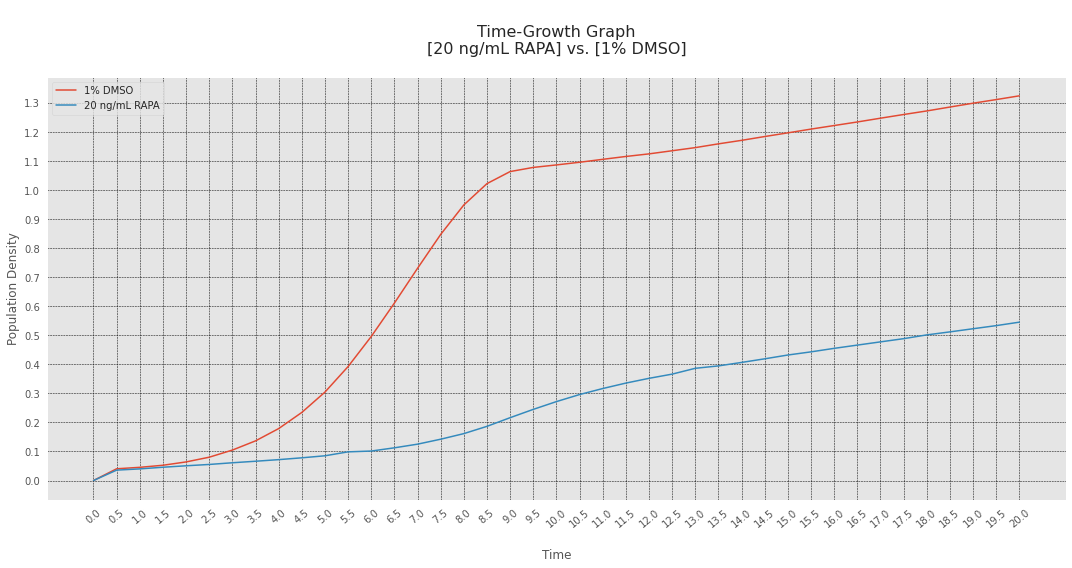

In [210]:
TimeGraph_treatment_vehicle(row=3)
plt.show()

> ### Analysis

In [211]:
RAPA2_1_DMSO1_percent, RAPA2_1_mult = percentage(index=3, strain=strains[0])
RAPA2_2_DMSO1_percent, RAPA2_2_mult = percentage(index=3, strain=strains[0], dt_type="DT interval")

print(black("\nDoubling time effect of 20 ng/mL Rapamycin", 'bold'), "\n\n-> " + str(RAPA2_1_DMSO1_percent) + " % increase in Doubling Time Inflection, meaning it has experienced " + str(RAPA2_1_mult) + " times growth its control counterpart.", 
      "\n-> " + str(RAPA2_2_DMSO1_percent) + " % increase in Doubling Time Interval, meaning it has experienced " + str(RAPA2_2_mult) + " times growth its control counterpart.")


Doubling time effect of 20 ng/mL Rapamycin 

-> 194.71 % increase in Doubling Time Inflection, meaning it has experienced 2.95 times growth its control counterpart. 
-> 483.37 % increase in Doubling Time Interval, meaning it has experienced 5.83 times growth its control counterpart.


* The time-growth plot shows that the group treated with **20 ng/mL Rapamycin** has undergone a slower overall `growth-rate` compared to its control group **1% DMSO**, which agrees with the assumption of treated groups (vehicles excluded) follow the same thread.

#### Time-Graph for **`1 uM Torin 1`** and its corresponding vehicle treatment **`2.5% DMSO`**.

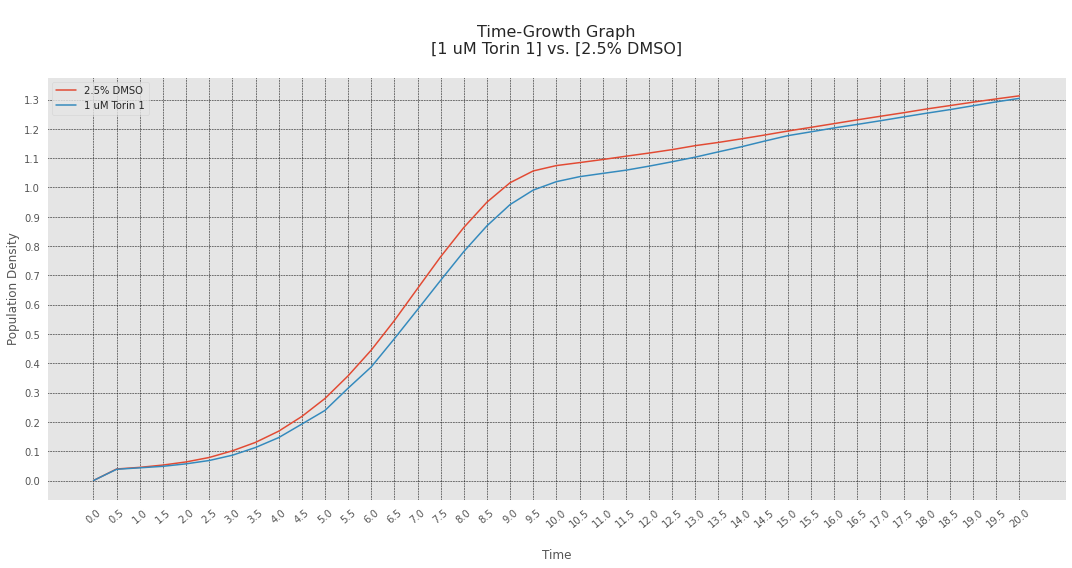

In [212]:
TimeGraph_treatment_vehicle(row=0)
plt.show()

> ### Analysis

In [213]:
TORIN1_1_DMSO2_percent, TORIN1_1_mult = percentage(index=0, strain=strains[0])
TORIN1_2_DMSO2_percent, TORIN1_2_mult = percentage(index=0, strain=strains[0], dt_type="DT interval")

print(black("\nDoubling time effect of 1 uM Torin 1", 'bold'), "\n\n-> " + str(TORIN1_1_DMSO2_percent) + " % increase in Doubling Time Inflection, meaning it has experienced " + str(TORIN1_1_mult) + " times growth its control counterpart.", 
      "\n-> " + str(TORIN1_2_DMSO2_percent) + " % increase in Doubling Time Interval, meaning it has experienced " + str(TORIN1_2_mult) + " times growth its control counterpart.")


Doubling time effect of 1 uM Torin 1 

-> -3.26 % increase in Doubling Time Inflection, meaning it has experienced 0.97 times growth its control counterpart. 
-> -1.73 % increase in Doubling Time Interval, meaning it has experienced 0.98 times growth its control counterpart.


* The time-growth plot shows that the group treated with **1 uM Torin 1** has undergone a faster overall `growth-rate` compared to its control group **2.5% DMSO**, which goes against the assumption of treated groups (vehicles excluded) follow the same thread.

#### Time-Graph for **`25 uM Torin 1`** and its corresponding vehicle treatment **`2.5% DMSO`**.

In [214]:
# TimeGraph_treatment_vehicle(row=6, treat="25 uM Torin 1", p_outliers=possible_outliers5_2)
# plt.show()

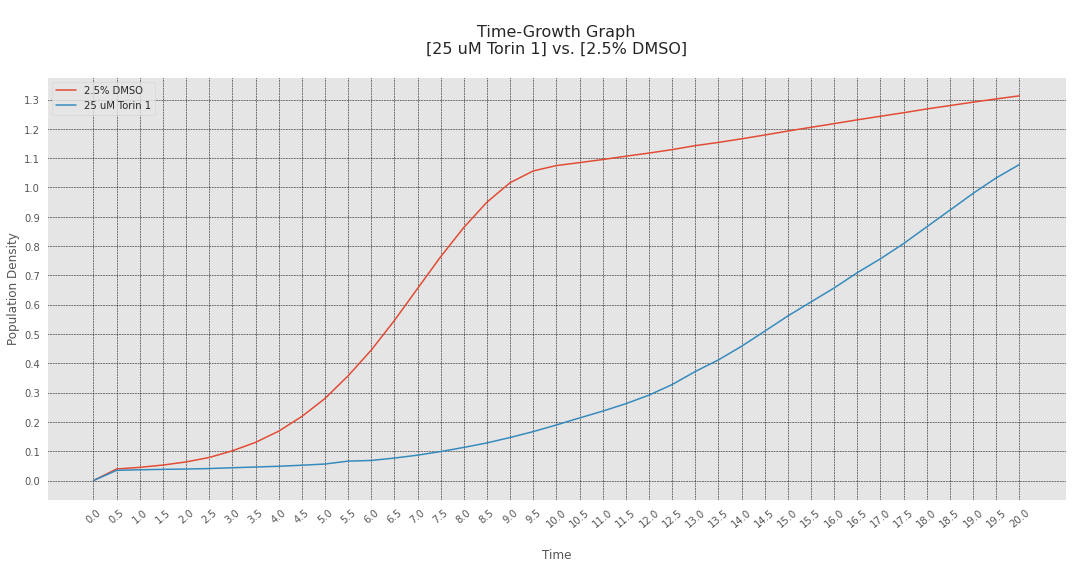

In [215]:
TimeGraph_treatment_vehicle(row=6)
plt.show()

> ### Analysis

In [216]:
TORIN2_1_DMSO2_percent, TORIN2_1_mult = percentage(index=6, strain=strains[0])
TORIN2_2_DMSO2_percent, TORIN2_2_mult = percentage(index=6, strain=strains[0], dt_type="DT interval")

print(black("\nDoubling time effect of 25 uM Torin 1", 'bold'), "\n\n-> " + str(TORIN2_1_DMSO2_percent) + " % increase in Doubling Time Inflection, meaning it has experienced " + str(TORIN2_1_mult) + " times growth its control counterpart.", 
      "\n-> " + str(TORIN2_2_DMSO2_percent) + " % increase in Doubling Time Interval, meaning it has experienced " + str(TORIN2_2_mult) + " times growth its control counterpart.")


Doubling time effect of 25 uM Torin 1 

-> 27.9 % increase in Doubling Time Inflection, meaning it has experienced 1.28 times growth its control counterpart. 
-> 31.41 % increase in Doubling Time Interval, meaning it has experienced 1.31 times growth its control counterpart.


* The time-growth plot shows that the group treated with **25 uM Torin 1** has undergone a slower overall `growth-rate` compared to its control group **2.5% DMSO**, which agrees with the assumption of treated groups (vehicles excluded) follow the same thread.

In [217]:
avg_control

Biological Replicates  DT inflection  StDev_inf  \
1 uM Torin 1                         14      74.964907   2.562885   
2.5% DMSO                            36      77.491354   2.176891   
1% DMSO                              19      72.730884   2.158362   
20 ng/mL RAPA                         7     214.342431  13.165233   
2.5 ng/mL RAPA                       12      70.797585   1.999423   
6.67% H2O                            14      74.711882   1.752628   
25 uM Torin 1                        11      99.108238   5.951806   
100 uM GDC0941                        8      80.136357   3.392595   
1 mg/mL Caffeine                     13      99.813142   3.543731   
100 uM AZD8055                        2      79.755739   0.962467   

                  DT interval  StDev_int  Time_0  Time_0.5    Time_1  \
1 uM Torin 1        81.395119   4.154267     0.0  0.038381  0.043333   
2.5% DMSO           82.826506   1.792261     0.0  0.039380  0.044917   
1% DMSO             76.765604   2.192335     0.0  0.040421  0.045404   
20 ng/mL RAPA      447.826486  40.543438     0.0  0.035762  0.040000   
2.5 ng/mL RAPA     148.523832  63.860668     0.0  0.039194  0.043389   
6.67% H2O           79.077668   1.926197     0.0  0.050643  0.055095   
25 uM Torin 1      108.846073   9.358162     0.0  0.034697  0.036697   
100 uM GDC0941      84.269401   0.783792     0.0  0.047250  0.056708   
1 mg/mL Caffeine   109.112716   3.654306     0.0  0.044026  0.046436   
100 uM AZD8055      83.462798   1.401724     0.0  0.044167  0.046667   

                  Time_1.5    Time_2  Time_2.5    Time_3  Time_3.5    Time_4  \
1 uM Torin 1      0.048500  0.056929  0.068310  0.086310  0.112643  0.146405   
2.5% DMSO         0.052759  0.063444  0.078620  0.101343  0.130157  0.168343   
1% DMSO           0.052526  0.063982  0.080246  0.104719  0.136404  0.178649   
20 ng/mL RAPA     0.045714  0.050714  0.055286  0.061095  0.066333  0.071857   
2.5 ng/mL RAPA    0.049333  0.053611  0.074639  0.097333  0.126722  0.166472   
6.67% H2O         0.065381  0.079476  0.099476  0.127762  0.165190  0.215452   
25 uM Torin 1     0.038091  0.039212  0.040818  0.043606  0.046061  0.048636   
100 uM GDC0941    0.063583  0.071875  0.086458  0.107083  0.135708  0.169083   
1 mg/mL Caffeine  0.048667  0.051308  0.058359  0.065462  0.073897  0.088590   
100 uM AZD8055    0.051000  0.057333  0.069000  0.085833  0.105667  0.135500   

                  Time_4.5    Time_5  Time_5.5    Time_6  Time_6.5    Time_7  \
1 uM Torin 1      0.192500  0.239071  0.315024  0.387571  0.483929  0.583119   
2.5% DMSO         0.218444  0.279806  0.357204  0.444889  0.545926  0.655111   
1% DMSO           0.234211  0.304228  0.392123  0.495491  0.610404  0.730053   
20 ng/mL RAPA     0.078143  0.085095  0.098619  0.101429  0.112524  0.125095   
2.5 ng/mL RAPA    0.219556  0.286472  0.370500  0.465528  0.586611  0.708333   
6.67% H2O         0.280476  0.359143  0.455167  0.563810  0.679095  0.794548   
25 uM Torin 1     0.052212  0.056303  0.066212  0.068455  0.076606  0.086515   
100 uM GDC0941    0.216375  0.278417  0.354458  0.445708  0.552000  0.670958   
1 mg/mL Caffeine  0.106231  0.127718  0.154103  0.187205  0.226077  0.274487   
100 uM AZD8055    0.174500  0.222833  0.287333  0.366000  0.459667  0.569333   

                  Time_7.5    Time_8  Time_8.5    Time_9  Time_9.5   Time_10  \
1 uM Torin 1      0.683238  0.781310  0.869071  0.941619  0.991000  1.019714   
2.5% DMSO         0.763648  0.863426  0.949815  1.016139  1.056352  1.074593   
1% DMSO           0.846649  0.948035  1.021491  1.062930  1.077228  1.085772   
20 ng/mL RAPA     0.142143  0.161381  0.186381  0.216190  0.244762  0.271524   
2.5 ng/mL RAPA    0.822556  0.937556  1.027389  1.087833  1.115028  1.128667   
6.67% H2O         0.899000  0.979214  1.029262  1.051643  1.063238  1.072619   
25 uM Torin 1     0.098879  0.112970  0.128273  0.146848  0.166909  0.189515   
100 uM GDC0941    0.784625  0.881458  0.970625  1.045250  1.100

#### Change in DMSO Concentration

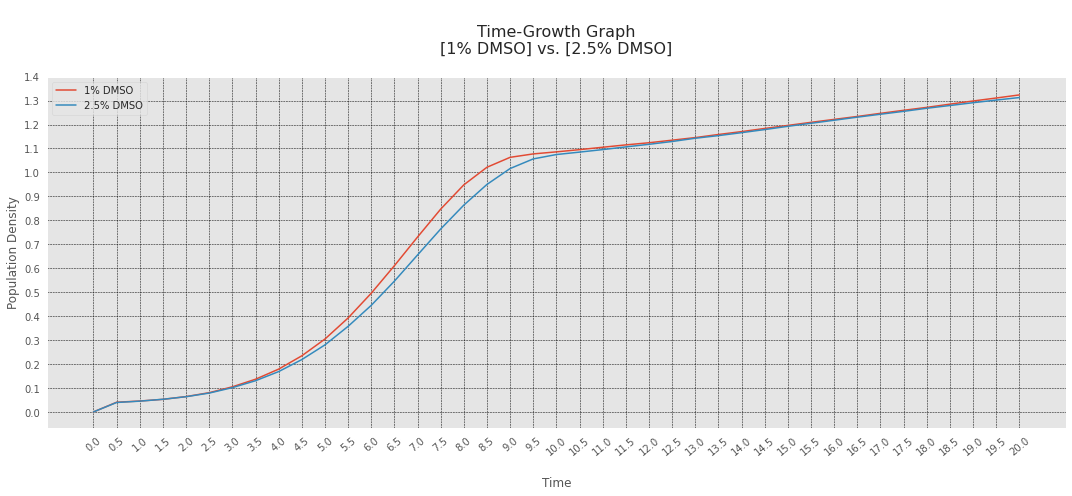

In [218]:
time_graph_DMSO(strain=strains[0])
plt.show()

> #### **Observation**

The graphical representation of the time-growth curve shows that a treatment solution of **1% DMSO** exhibits a higher overall growth-rate than a treatment of **2.5% DMSO**. It should also be noted that the addition of more **DMSO** brings about an increase in the doubling time inflection.

#### Plotting For BY4743's Doubling Time Inflection Values For Each Treatment

In [219]:
treatments

['1 uM Torin 1',
 '2.5% DMSO',
 '1% DMSO',
 '20 ng/mL RAPA',
 '2.5 ng/mL RAPA',
 '6.67% H2O',
 '25 uM Torin 1',
 '100 uM GDC0941',
 '1 mg/mL Caffeine',
 '100 uM AZD8055']

In [220]:
avg_data = [Torin1_control, DMSO2_control, DMSO1_control, RAPA2_control, RAPA1_control, H2O_control, Torin2_control, GDC0941_control, Caffeine_control, AZD8055_control]

In [221]:
dt_inflection = [list(i["DT inflection"]) for i in avg_data]
dt_interval = [list(i["DT interval"]) for i in avg_data]

In [222]:
dt_inflection[3]

[260.0471278,
 317.0612214,
 246.9491257,
 66.28004822,
 103.6058719,
 234.1072087,
 272.346412]

In [223]:
dt_interval[3]

[470.2585781,
 540.8609142,
 425.9586629,
 67.47476893,
 660.4065874,
 435.3557519,
 534.4701398]

In [224]:
def box_scatter_plot(dt_type='DT inflection', strain=strains[0]):
    
    avg_data = [Torin1_control, DMSO2_control, DMSO1_control, RAPA2_control, RAPA1_control, H2O_control, Torin2_control, GDC0941_control, Caffeine_control, AZD8055_control]
    data = [list(i[dt_type]) for i in avg_data]
    
    fig, ax = plt.subplots(figsize=(25,25))

    flier = dict(markerfacecolor='red', marker='D')
    mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

    g = sns.boxplot(data=data, 
                    width=.7,
                    # notch='True',
                    flierprops=flier,
                    showmeans=True,
                    meanprops=mean_shape)
        
    xvalues = treatments
    plt.xticks(np.arange(10), xvalues, rotation=40)
    # plt.yticks(np.arange(0,900,5))#(0,340,5))

    # Setting Title
    plt.title((dt_type + " Distribution for " + strain), fontsize=16)
    
    # X and Y axes labels
    ax.set_xlabel("Treatments", fontsize=14)
    ax.set_ylabel("Doubling Time\n(Minutes/cell division)", fontsize=14)

    # Set colors for the box plots
    palette = ['#FFA500', '#60d147', '#60d147', "#d35de3", "#d35de3", '#B7C3D0', '#FFA500', '#B7C3D0', '#B7C3D0', '#B7C3D0']
    color_dict = dict(zip(xvalues, palette))
    for i in range(0,10):
        mybox = g.patches[i]
        mybox.set_facecolor(color_dict[xvalues[i]])
        ax.scatter([i+0.1]*len(data[i]),data[i], color='black')

    # Mini text showing mean, maximum and mininum values for the doubling time inflection
    locs = [-0.25, 0.76, 1.75, 2.68, 3.77, 4.75, 5.68, 6.8, 7.8, 8.8]

    for j in range(10):
        mean = round(np.mean(data[j]), 1)
        dt_inf_max = round(max(data[j]), 1)
        dt_inf_min = round(min(data[j]), 1)
        textstr = "$\overline {DT}$" + f" = {mean} \nmaxDT = {dt_inf_max} \nminDT = {dt_inf_min}"
        props = dict(boxstyle='round', facecolor=palette[j], alpha=.2)
        g.text(locs[j], 10, textstr, fontsize=14, bbox=props)
        
    # Remove spines
    sns.despine(top=True, right=True, left=True, bottom=False)
    
    plt.tight_layout()

    return ax

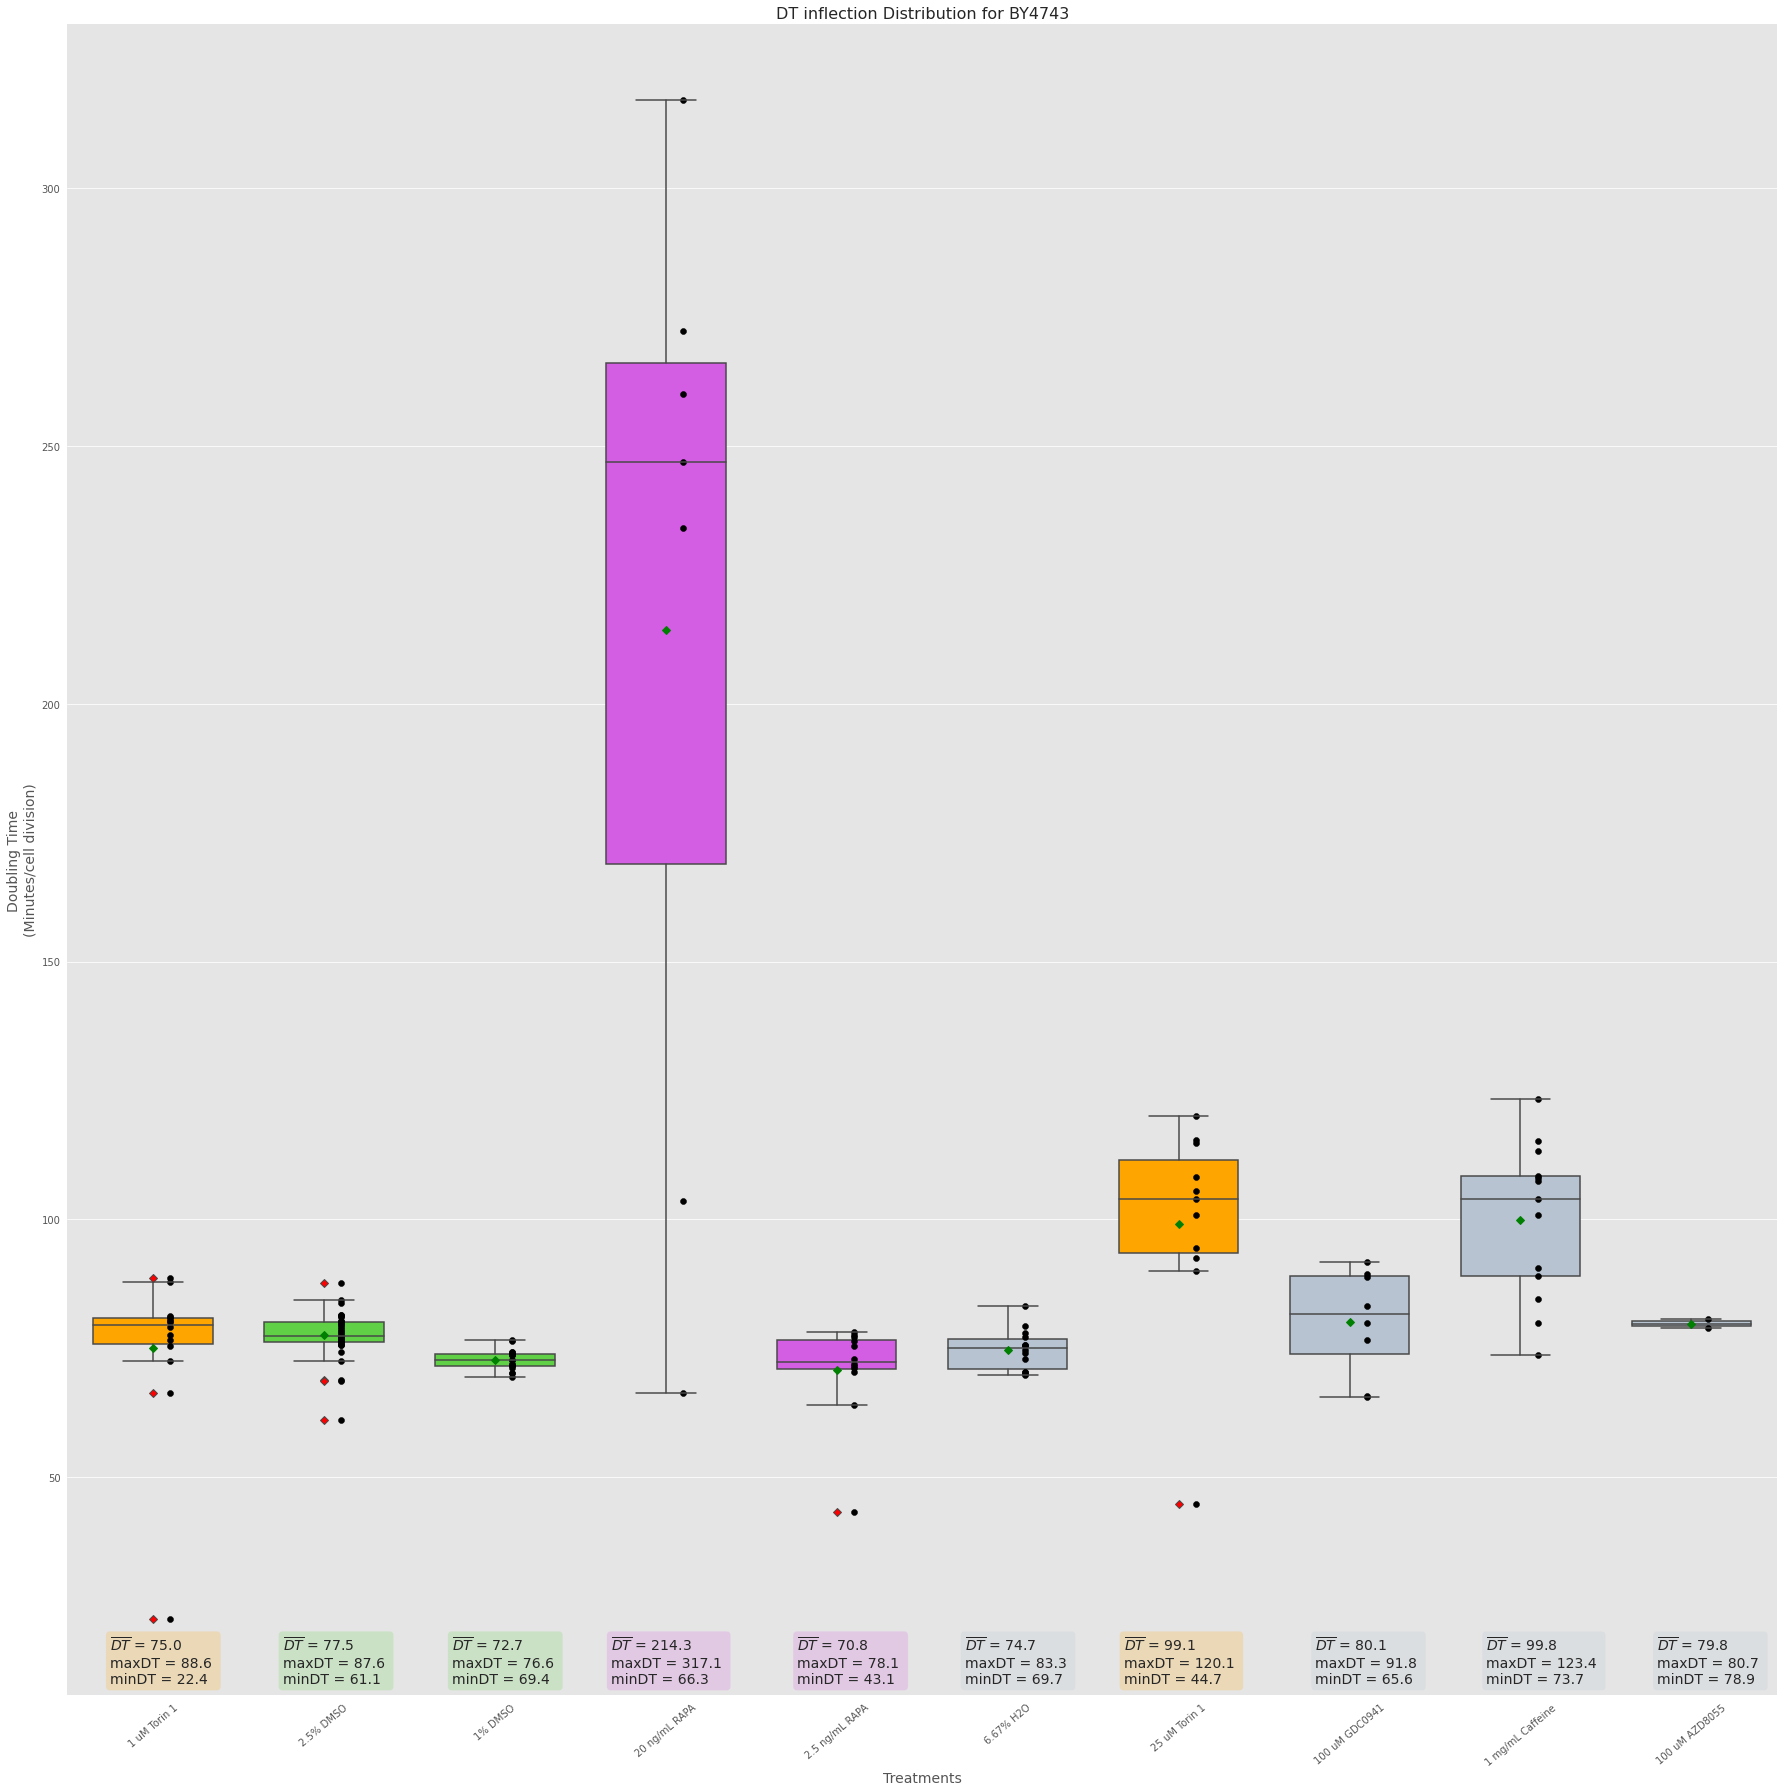

In [225]:
box_scatter_plot('DT inflection')
plt.show()

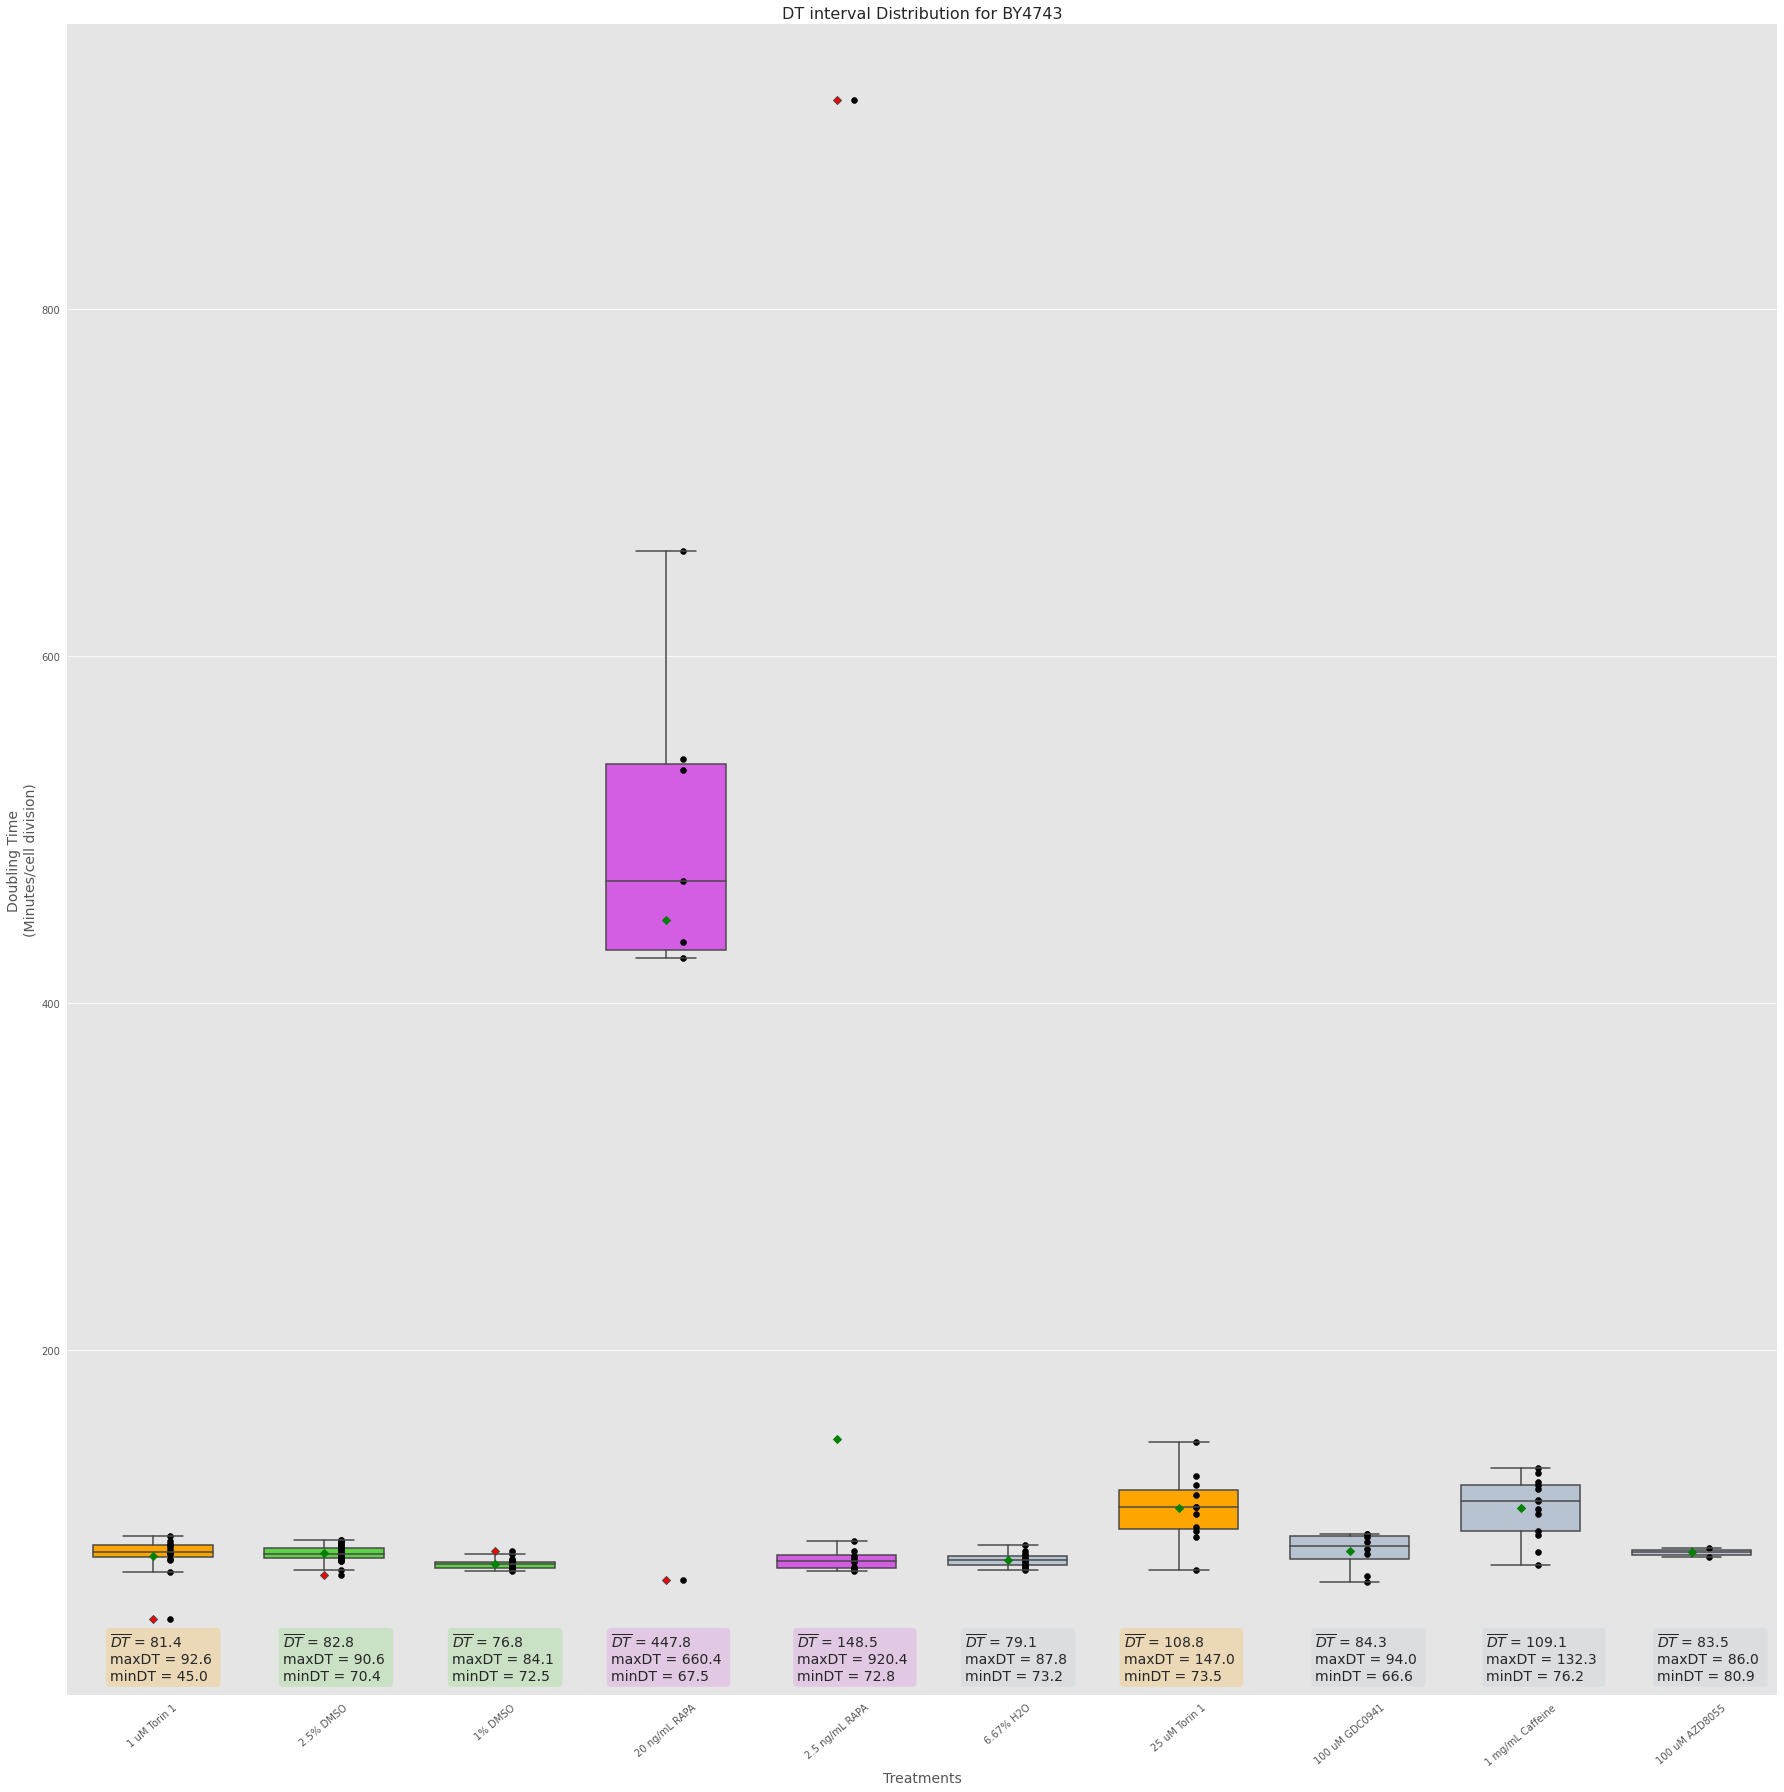

In [226]:
box_scatter_plot(dt_type="DT interval")
plt.show()

### **Biological Replicates Distribution of Treatments per Strain**

In [227]:
avg_control

Biological Replicates  DT inflection  StDev_inf  \
1 uM Torin 1                         14      74.964907   2.562885   
2.5% DMSO                            36      77.491354   2.176891   
1% DMSO                              19      72.730884   2.158362   
20 ng/mL RAPA                         7     214.342431  13.165233   
2.5 ng/mL RAPA                       12      70.797585   1.999423   
6.67% H2O                            14      74.711882   1.752628   
25 uM Torin 1                        11      99.108238   5.951806   
100 uM GDC0941                        8      80.136357   3.392595   
1 mg/mL Caffeine                     13      99.813142   3.543731   
100 uM AZD8055                        2      79.755739   0.962467   

                  DT interval  StDev_int  Time_0  Time_0.5    Time_1  \
1 uM Torin 1        81.395119   4.154267     0.0  0.038381  0.043333   
2.5% DMSO           82.826506   1.792261     0.0  0.039380  0.044917   
1% DMSO             76.765604   2.192335     0.0  0.040421  0.045404   
20 ng/mL RAPA      447.826486  40.543438     0.0  0.035762  0.040000   
2.5 ng/mL RAPA     148.523832  63.860668     0.0  0.039194  0.043389   
6.67% H2O           79.077668   1.926197     0.0  0.050643  0.055095   
25 uM Torin 1      108.846073   9.358162     0.0  0.034697  0.036697   
100 uM GDC0941      84.269401   0.783792     0.0  0.047250  0.056708   
1 mg/mL Caffeine   109.112716   3.654306     0.0  0.044026  0.046436   
100 uM AZD8055      83.462798   1.401724     0.0  0.044167  0.046667   

                  Time_1.5    Time_2  Time_2.5    Time_3  Time_3.5    Time_4  \
1 uM Torin 1      0.048500  0.056929  0.068310  0.086310  0.112643  0.146405   
2.5% DMSO         0.052759  0.063444  0.078620  0.101343  0.130157  0.168343   
1% DMSO           0.052526  0.063982  0.080246  0.104719  0.136404  0.178649   
20 ng/mL RAPA     0.045714  0.050714  0.055286  0.061095  0.066333  0.071857   
2.5 ng/mL RAPA    0.049333  0.053611  0.074639  0.097333  0.126722  0.166472   
6.67% H2O         0.065381  0.079476  0.099476  0.127762  0.165190  0.215452   
25 uM Torin 1     0.038091  0.039212  0.040818  0.043606  0.046061  0.048636   
100 uM GDC0941    0.063583  0.071875  0.086458  0.107083  0.135708  0.169083   
1 mg/mL Caffeine  0.048667  0.051308  0.058359  0.065462  0.073897  0.088590   
100 uM AZD8055    0.051000  0.057333  0.069000  0.085833  0.105667  0.135500   

                  Time_4.5    Time_5  Time_5.5    Time_6  Time_6.5    Time_7  \
1 uM Torin 1      0.192500  0.239071  0.315024  0.387571  0.483929  0.583119   
2.5% DMSO         0.218444  0.279806  0.357204  0.444889  0.545926  0.655111   
1% DMSO           0.234211  0.304228  0.392123  0.495491  0.610404  0.730053   
20 ng/mL RAPA     0.078143  0.085095  0.098619  0.101429  0.112524  0.125095   
2.5 ng/mL RAPA    0.219556  0.286472  0.370500  0.465528  0.586611  0.708333   
6.67% H2O         0.280476  0.359143  0.455167  0.563810  0.679095  0.794548   
25 uM Torin 1     0.052212  0.056303  0.066212  0.068455  0.076606  0.086515   
100 uM GDC0941    0.216375  0.278417  0.354458  0.445708  0.552000  0.670958   
1 mg/mL Caffeine  0.106231  0.127718  0.154103  0.187205  0.226077  0.274487   
100 uM AZD8055    0.174500  0.222833  0.287333  0.366000  0.459667  0.569333   

                  Time_7.5    Time_8  Time_8.5    Time_9  Time_9.5   Time_10  \
1 uM Torin 1      0.683238  0.781310  0.869071  0.941619  0.991000  1.019714   
2.5% DMSO         0.763648  0.863426  0.949815  1.016139  1.056352  1.074593   
1% DMSO           0.846649  0.948035  1.021491  1.062930  1.077228  1.085772   
20 ng/mL RAPA     0.142143  0.161381  0.186381  0.216190  0.244762  0.271524   
2.5 ng/mL RAPA    0.822556  0.937556  1.027389  1.087833  1.115028  1.128667   
6.67% H2O         0.899000  0.979214  1.029262  1.051643  1.063238  1.072619   
25 uM Torin 1     0.098879  0.112970  0.128273  0.146848  0.166909  0.189515   
100 uM GDC0941    0.784625  0.881458  0.970625  1.045250  1.100

In [228]:
def bioRep_plot(strain=strains[0]):
        
    data = st_avg_data(path=t_path, strain=strain, feature_drop=True)
    data_k = list((data['Biological Replicates']).keys())
    data_v = list(data['Biological Replicates'])
    data = {data_k[r] : data_v[r] for r in range(len(data_v))}
    data = dict(sorted(data.items(), key=lambda item:item[1]))
    data_k = list(data.keys())
    data_v = list(data.values())
    
    cmap = plt.cm.Dark2
    norm = colors.Normalize(vmin=min(data_v), vmax=max(data_v))
    
    fig,ax = plt.subplots(figsize=(15,10))
    
    plt.bar(data_k, data_v, color=cmap(norm(data_v)), width=0.9, align='edge')
    plt.yticks(np.arange(min(data_v), max(data_v)+1), fontsize=12)
    plt.xticks(rotation=30, fontsize=12)
    
    ax.set_title(("\nBiological Replicate Distribution for " + strain + " Strain\n"), fontsize=18, fontweight='bold')
    ax.set_xlabel("\n\nTreatments", fontsize=16)
    ax.set_ylabel("Replicate Values\n", fontsize=16)
    
    for k, i in enumerate(ax.patches):
        val = data_v[k]
        
        plt.text((i.get_xy()[0] + .36), (val/2),
        val, fontsize=12, fontweight='bold',
        color ='white', rotation=0)
    
    plt.tight_layout()
    
    return ax

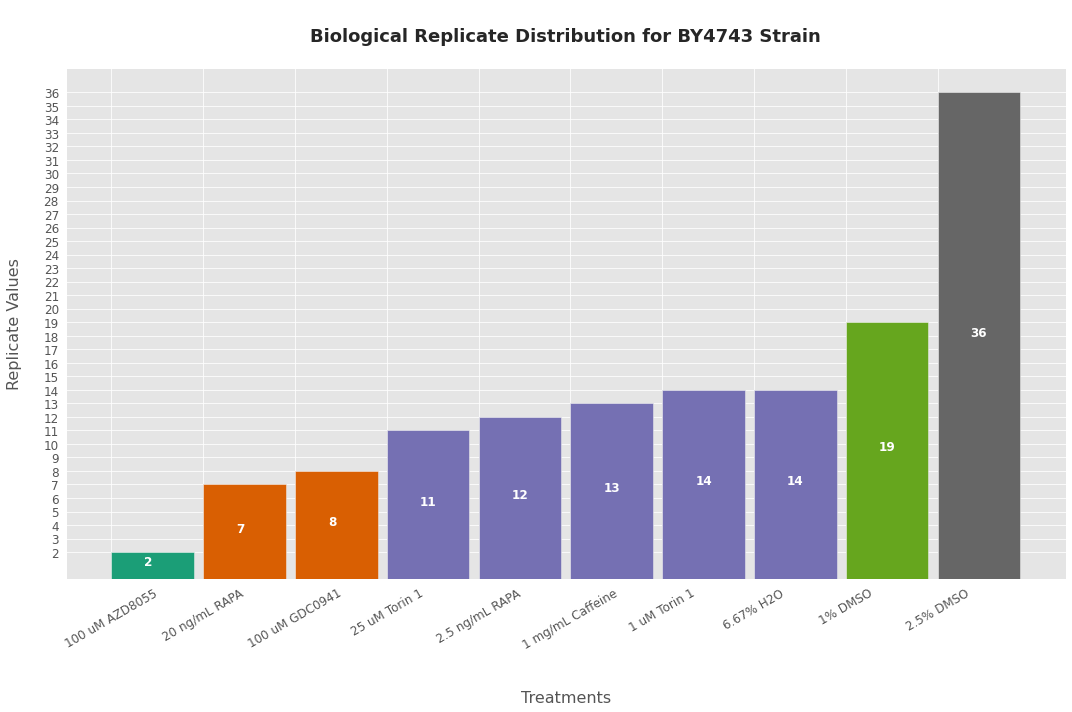

In [229]:
bioRep_plot(strain=strains[0])
plt.show()

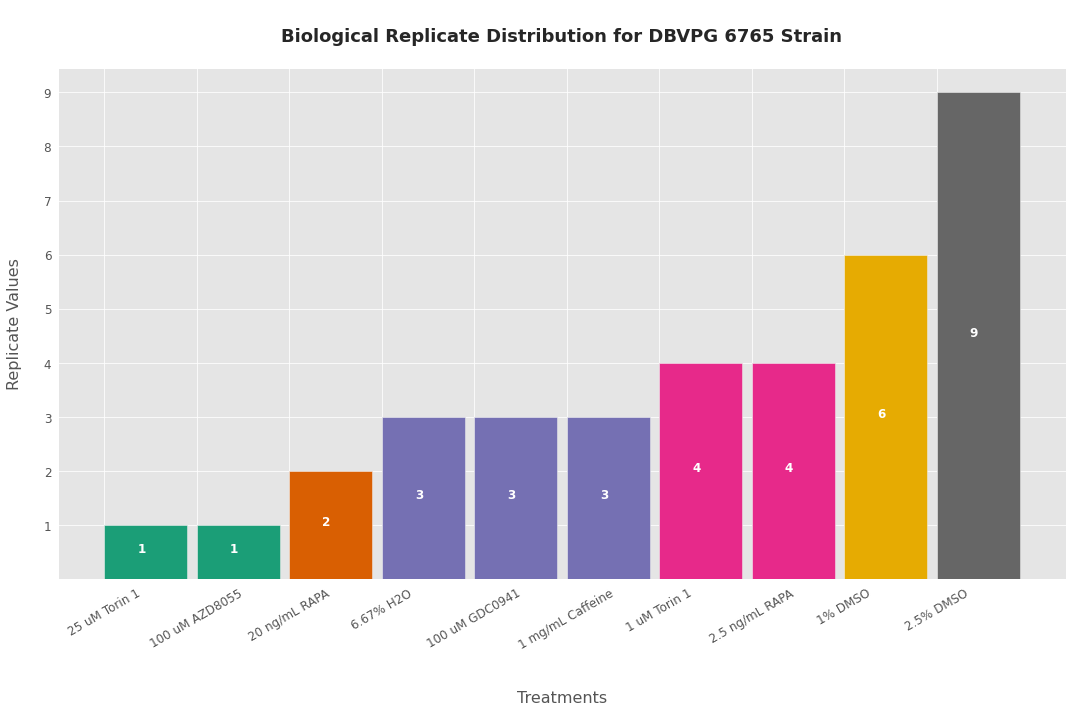

In [230]:
bioRep_plot(strain=strains[1])
plt.show()

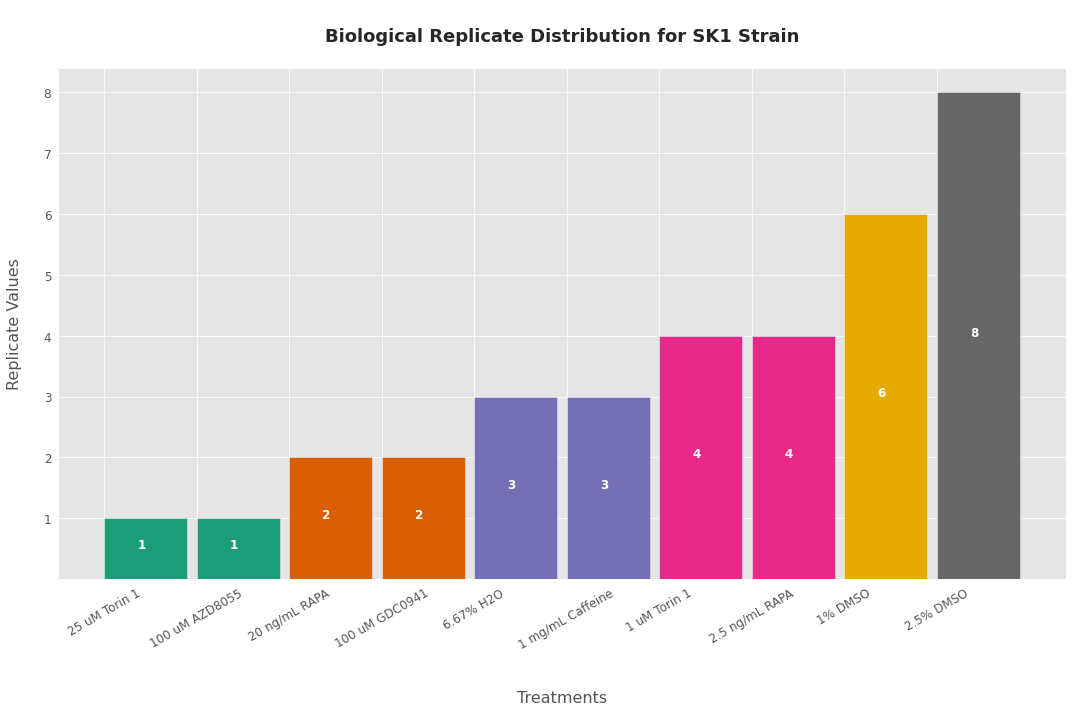

In [231]:
bioRep_plot(strain=strains[2])
plt.show()

### **Treatment Impact Analysis**

#### Strain Drug Sensitivity

In [232]:
t_treat = treatments[:1]+treatments[3:5]+treatments[6:]

In [233]:
dict_treat = {i : k for k, i in enumerate (treatments)}

In [234]:
dict_treat

{'1 uM Torin 1': 0,
 '2.5% DMSO': 1,
 '1% DMSO': 2,
 '20 ng/mL RAPA': 3,
 '2.5 ng/mL RAPA': 4,
 '6.67% H2O': 5,
 '25 uM Torin 1': 6,
 '100 uM GDC0941': 7,
 '1 mg/mL Caffeine': 8,
 '100 uM AZD8055': 9}

In [235]:
significance_ratio = 1.5

In [236]:
def mult_thresh(treatment, strain="BY4743", threshold=significance_ratio):
    
    if treatment not in treatments:
        return "Invalid Treatment!"
    
    data = st_avg_data(path=t_path, strain=strain, feature_drop=True)
    dict_treat = {i : k for k, i in enumerate (treatments)}
    
    _, mult_val = percentage(index=dict_treat[treatment], strain=strain)
    if mult_val >= threshold:
        return strain
    else:
        return None

#### Plotting for high and low treatment impact among strains

In [237]:
def HL_VennDiagram(t1, t2, figsize, threshold=significance_ratio):
    
    t1_strains1 = [i for i in strains if mult_thresh(treatment=t1, strain=i, threshold=significance_ratio) in strains]
    t2_strains1 = [i for i in strains if mult_thresh(treatment=t2, strain=i, threshold=significance_ratio) in strains]
    
    t1_t2_strains = list(set(t1_strains1) & set(t2_strains1))
    t1_strains = list(set(t1_strains1) - set(t2_strains1))
    t2_strains = list(set(t2_strains1) - set(t1_strains1))
    
    count = 0
    subset_1, subset_2, subset_12 = '', '', ''
    
    for i, j, k in zip_longest(t1_strains, t2_strains, t1_t2_strains):
        if i is not None:
            if count > 0 and (count % 3 == 0):
                subset_1 += ''.join(i+'\n\n')
            else:
                subset_1 += ''.join(i+',  ')
        if j is not None:
            if count > 0 and (count % 3 == 0):
                subset_2 += ''.join(j+'\n\n')
            else:
                subset_2 += ''.join(j+',  ')
        if k is not None:
            if count > 0 and (count % 3 == 0):
                subset_12 += ''.join(k+'\n\n')
            else:
                subset_12 += ''.join(k+',  ')
        count += 1
    
    subsets = [subset_1, subset_2, subset_12]
    set_labels=[t1, t2]
    
    fig, ax = plt.subplots(figsize=figsize)
    venn2(subsets=subsets, ax=ax, set_labels=tuple(set_labels), alpha=.76)
    ax.set_title(("\nStrains Impacted by [" + t1 + "] and [" + t2 + "]"), fontsize=24)
    
    return ax

#### Strains Impacted by **High Rapamycin** and **Low Rapamycin**

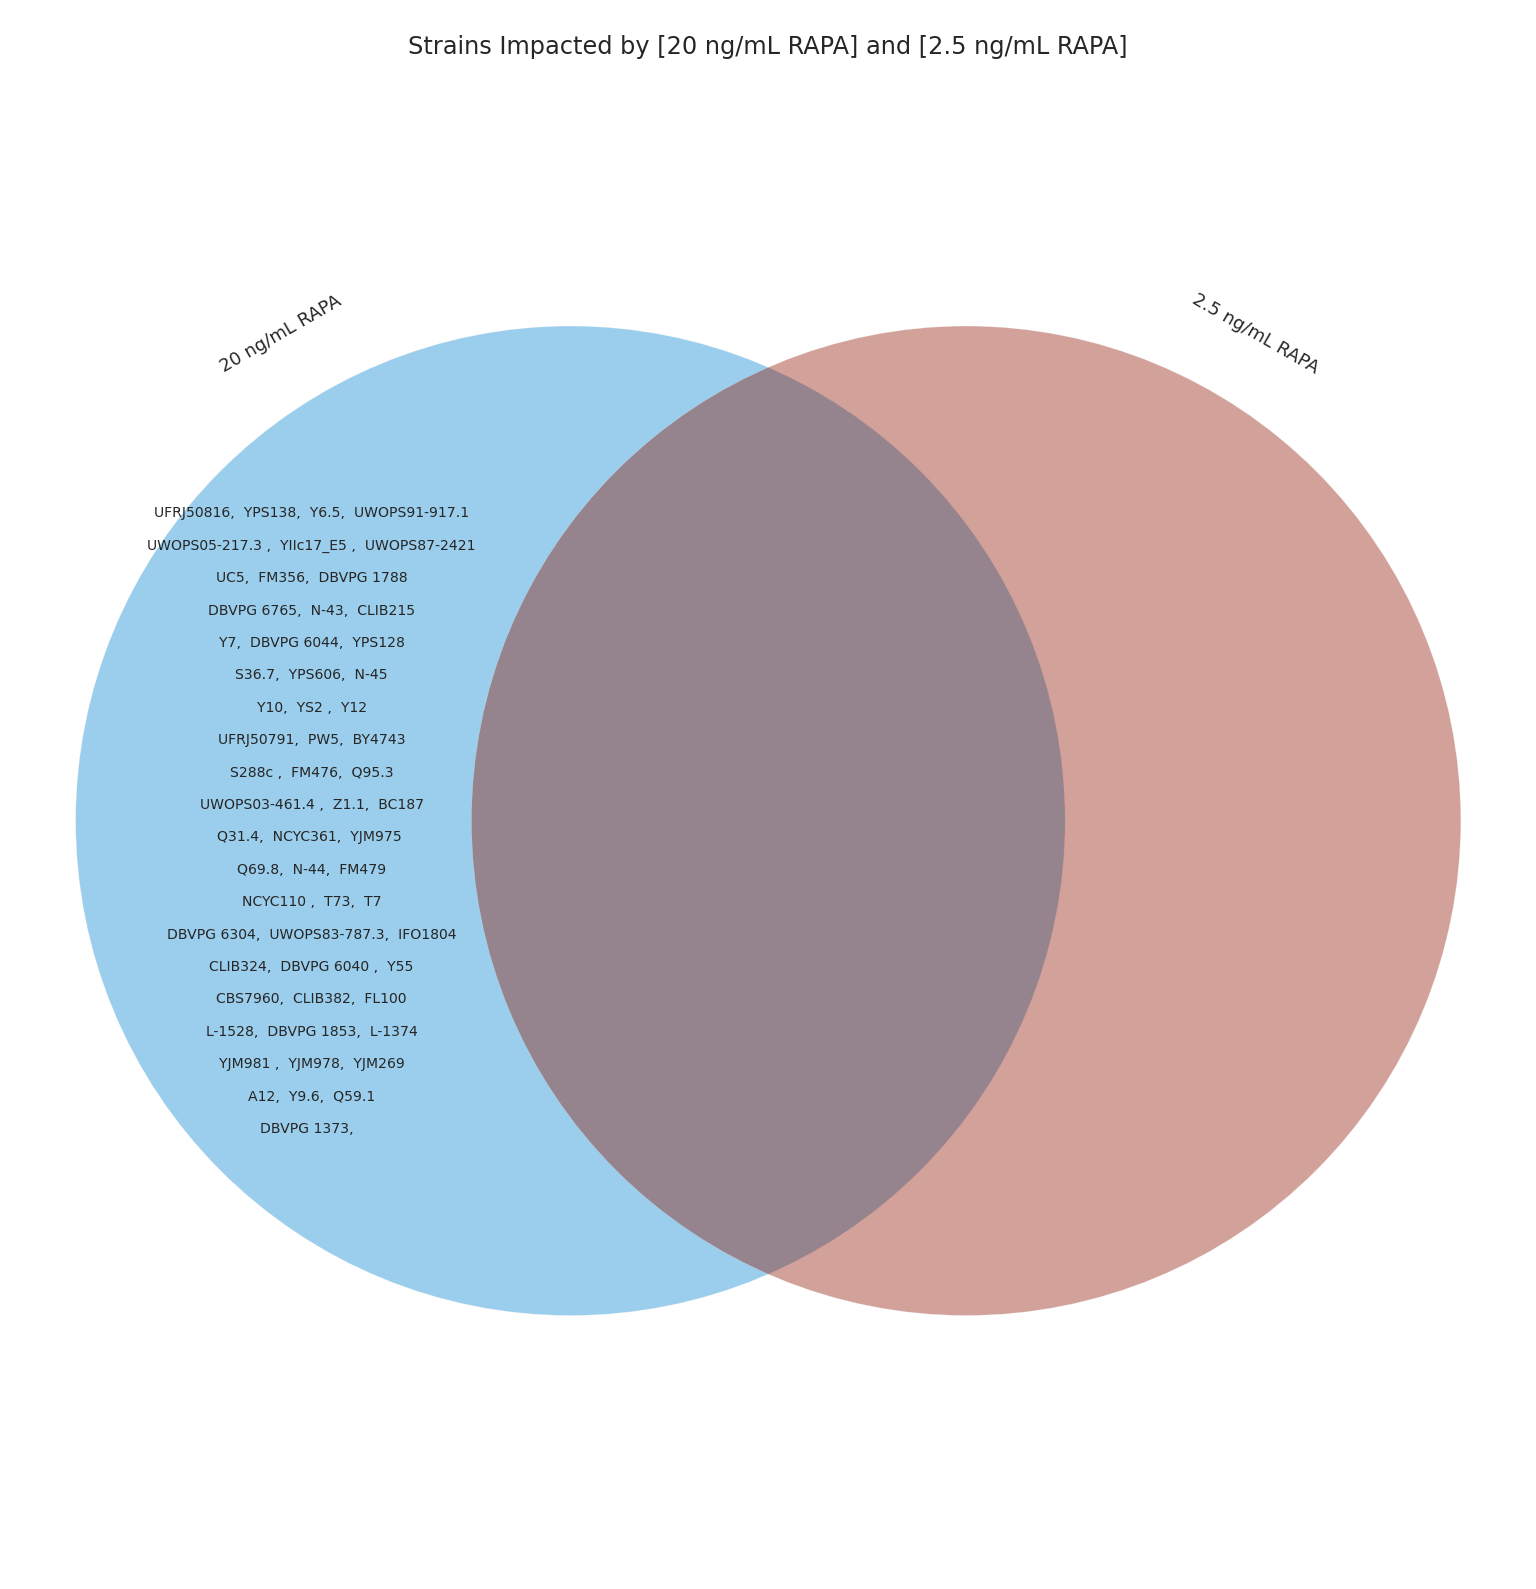

In [238]:
HL_VennDiagram(t1=treatments[3], t2=treatments[4], figsize=(28,28), threshold=significance_ratio)
plt.show()

#### Strain Impacted by **High Torin 1** and **Low Torin 1**

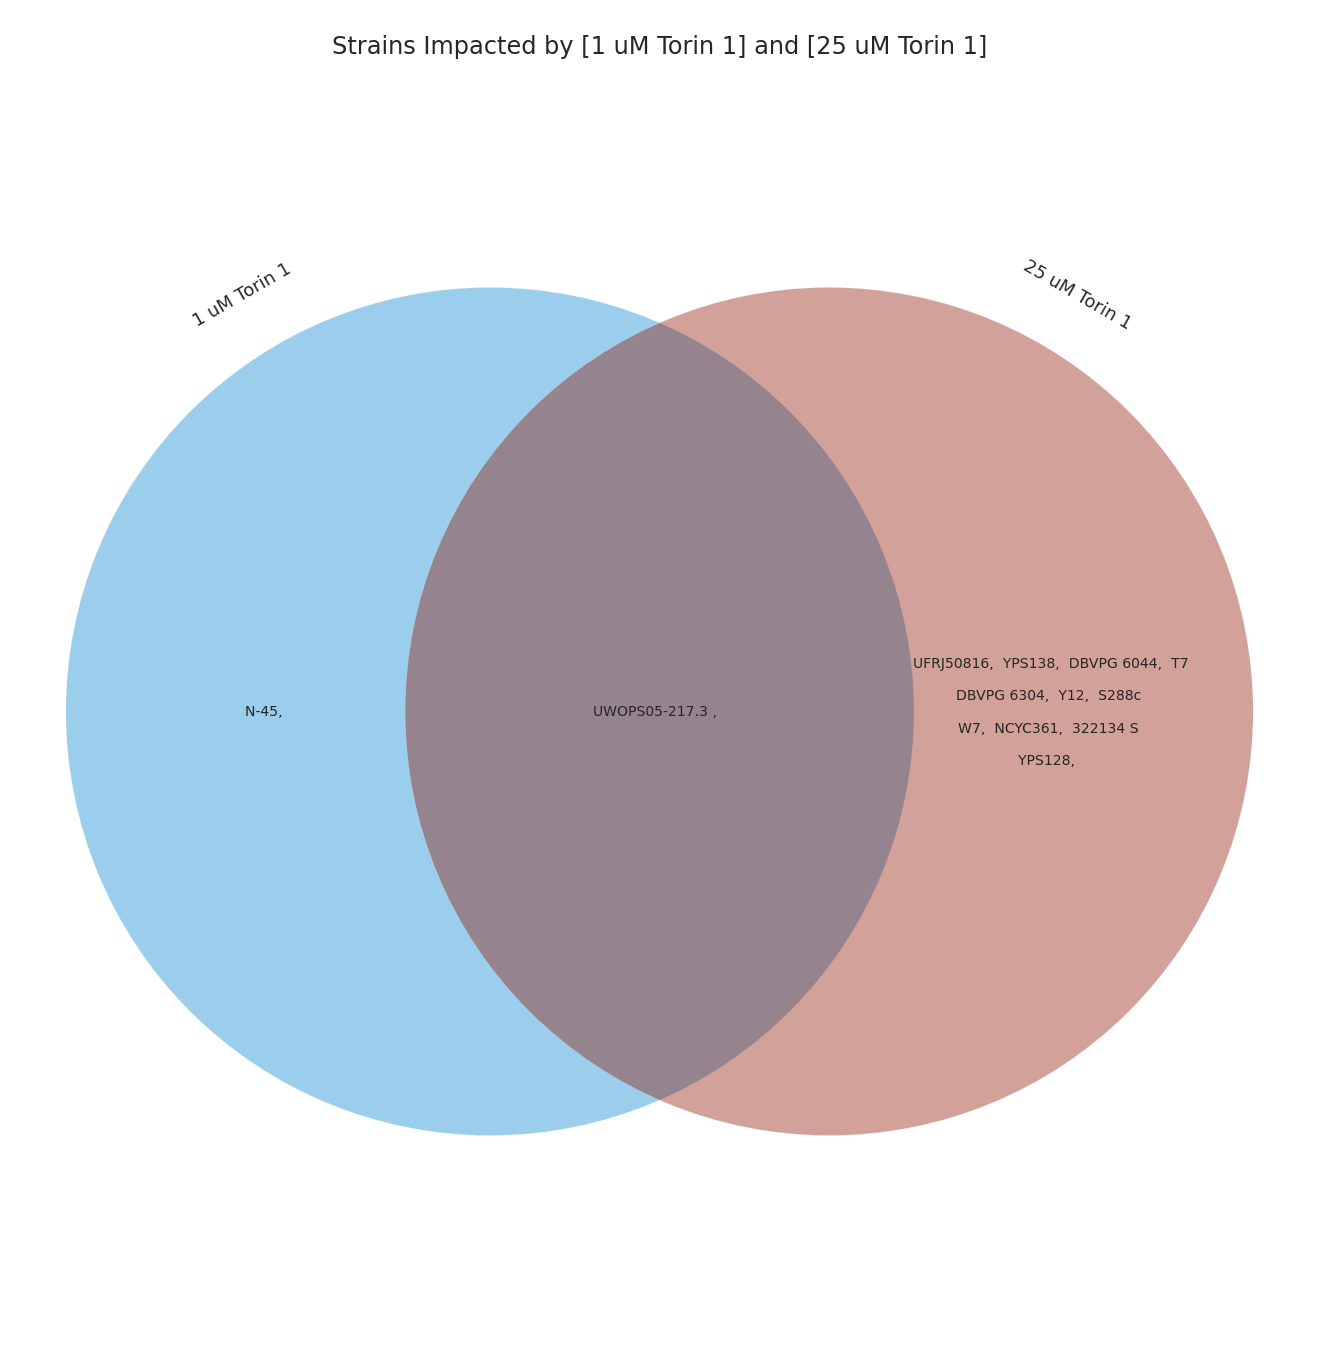

In [239]:
HL_VennDiagram(t1=treatments[0], t2=treatments[6], figsize=(24,24), threshold=significance_ratio)
plt.show()

#### Strains impacted by **High Rapamycin** and **High Torin 1**

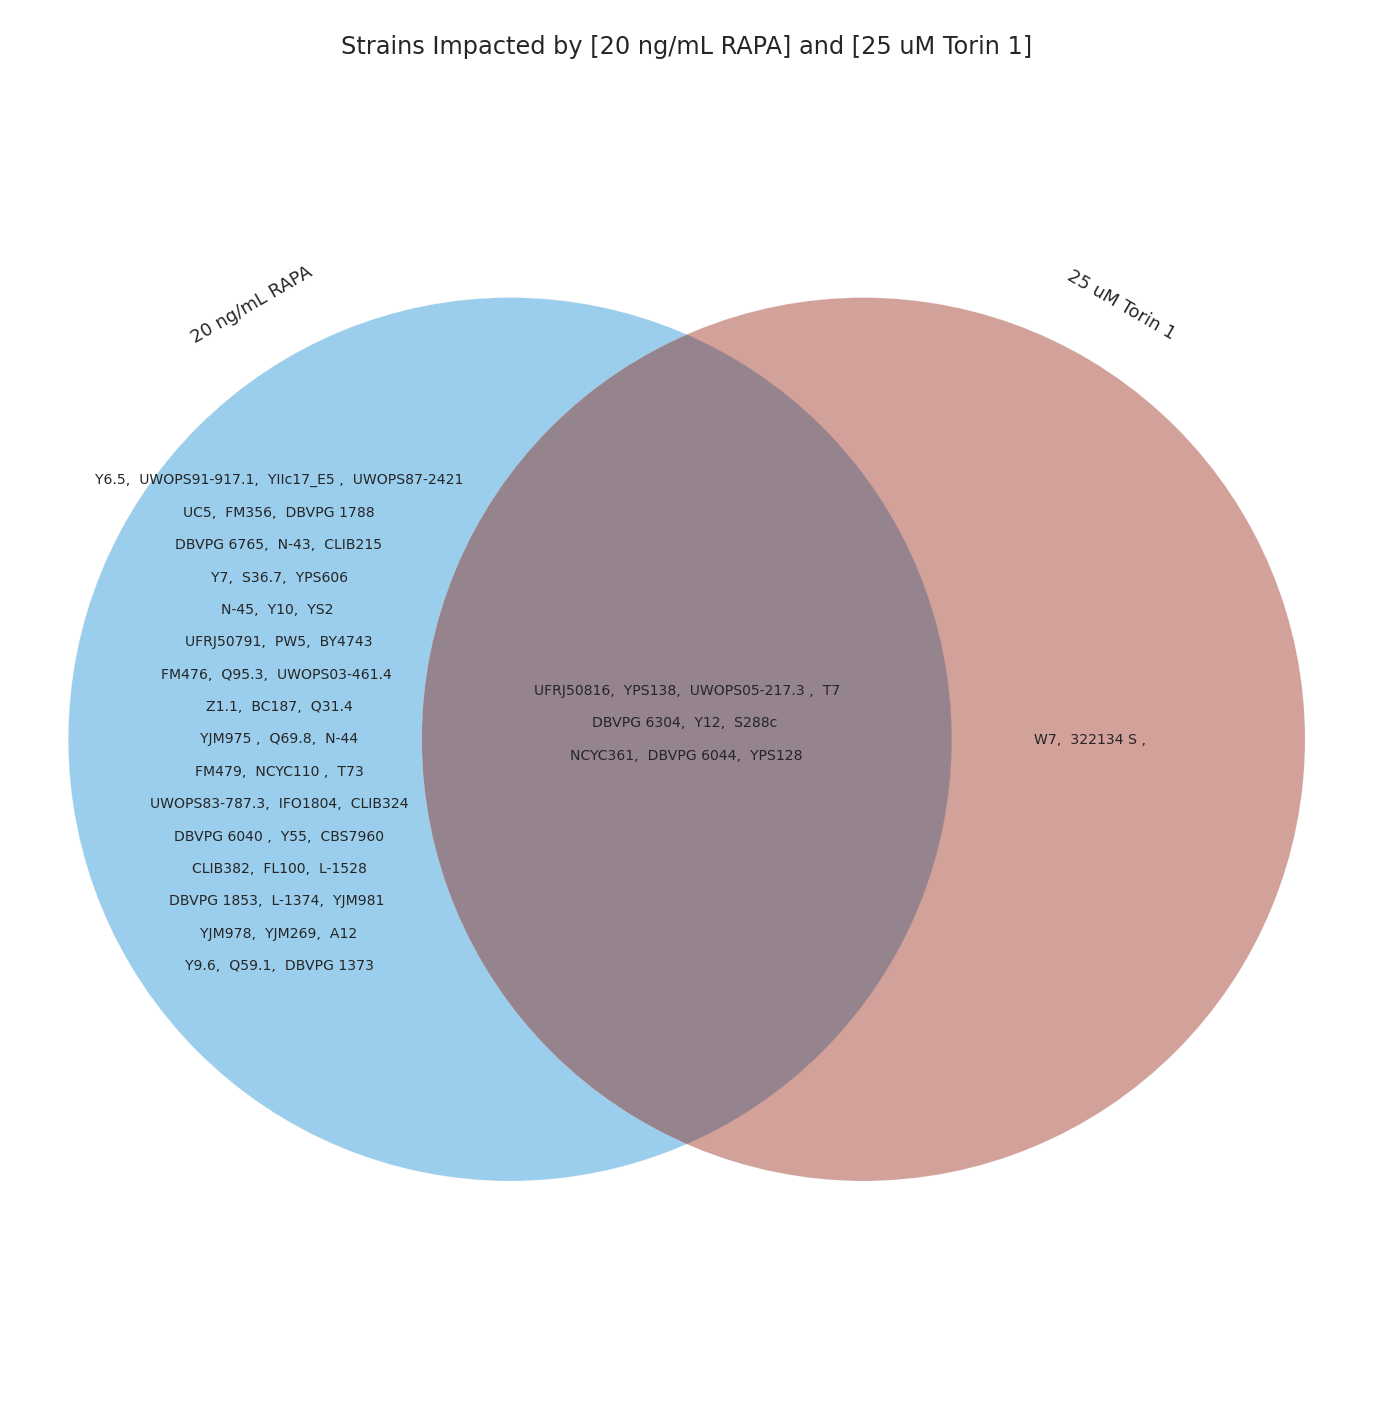

In [240]:
HL_VennDiagram(t1=treatments[3], t2=treatments[6], figsize=(25,25), threshold=significance_ratio)
plt.show()

#### Strains Impacted by **Low Rapamycin** and **Low Torin 1**

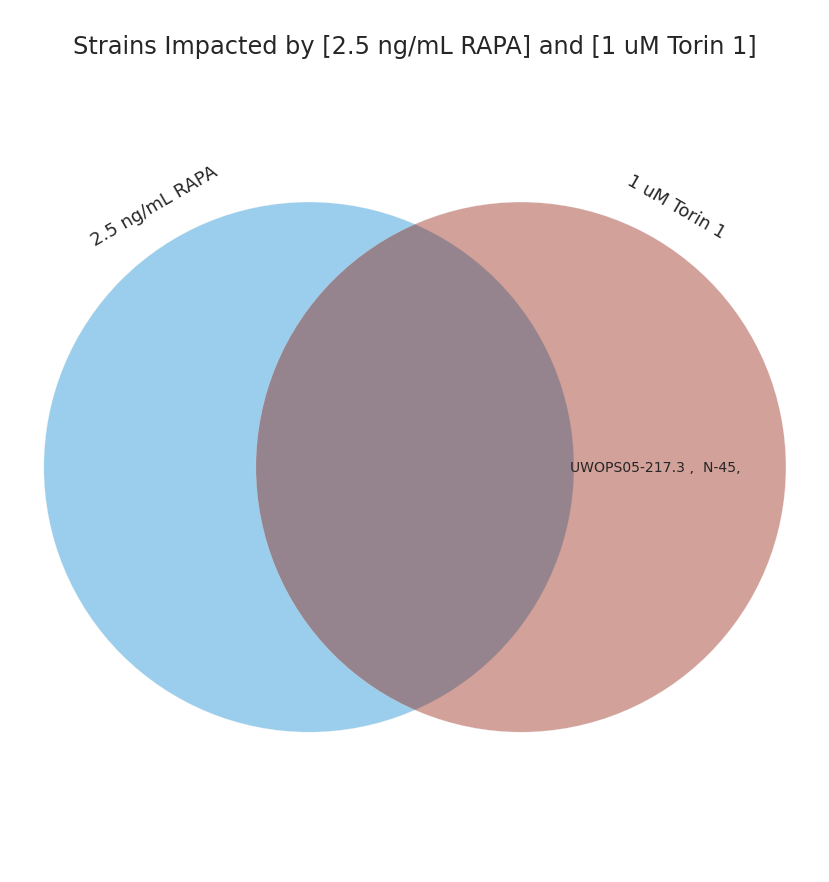

In [241]:
HL_VennDiagram(t1=treatments[4], t2=treatments[0], figsize=(15,15), threshold=significance_ratio)
plt.show()

#### Strains Impacted by **High Rapamycin** and **Low Torin 1**

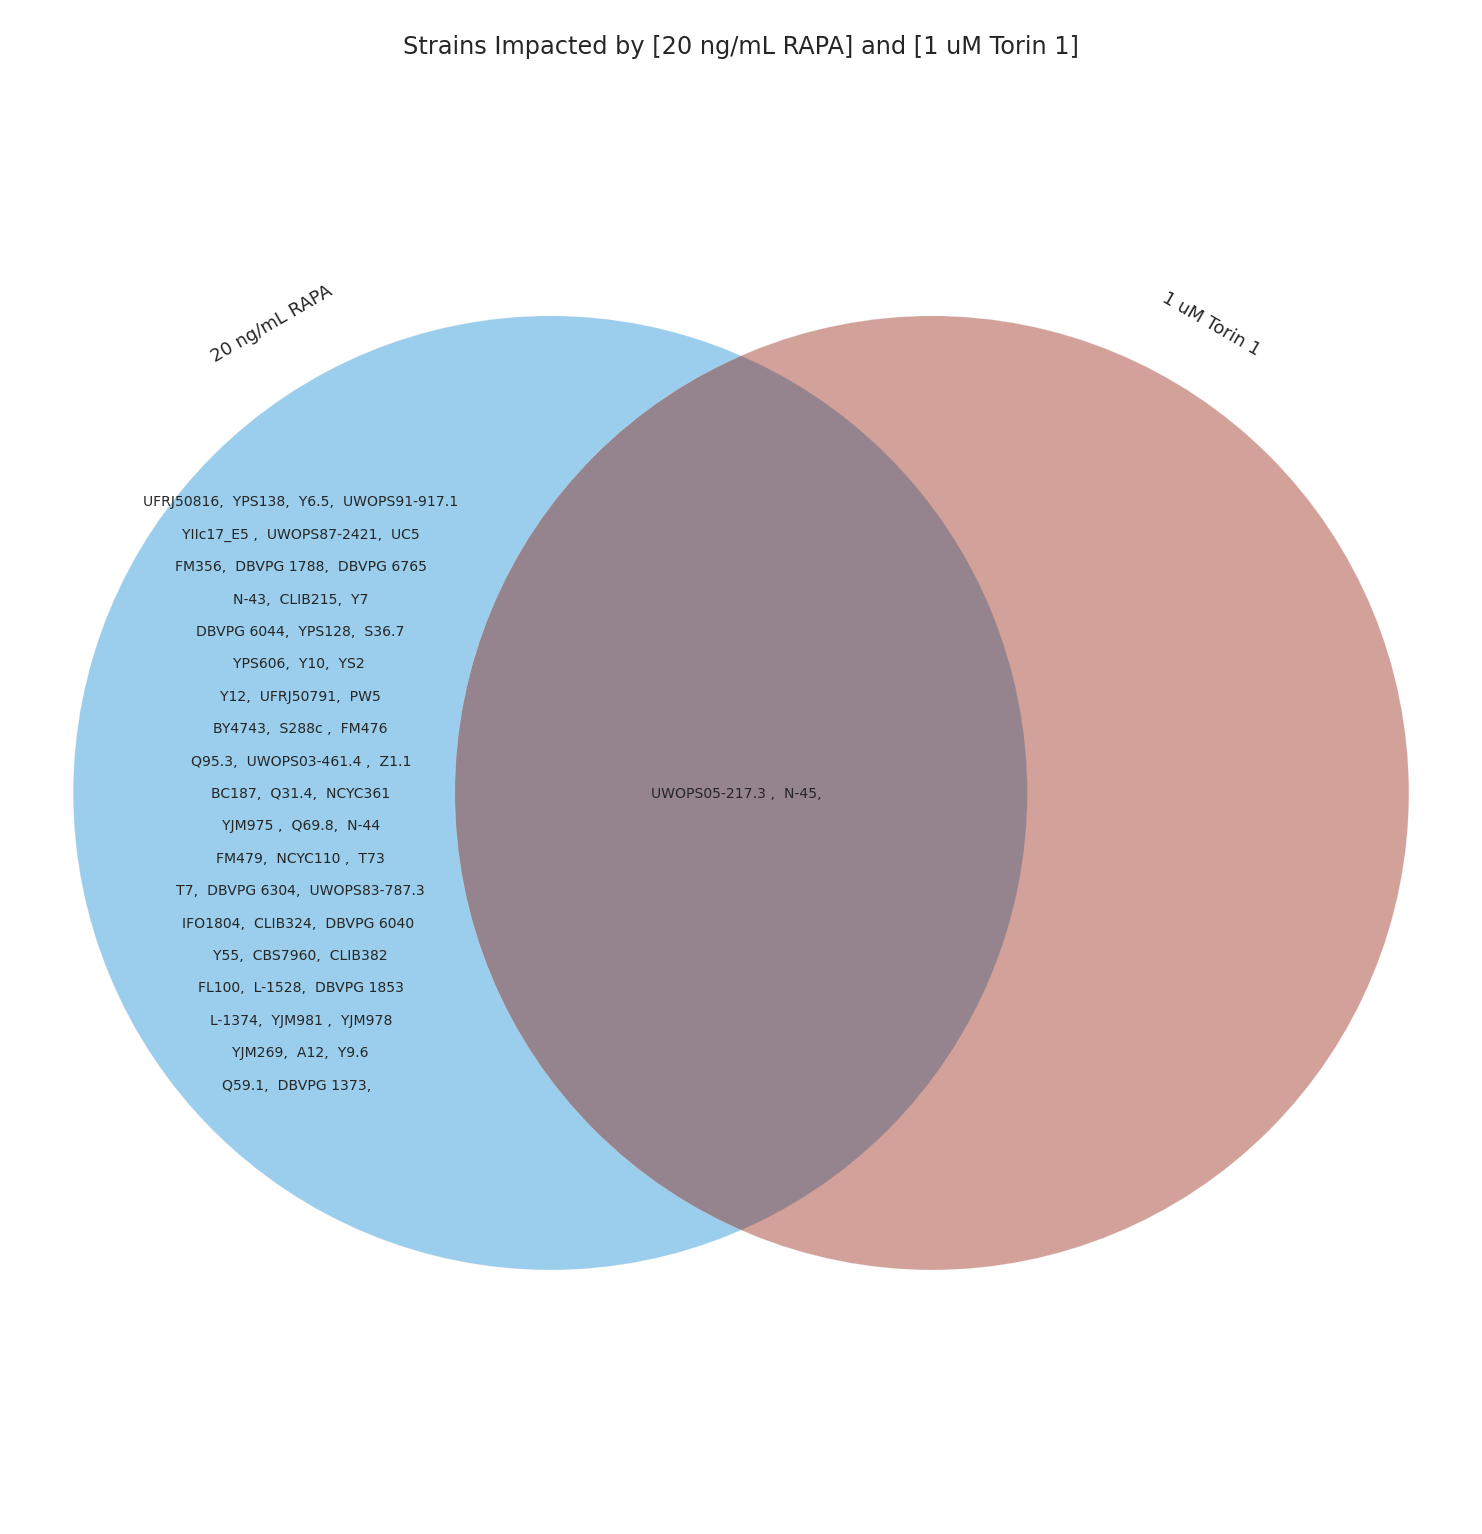

In [242]:
HL_VennDiagram(t1=treatments[3], t2=treatments[0], figsize=(27,27), threshold=significance_ratio)
plt.show()

#### Strains Impacted by **Low Rapamycin** and **High Torin 1**

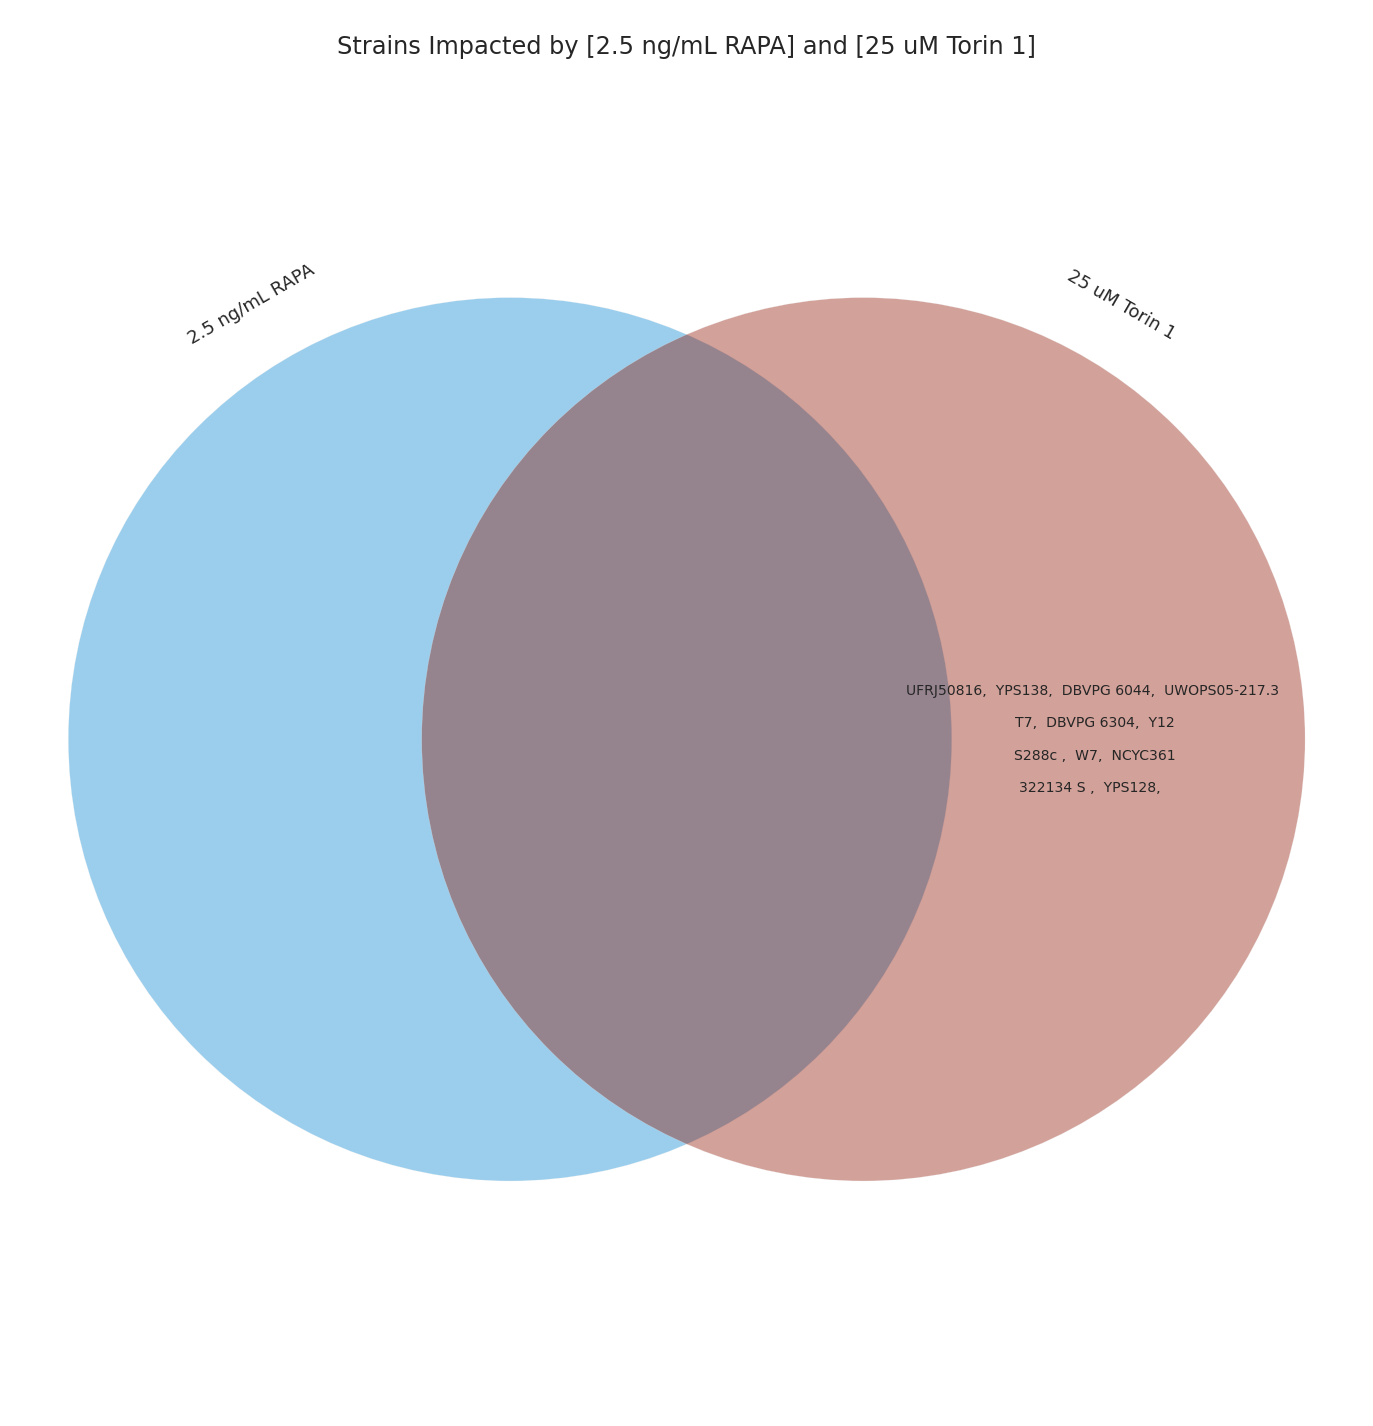

In [243]:
HL_VennDiagram(t1=treatments[4], t2=treatments[6], figsize=(25,25), threshold=significance_ratio)
plt.show()

#### Plotting for Change in Percentage of the Doubling Time `Inflection` and `Interval` Across Multiple Treatments and Strains

In [244]:
help(percentage)

Help on function percentage in module __main__:

percentage(index, strain='BY4743', dt_type='DT inflection')
    Input Parameters:
    > index = the row number for the treatment
    > strain = to which strain the average data is to be extracted for
    > dt_type = doubling time either for inflection or interval values
    
    Output Parameters:
    > The percentage increase of the doubling time inflection due to the treatment introduced.
    > A ratio of the doubling time inflection values for the treatment and control, indicating by how many times it increased.



In [245]:
def percentage_plot_perStrain(strain=strains[0], dt_type="DT inflection"):
        
    dict_treat_percent = dict()
    mul= list()
    for i in treatments:
        if i in t_treat:
            p, mul_d = percentage(dict_treat[i], strain=strain, dt_type=dt_type)
            dict_treat_percent[i] = p
            mul.append(mul_d)

    dict_treat_percent = dict(sorted(dict_treat_percent.items(), key=lambda item:item[1]))
    mul = sorted(mul)
    
    # dict_treat_percent = {i : str(dict_treat_percent[i])+" %" for i in list(dict_treat_percent.keys())}
    
    colors=list()
    
    for i in list(dict_treat_percent.keys()):

        dict_treat_percent.update({i : str(dict_treat_percent[i])+" %"})

        if i == '1 uM Torin 1' or i == '25 uM Torin 1':
            colors.append("#FFA500")
        elif i == '2.5 ng/mL RAPA' or i == '20 ng/mL RAPA':
            colors.append("#d35de3")
        else:
            colors.append("#6B6B6B")

    fig, ax = plt.subplots(figsize=(15,10))

    ax.barh(list(dict_treat_percent.keys()), list(dict_treat_percent.values()), color=colors)
    ax.set_xlabel(("\n" + dt_type + " Percentage Increase"), fontsize=15)
    ax.set_ylabel("Treatments", fontsize=15)
    ax.set_title(f'\n{dt_type} Percentage Increase and Ratio-Multiple of Treatments for {strain} strain.\n', loc ='left', fontsize=16)
   
    # Add annotation to bars
    for k, i in enumerate(ax.patches):
        plt.text(i.get_width()+0.1, i.get_y()+0.46,
                 ("-> [" + str(mul[k]) + " times increase in DT_inf]"),
                 fontsize = 12, fontweight ='bold',
                 color ='black')
    
    return ax

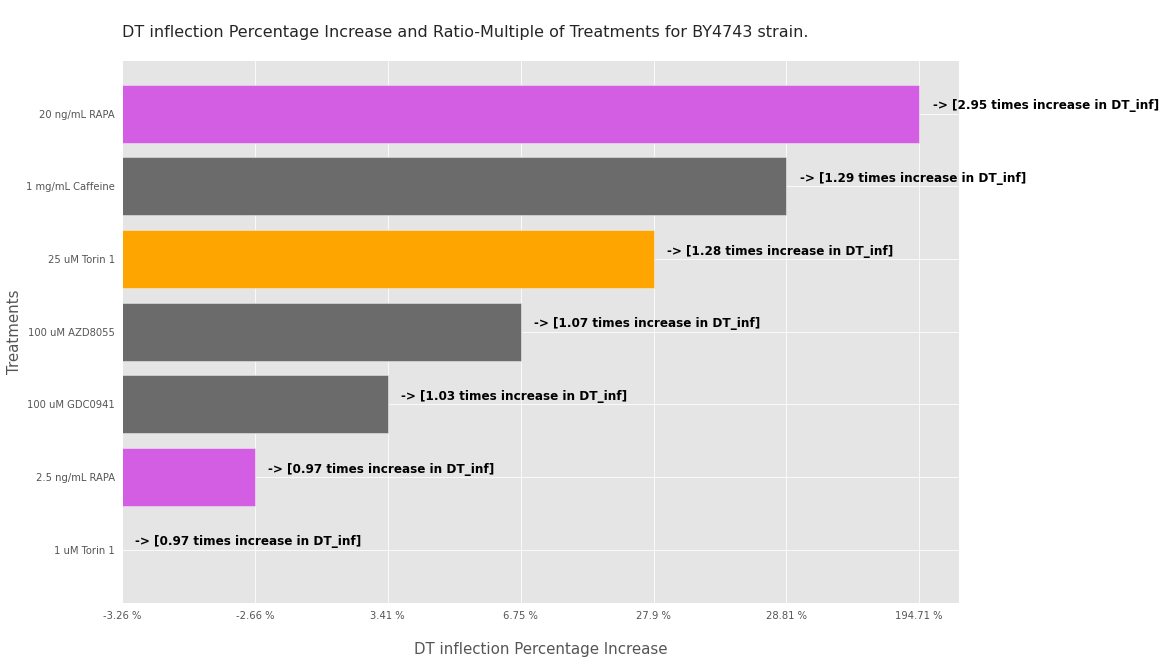

In [246]:
percentage_plot_perStrain(strains[0])
plt.show()

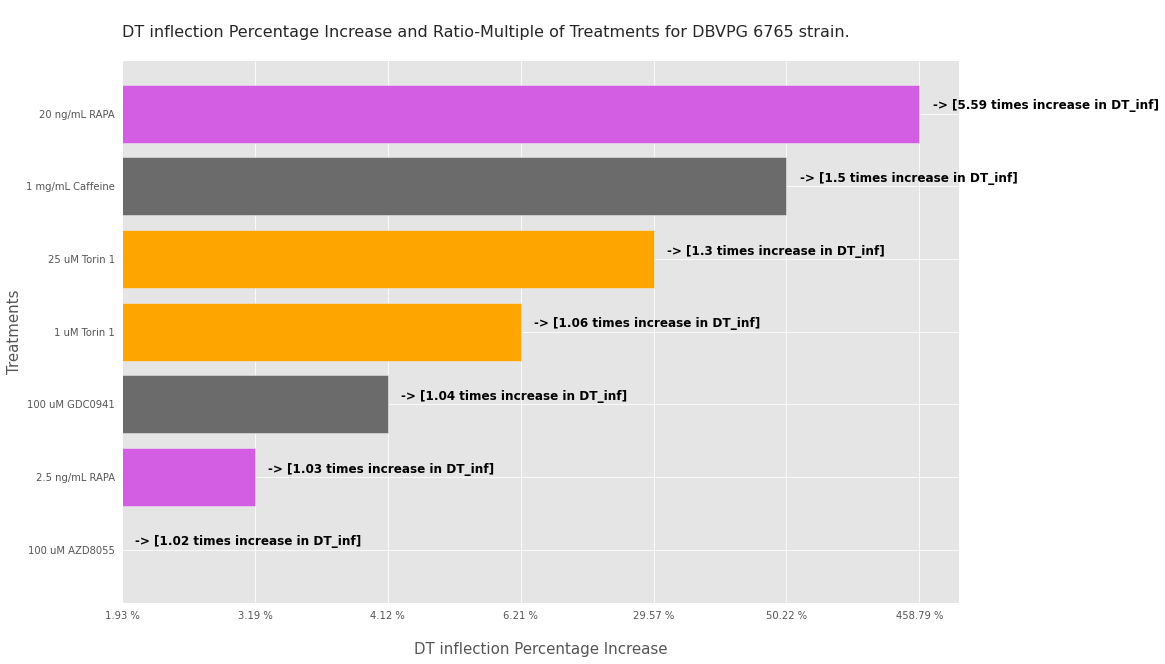

In [247]:
percentage_plot_perStrain(strains[1])
plt.show()

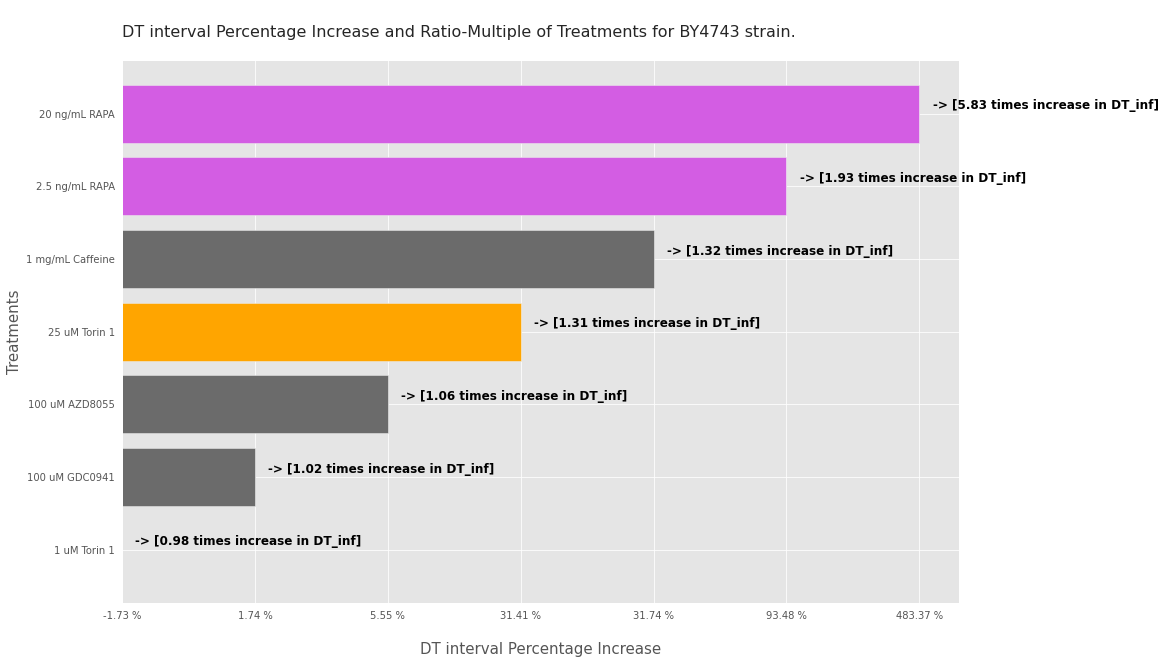

In [248]:
percentage_plot_perStrain(strains[0], dt_type='DT interval')
plt.show()

In [249]:
percentage_plot_perStrain(strains[1], dt_type='DT interval')
plt.show()

In [250]:
t_treat

['1 uM Torin 1',
 '20 ng/mL RAPA',
 '2.5 ng/mL RAPA',
 '25 uM Torin 1',
 '100 uM GDC0941',
 '1 mg/mL Caffeine',
 '100 uM AZD8055']

In [251]:
len(strains)

88

### Plotting The Percentage Increase In Doubling Time Infection And Interval Experienced By Strains As A Result Of The Desired Treatment 

In [252]:
def percentage_plot_perTreat(treat=t_treat[1], strain=strains, dt_type='DT inflection'):
        
    dict_strain_percent = dict()
    mul = list()
    s_not = list()
    for s in strains:
        p, mul_d = percentage(dict_treat[t_treat[0]], strain=s, dt_type=dt_type)
        if math.isnan(p):
            s_not.append(s)
        else:
            dict_strain_percent[s] = p
            mul.append(mul_d)

    dict_strain_percent = dict(sorted(dict_strain_percent.items(), key=lambda item:item[1]))
    mul = sorted(mul)
        
    names= list(dict_strain_percent.keys())
    values = list(dict_strain_percent.values())
    
    cmap = plt.cm.Accent_r  #gist_heat_r
    norm = colors.Normalize(vmin=min(values), vmax=max(values))
    
    fig,ax = plt.subplots(figsize=(35,40))
    
    plt.bar(names, values, color=cmap(norm(values)), width=0.9, align='center')
    plt.yticks(np.arange(min(values), max(values)))
    plt.xticks(rotation=75, fontsize=14)
    
    ax.set_title((dt_type + " Percentage Increase Due To The Application of " + treat + " Across Multiple Strains\n\n"), fontsize=22, fontweight='bold')
    ax.set_xlabel("\n\nStrains", fontsize=18, fontweight='bold')
    ax.set_ylabel("Percentage Increase", fontsize=18, fontweight='bold')
    
    # Listing strains that are missing percentage increase values for this particular treatment
    x_pos = len(names)/2 + len(names)/4
    y_pos = np.median(values)-((max(values)+min(values))/np.mean(values))
    plt.text(x_pos, y_pos, "Strains with NAN value\n", fontsize=20, fontweight='bold', color='#372d68')
    for ks, sn in enumerate(s_not):
        plt.text(x_pos, y_pos-1-ks, ("   -> "+ str(sn)+"\n"), fontsize=16, fontweight='bold', color='#5748a6')
    
    # Add annotation to bars    
    for k, i in enumerate(ax.patches):
        val = str(values[k]) + " %"
        name = "[" + str(names[k]) + "]"
        
        plt.text((i.get_xy()[0] + .28), (values[k]/2),
        val, fontsize=12, fontweight='bold',
        color ='black', rotation=90)

        if values[k] < 0:
            y = values[k] - len(name)/2 #4.0
        else:
            y = values[k] + np.sqrt(len(val)) #2.5

        plt.text((i.get_xy()[0] + .28), y,
        name, fontsize=12, fontweight='bold',
        color='black', rotation=90)

    return ax

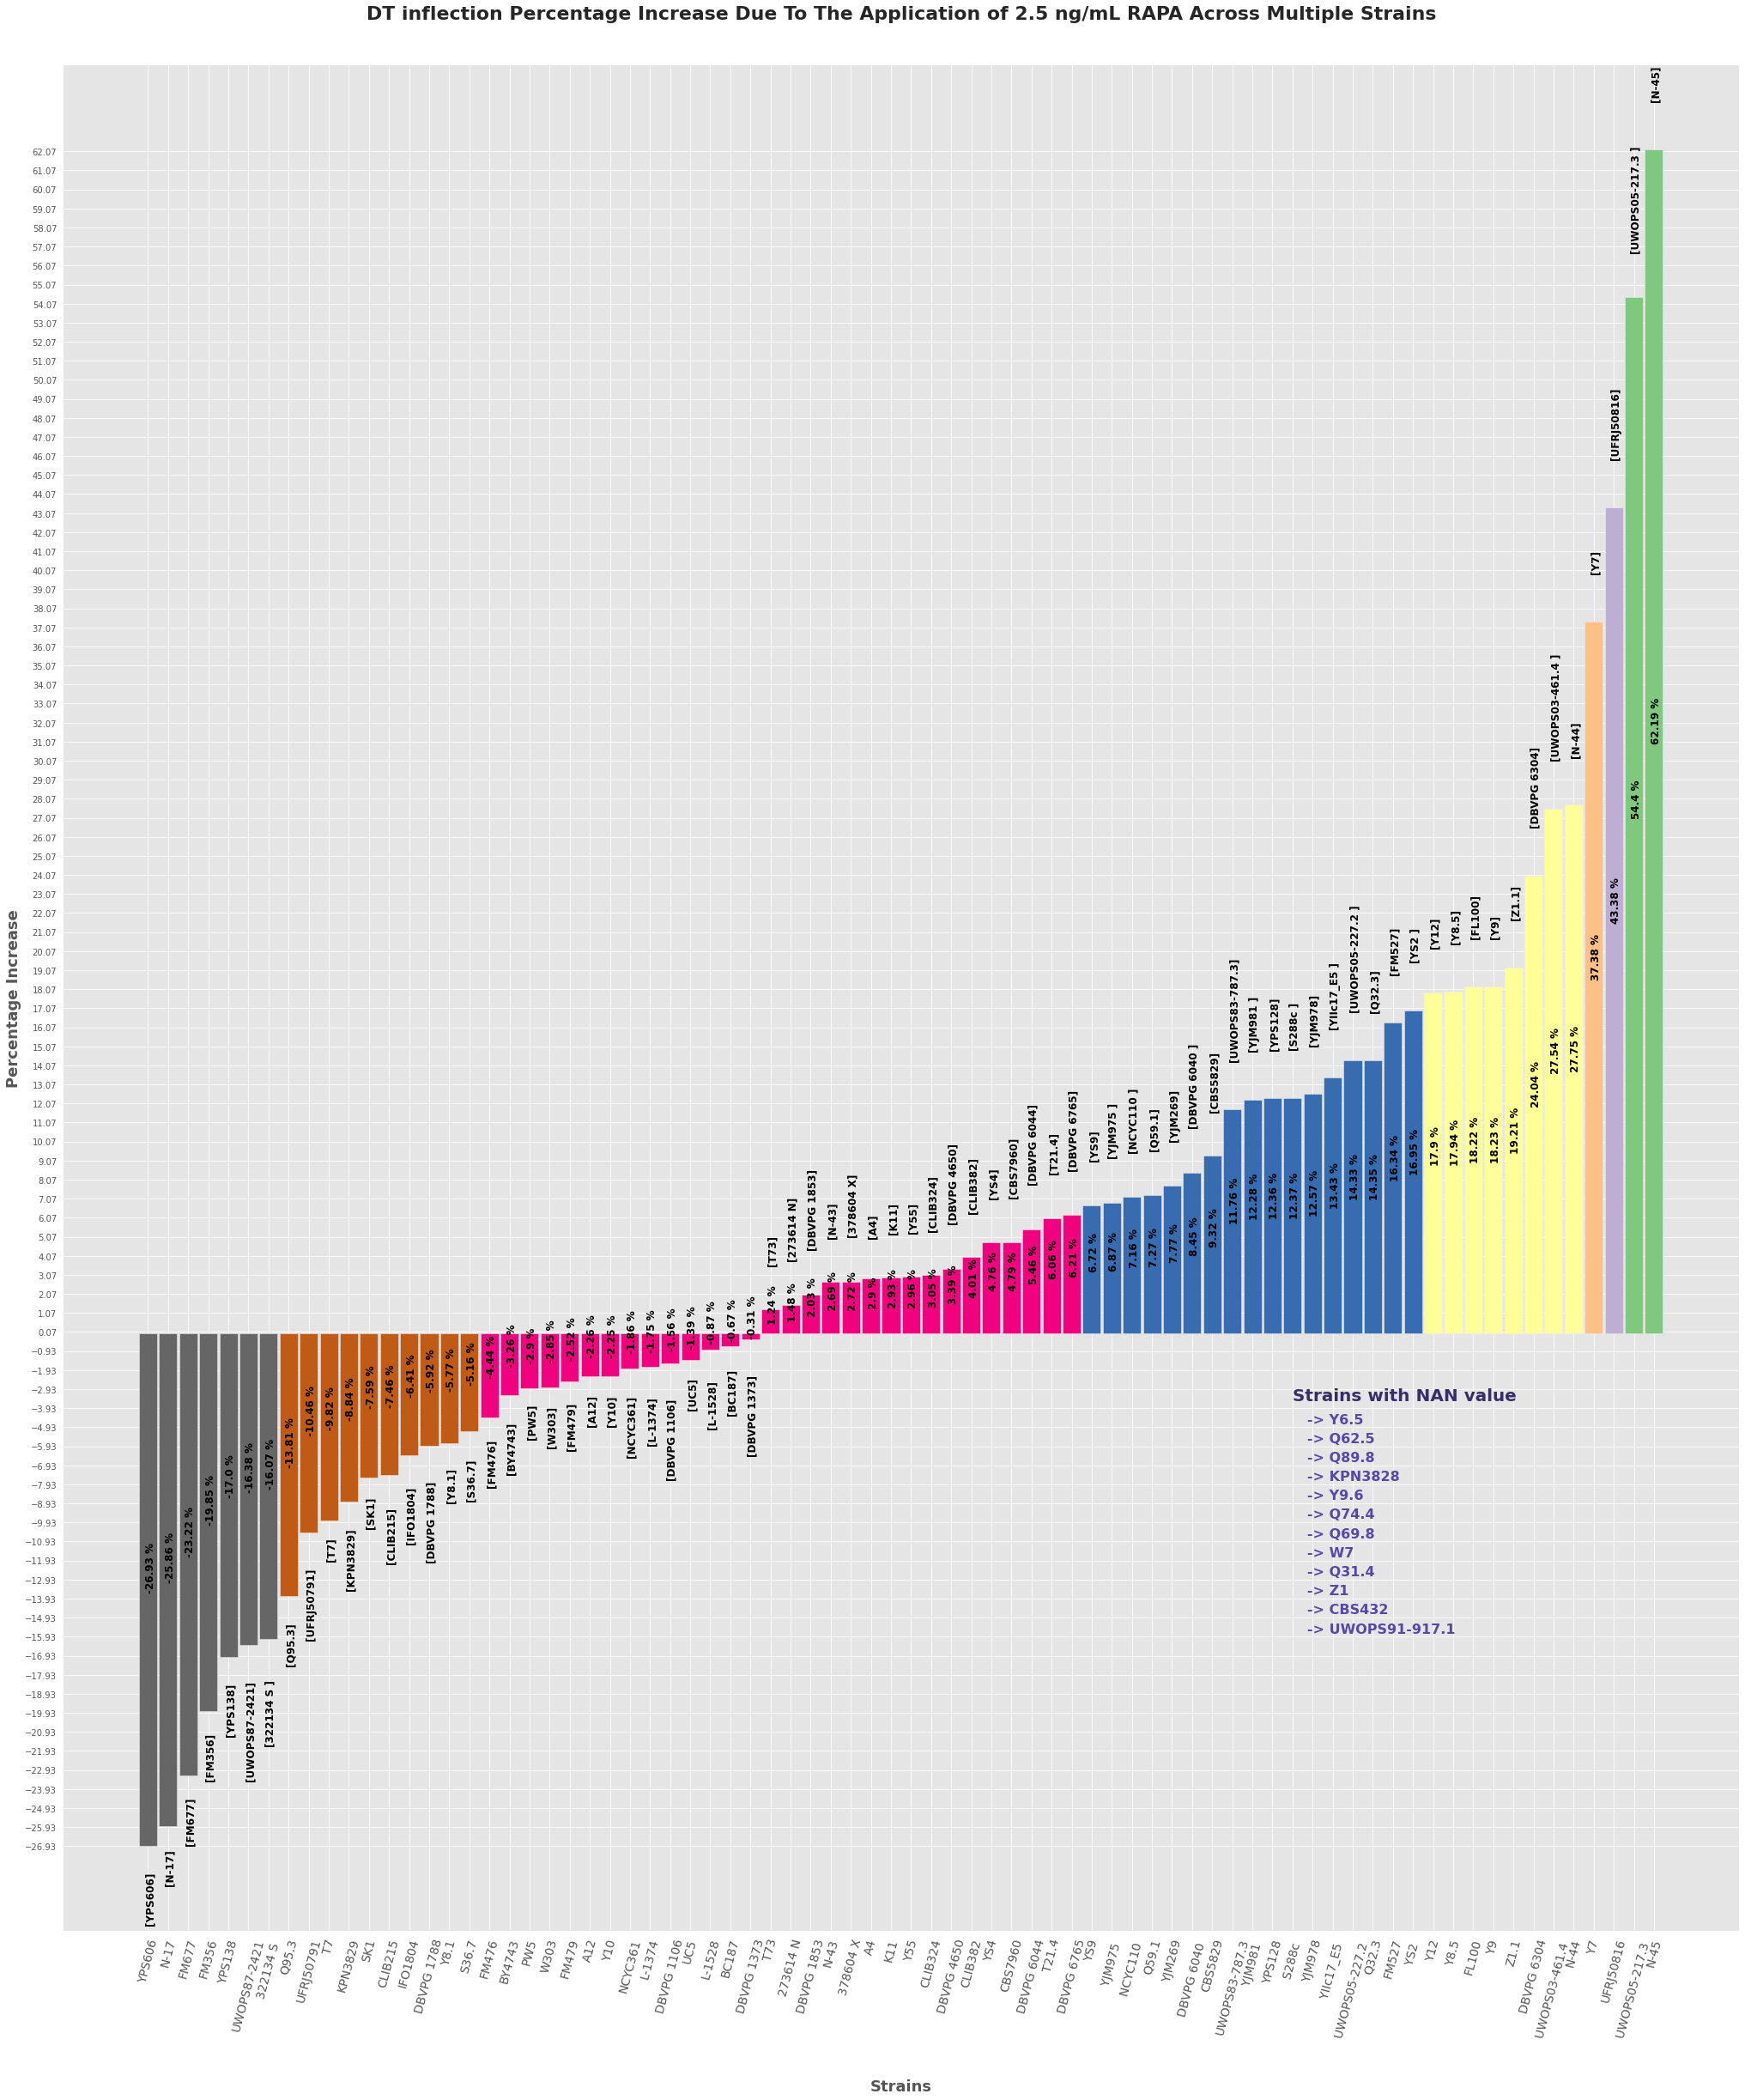

In [253]:
percentage_plot_perTreat(t_treat[2])
plt.show()

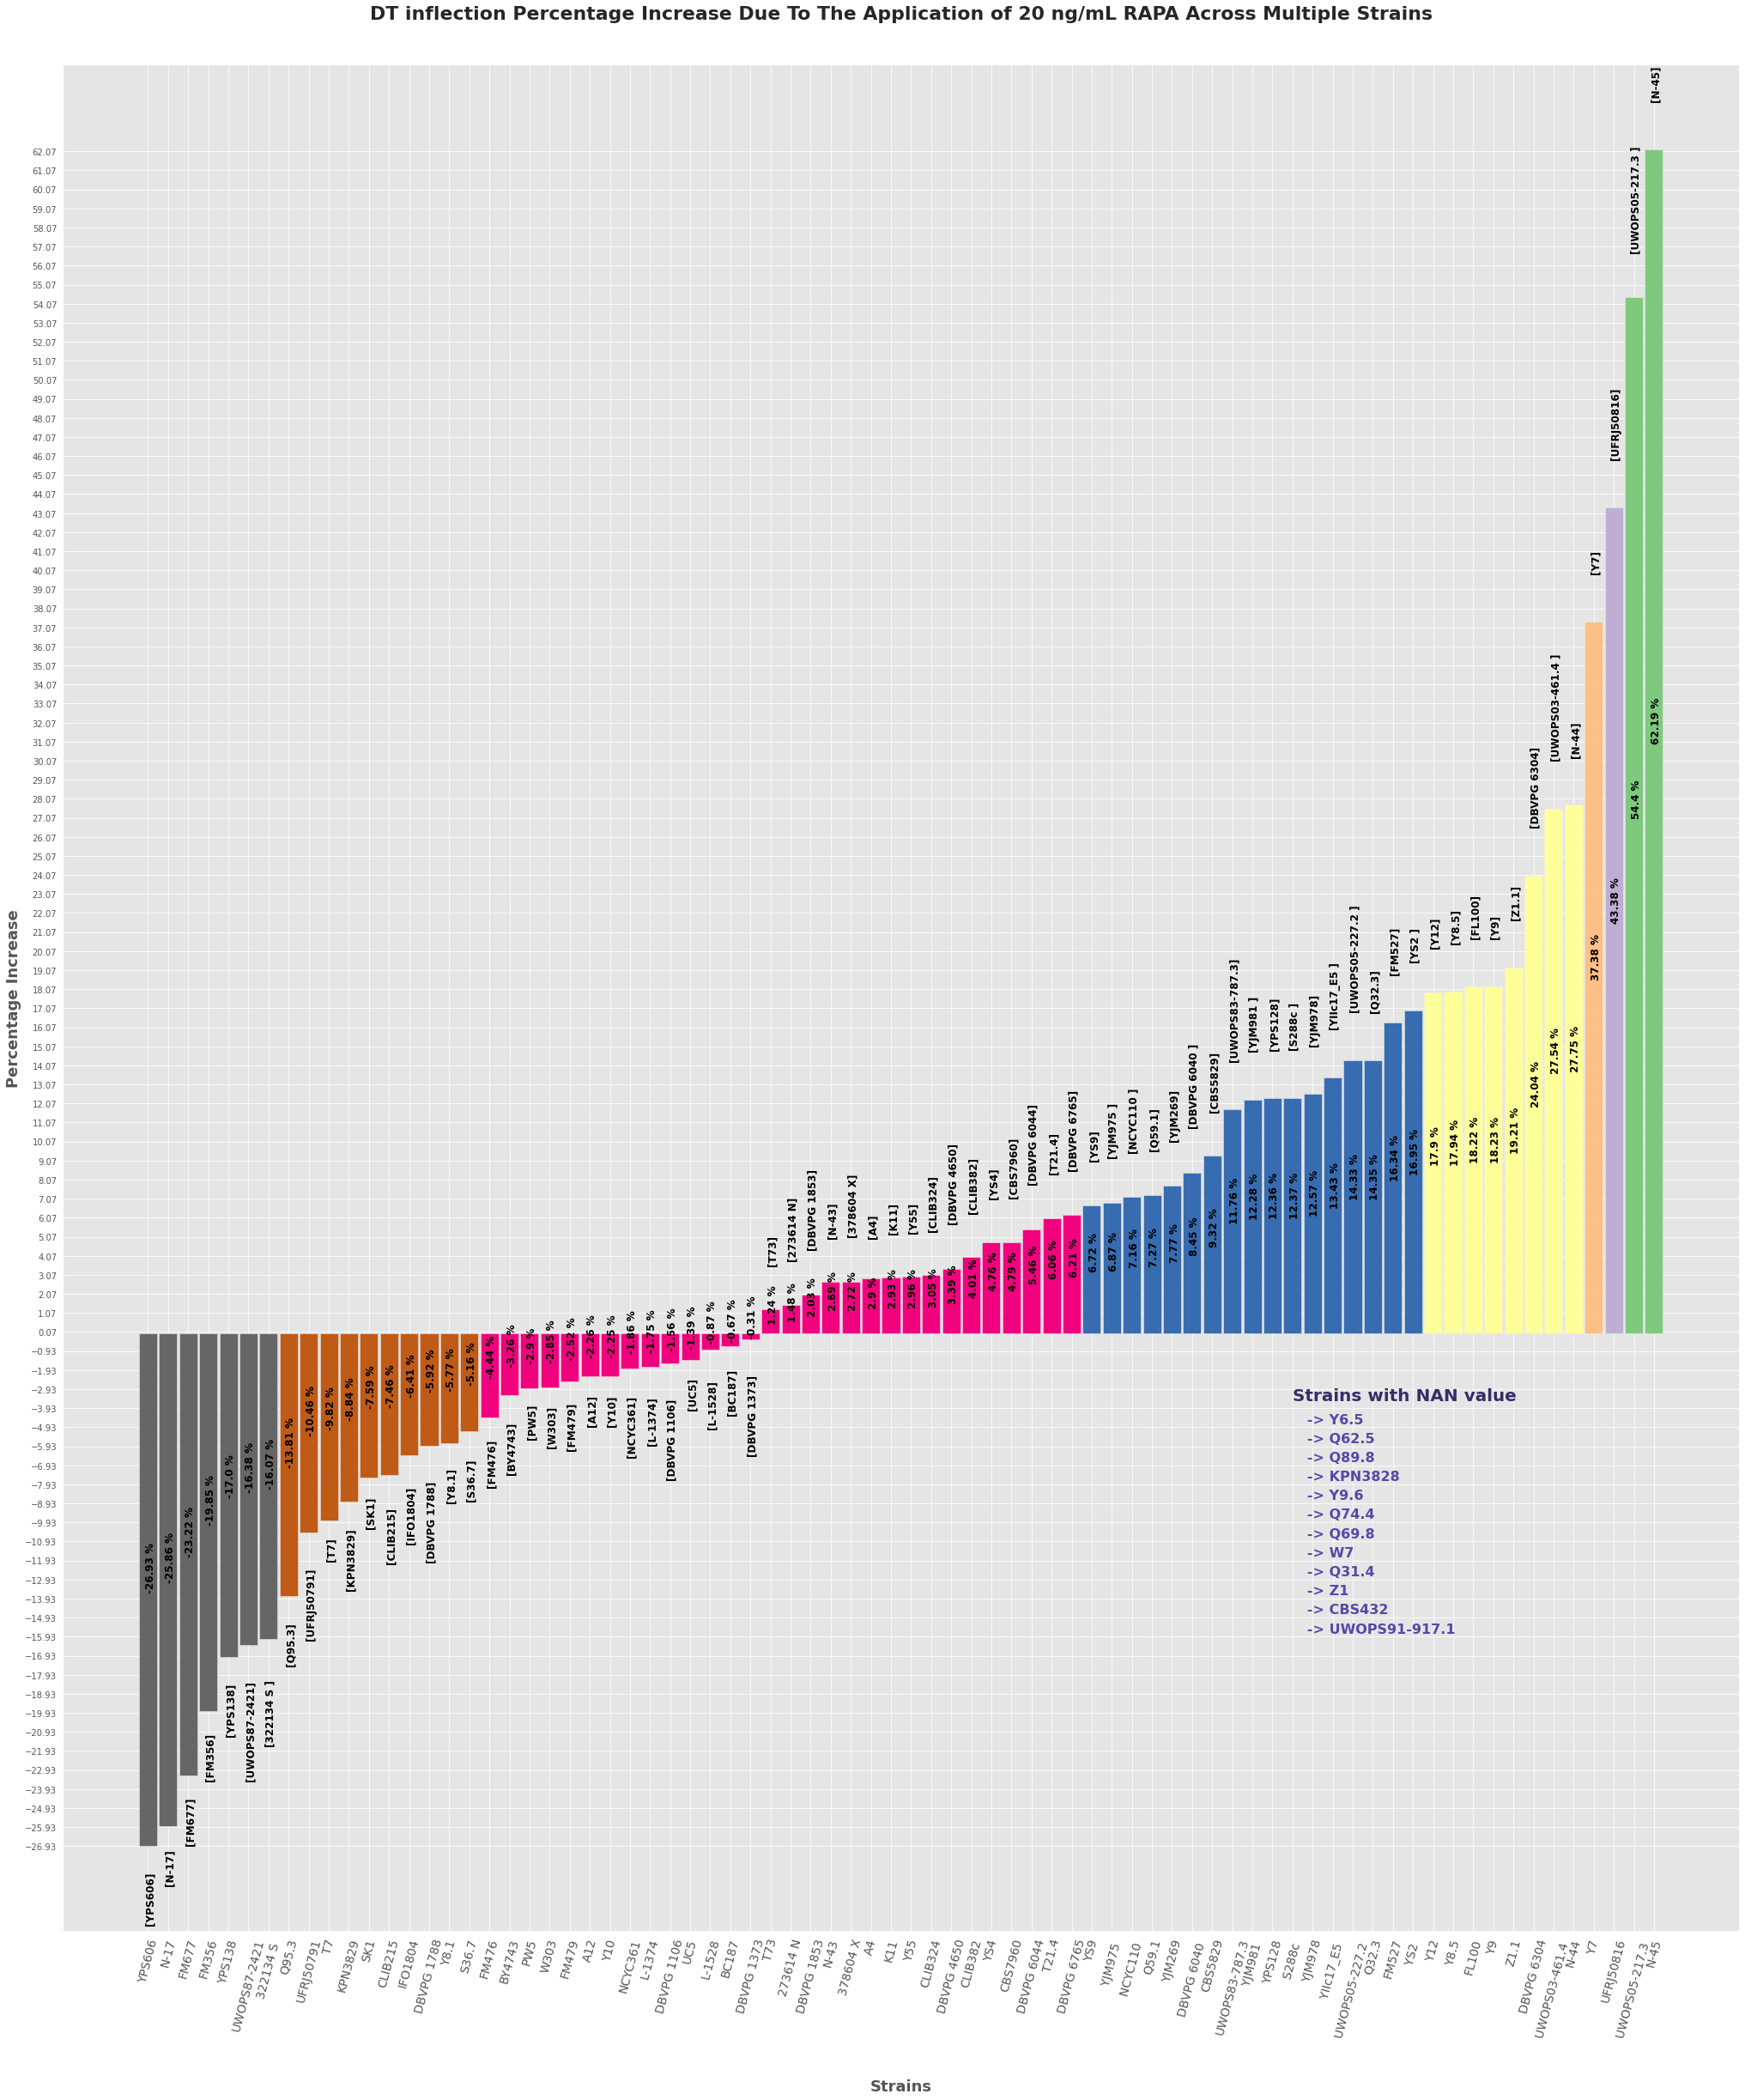

In [254]:
percentage_plot_perTreat(treat=t_treat[1])
plt.show()

In [255]:
percentage_plot_perTreat(treat=t_treat[0])
plt.show()

In [256]:
percentage_plot_perTreat(treat=t_treat[3])
plt.show()

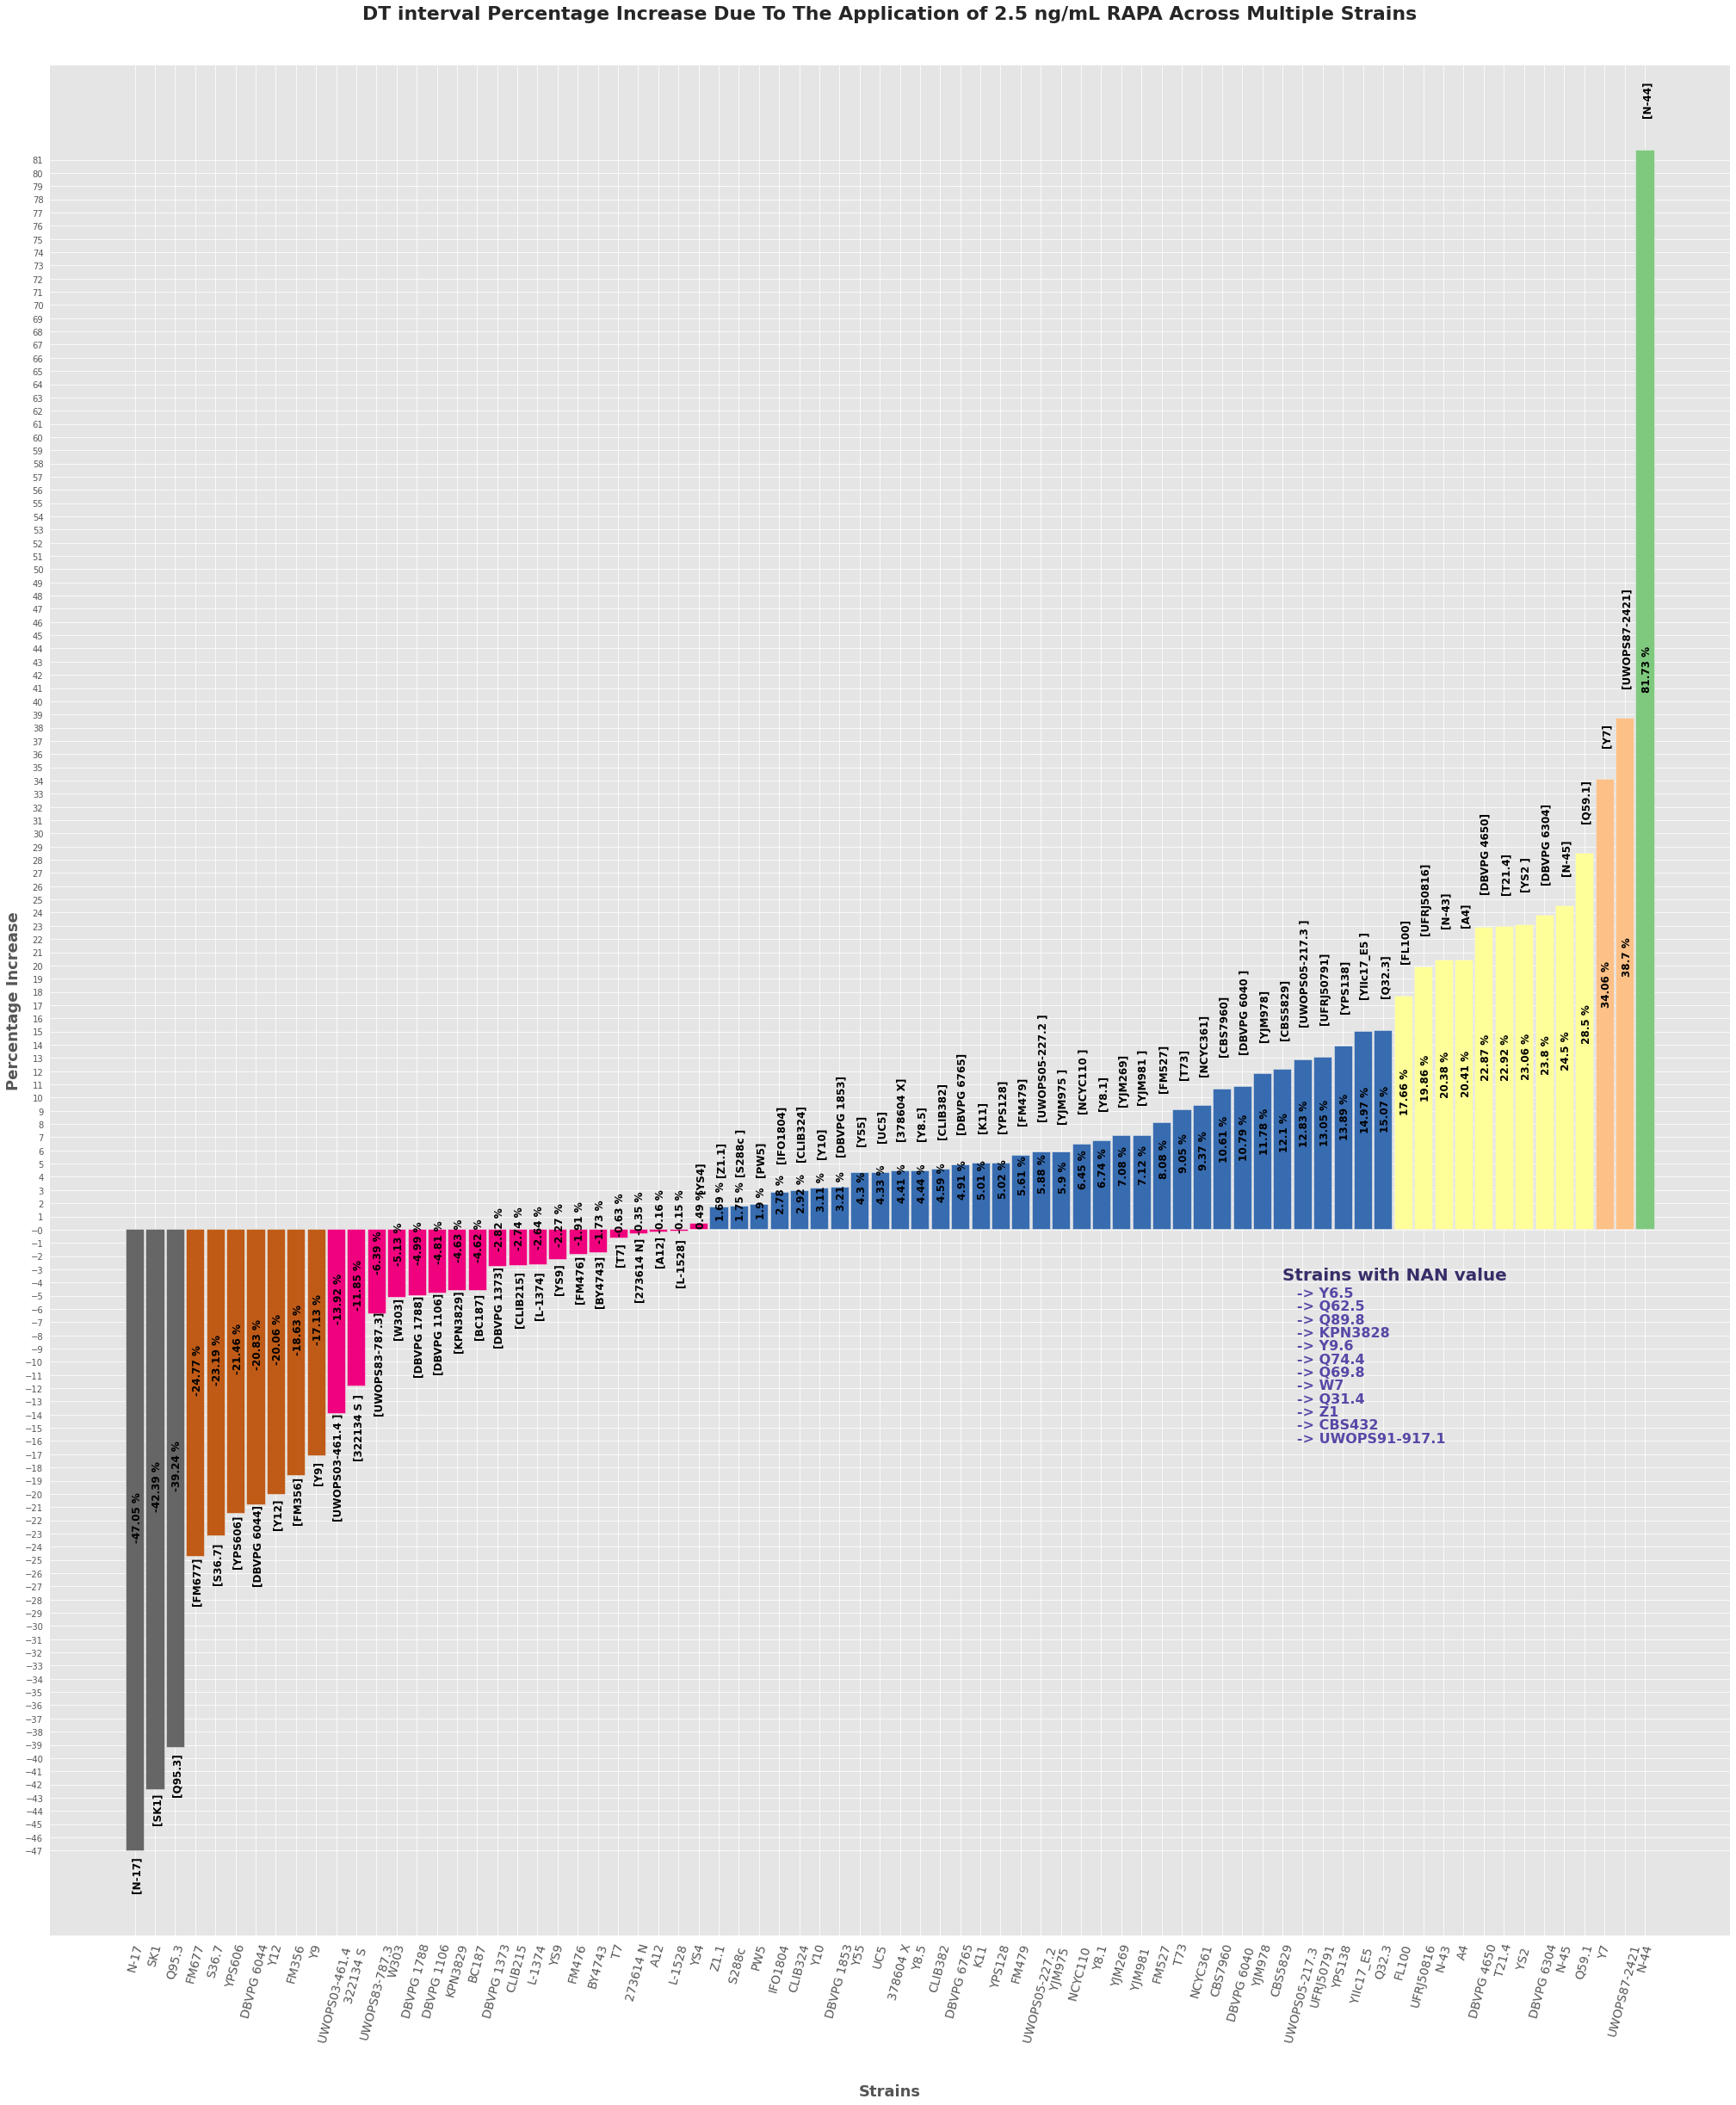

In [257]:
percentage_plot_perTreat(treat=t_treat[2],dt_type='DT interval')
plt.show()

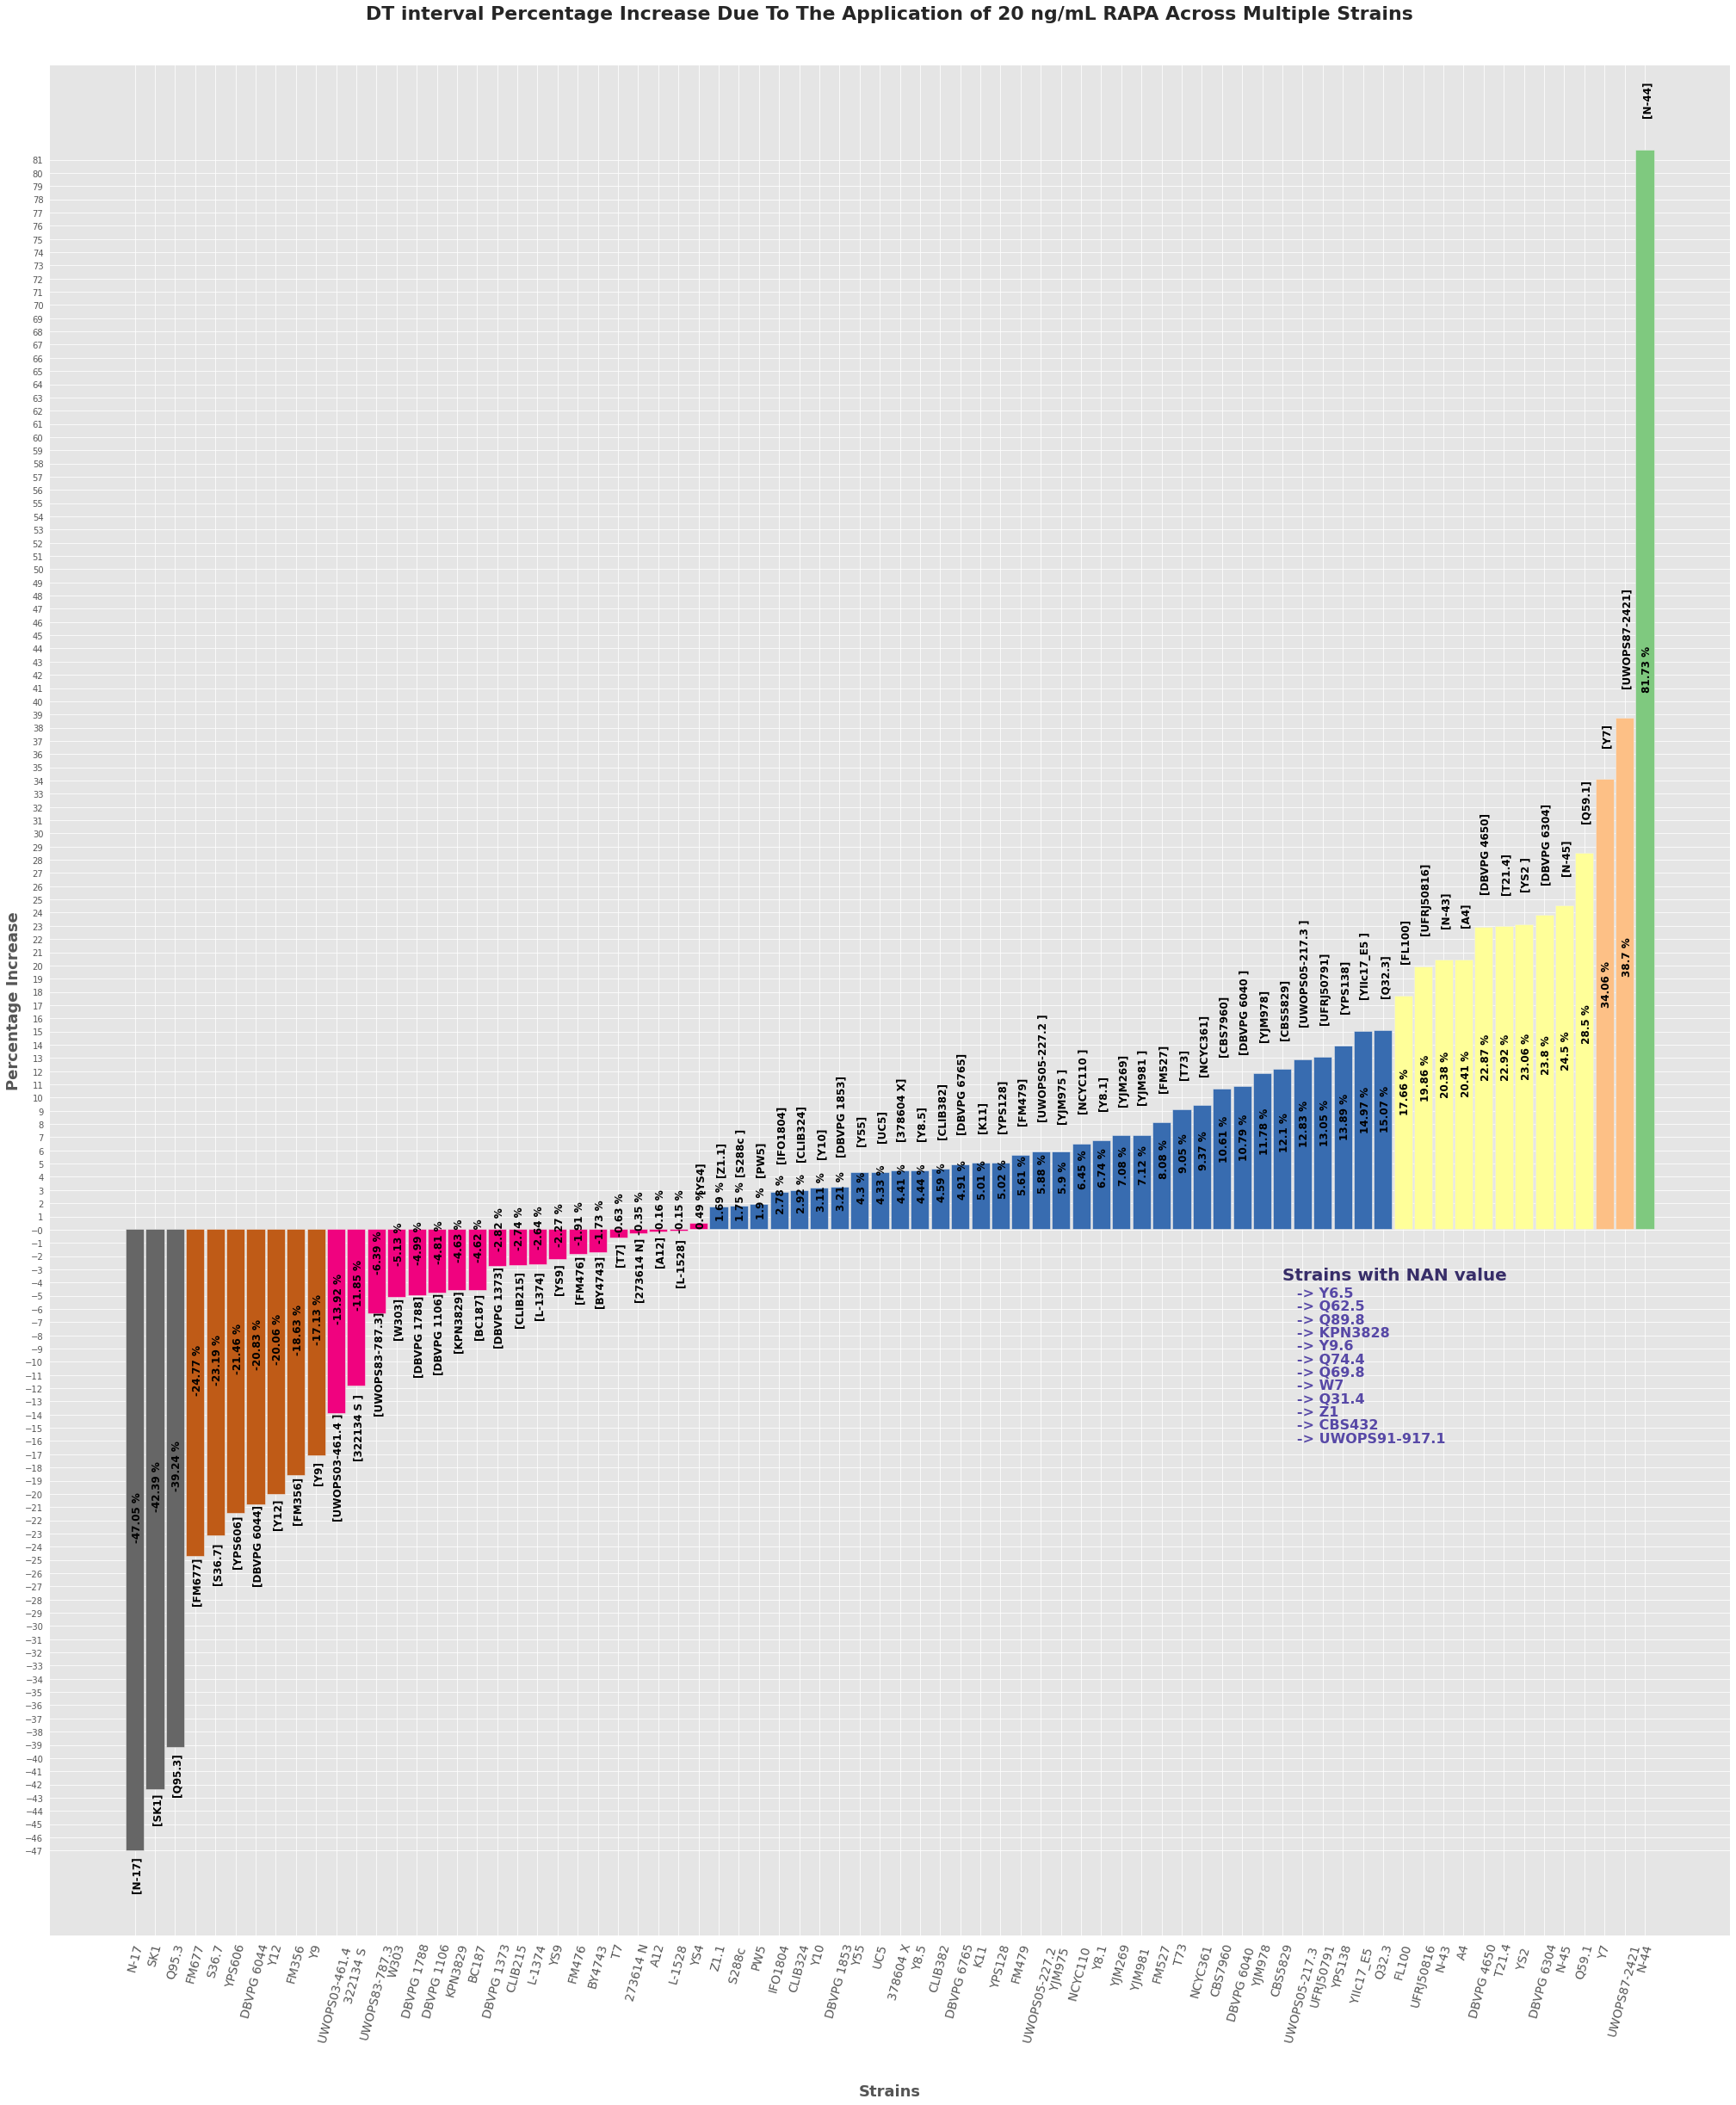

In [258]:
percentage_plot_perTreat(treat=t_treat[1],dt_type='DT interval')
plt.show()

In [259]:
percentage_plot_perTreat(treat=t_treat[0],dt_type='DT interval')
plt.show()

In [260]:
percentage_plot_perTreat(treat=t_treat[3],dt_type='DT interval')
plt.show()